#Existe um modelo apropriado de recursos humanos e de estabelecimentos de sáude para obter um resultado de excelência de cobertura vacinal? 



Apesar de acreditar que o resultado de um cobertura de vacinação depende de diversos fatores, como informação, desinformação, campanhas publicitárias, escolaridade e ainda outros mais. Ter profissionais e estabelecimentos que realizam a vacinação deveria ser a base e o obrigatório para todos os municipios do país, porém sabemos que a desigualdade no Brasil chega a níveis assustadores, então a proposta do estudo é compreender se há uma correlação entre essa base estrutural e o quanto ela se relaciona com os resultados de cobertura vacinal através dos anos. Uma vez que for concluído uma correlação entre os dados, a propósta é criar um modelo de regressão para estudar os dados dos municipios e propor melhorias estruturais para assim obter atingir resultados de cobertura vacinal apropriados.

## Resumo

A pergunta de pesquisa desse projeto teve uma resposta clara: **Não**. 

Nesse estudo, levantei as bases de dados do SUS de cobertura vacinal, de recursos humanos e tipos de estabelecimentos por municipio, foram selecionados os dados daqueles que tem atuação nas campanhas de vacinação ou no contexto de imunização e prevenção de doenças da população, depois disso os dados foram relativizados para que os dados fossem analisados não em números absolutos mas no quanto cada recurso o municipio tinha a cada 1000 habitantes, assim medindo todos os municipios com a mesma régua. 

O teste da hipótese em si comprovou que os recursos de cada municipio não influênciam a cobertura vacinal diretamente. Não é possível dizer que existe um modelo ideal de quantidade de Unidades Básicas de Saúde, Agentes comunitários, ou Assistentes sociais que devem existir no municipio para que a cobertura vacinal seja alcançada.

A não comprovação da hipótese não torna menos valioso o trabalho, com ele foi possível verificar que o aparelhamento do SUS da forma que está não tem correlação com a cobertura vacinal dos municipios. Porém não retira o fato de que hoje não influência, justamente porque o Sistema Único de Saúde possibilita o acesso à todos. Em um outro contexto, talvez o resultado não fosse o mesmo.

##Objetivo

Com esse trabalho, meu objetivo é testar se existe um modelo de estrutura e de recursos humanos para a excêlencia na obtenção de uma cobertura apropriada de imunização. Caso comprovada essa relação entre a estrutura e as metas vacinais, a proposta é criar um modelo de Machine Learning para avaliar o que faltaria para cada municipio contratar ou construir para obter o resultado vacinal ideal.

##Metodologia

Os dados que serão utilizados estão em datasets diferentes, o estudo se baseará inicialmente na junção de todos os dados em um único dataframe em que os municipios são o index e o código do municipio é o ponto de junção dos dados.

Os dados usados serão principalmente as coberturas vacinais entre 2010 e 2019. Para os dados de estrutura física, serão usados os dados do Datasus que contabilizam os tipos de estabelecimentos que proporcionam serviços de saúde nos municipios. Para o estudo dos recursos humanos, serão contabilizados médicos, agentes comunitários de saúde, assistentes sociais e outros, que também estão dispostos no datasus.

Existem valores nesses dados que serão descartados, pois a existência deles certamente não afetam a vacinação, como por exemplo falando dos recursos humanos, dados sobre fonoaudiólogos, gesseiros e radiologistas. Assim como também nos estabelecimentos, como por exemplo, academias de saúde, clinicas de atendimento dental e outros. Boa parte do estudo será a limpeza dos dados.

Os dados estão em valores absolutos de acordo com a quantidade desses dados nos municipios, para o estudo será feito uma relativização, a analise será ao invés da quantidade total de Agentes Comunitários, a quantidade de Agentes Comunitários por 1000 habitantes.

Após isso a proposta é avaliar o quanto há de correlação entre os dados e a cobertura vacinal daquele ano.

## Manipulação dos dados:

In [1]:
# Para facilitar a organização dos dados, coloquei todos em pastas do meu drive

from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.activity.readonly&response_type=code

Enter your authorization code:
4/1AY0e-g7zeqgMROsJOEVjQ3gwMbcU8oDUYQ7rX2mKy6xU2j3USuDECN3M6lk


Mounted at /content/drive


In [2]:
# Importação das bibliotecas para manipulação de dados
#e também matplotlib para eventuais plotagens de gráficos para visualizações

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime
import seaborn as sns
import matplotlib.ticker as ticker

### Importação dos datasets e limpeza dos dados

#### Cobertura Vacinal

Aqui farei a estruturação base dos dados que serão chave para o estudo, os dados de cobetura vacinal. Além disso será feita a limpeza inicial para que os dados sejam trabalhos futuramente.

In [3]:
vacinacao = '/content/drive/MyDrive/Colab_Notebooks/BootcampDataScience/modulo_02/cobertura_vacinacao_municipios20102019.csv'

In [4]:
dados_vacinacao = pd.read_csv(vacinacao, encoding="ISO 8859-1", sep = ';', decimal=",",na_values="-")

In [5]:
dados_vacinacao.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5571 entries, 0 to 5570
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Município  5571 non-null   object 
 1   2010       5571 non-null   float64
 2   2011       5571 non-null   float64
 3   2012       5571 non-null   float64
 4   2013       5571 non-null   float64
 5   2014       5571 non-null   float64
 6   2015       5571 non-null   float64
 7   2016       5571 non-null   float64
 8   2017       5571 non-null   float64
 9   2018       5571 non-null   float64
 10  2019       5571 non-null   float64
 11   Total     5571 non-null   float64
dtypes: float64(11), object(1)
memory usage: 522.4+ KB


In [6]:
dados_vacinacao.describe()

,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,Total
count,5571.000000,5571.000000,5571.000000,5571.000000,5571.000000,5571.000000,5571.000000,5571.000000,5571.000000,5571.000000,5571.000000
mean,79.035091,89.794310,79.450219,79.835950,94.809948,101.498081,59.829018,79.691368,84.114798,82.114602,80.852605
std,10.984945,21.574225,20.863878,21.268673,29.406196,28.920460,19.849033,23.949151,20.037087,20.957047,11.028586
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.200000,5.900000,5.100000,37.810000
25%,72.310000,78.175000,68.545000,67.965000,79.925000,86.170000,47.960000,66.750000,72.600000,70.175000,73.795000
50%,77.930000,87.180000,77.620000,76.490000,91.880000,99.810000,59.120000,78.140000,83.510000,80.880000,80.540000
75%,84.470000,98.040000,87.180000,87.725000,105.800000,114.160000,70.955000,90.430000,94.380000,92.260000,87.370000
max,182.370000,529.010000,668.170000,393.120000,937.800000,637.880000,155.300000,589.810000,248.810000,287.900000,178.770000


In [7]:
# Primeira visualiação dos dados:

dados_vacinacao.head()

,Município,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,Total
0,110001 ALTA FLORESTA D\'OESTE,83.80,95.73,78.47,76.76,91.29,104.22,55.83,81.66,92.55,103.24,84.46
1,110002 ARIQUEMES,75.51,89.00,84.99,84.01,109.89,111.53,66.03,83.06,87.10,88.36,86.20
2,110003 CABIXI,83.33,78.18,66.89,56.62,105.06,130.49,48.96,63.21,140.63,146.78,86.86
3,110004 CACOAL,78.52,85.21,75.49,71.73,91.60,122.14,55.02,94.08,90.01,83.05,82.58
4,110005 CEREJEIRAS,88.86,111.32,104.73,88.59,110.43,114.76,65.51,96.38,98.30,111.24,96.72


Meu primeiro passo é separar os números do código do ibge das cidades

In [8]:
# Aqui eu dei aos valores do código ibge os 6 primeiros valores da coluna município
# Para evitar que exista algum valor com espaço na esquerda, fiz o .strip já no valor do municipio

dados_vacinacao['Município'] = dados_vacinacao['Município'].apply(lambda x: x.strip())
dados_vacinacao["codigo_ibge"] = dados_vacinacao['Município'].map(lambda x: x[:6])

In [9]:
dados_vacinacao

,Município,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,Total,codigo_ibge
0,110001 ALTA FLORESTA D\'OESTE,83.80,95.73,78.47,76.76,91.29,104.22,55.83,81.66,92.55,103.24,84.46,110001
1,110002 ARIQUEMES,75.51,89.00,84.99,84.01,109.89,111.53,66.03,83.06,87.10,88.36,86.20,110002
2,110003 CABIXI,83.33,78.18,66.89,56.62,105.06,130.49,48.96,63.21,140.63,146.78,86.86,110003
3,110004 CACOAL,78.52,85.21,75.49,71.73,91.60,122.14,55.02,94.08,90.01,83.05,82.58,110004
4,110005 CEREJEIRAS,88.86,111.32,104.73,88.59,110.43,114.76,65.51,96.38,98.30,111.24,96.72,110005
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5566,522205 VICENTINOPOLIS,74.01,93.69,79.75,74.58,120.22,106.96,72.25,60.54,83.20,72.80,82.61,522205
5567,522220 VILA BOA,86.83,93.62,79.44,120.47,117.04,102.30,64.62,65.75,62.23,61.49,85.64,522220
5568,522230 VILA PROPICIO,98.90,138.31,117.21,57.78,54.28,52.75,45.64,91.33,90.09,71.75,76.94,522230
5569,530010 BRASILIA,110.68,67.70,64.84,85.83,89.33,71.55,75.28,74.89,82.22,79.12,79.79,530010


Agora vou tirar os números dos códigos do nome do municipio

In [10]:
dados_vacinacao['Município'] = dados_vacinacao['Município'].map(lambda x: x[7:])

In [11]:
dados_vacinacao.head()

,Município,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,Total,codigo_ibge
0,ALTA FLORESTA D\'OESTE,83.80,95.73,78.47,76.76,91.29,104.22,55.83,81.66,92.55,103.24,84.46,110001
1,ARIQUEMES,75.51,89.00,84.99,84.01,109.89,111.53,66.03,83.06,87.10,88.36,86.20,110002
2,CABIXI,83.33,78.18,66.89,56.62,105.06,130.49,48.96,63.21,140.63,146.78,86.86,110003
3,CACOAL,78.52,85.21,75.49,71.73,91.60,122.14,55.02,94.08,90.01,83.05,82.58,110004
4,CEREJEIRAS,88.86,111.32,104.73,88.59,110.43,114.76,65.51,96.38,98.30,111.24,96.72,110005


In [12]:
# Mais uma vez farei o strip para previnir ter ficado algum espaço à esquerda

dados_vacinacao['Município'] = dados_vacinacao['Município'].apply(lambda x: x.lstrip())

In [13]:
dados_vacinacao.head()

,Município,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,Total,codigo_ibge
0,ALTA FLORESTA D\'OESTE,83.80,95.73,78.47,76.76,91.29,104.22,55.83,81.66,92.55,103.24,84.46,110001
1,ARIQUEMES,75.51,89.00,84.99,84.01,109.89,111.53,66.03,83.06,87.10,88.36,86.20,110002
2,CABIXI,83.33,78.18,66.89,56.62,105.06,130.49,48.96,63.21,140.63,146.78,86.86,110003
3,CACOAL,78.52,85.21,75.49,71.73,91.60,122.14,55.02,94.08,90.01,83.05,82.58,110004
4,CEREJEIRAS,88.86,111.32,104.73,88.59,110.43,114.76,65.51,96.38,98.30,111.24,96.72,110005


Nessa primeira visualização dos dados já vi que tem uma barra ali que não deveria existir, vou usar um replace para trocá-la por um vazio, assim apagando-a, e se tiverem outras, elas também serão apagadas.

In [14]:
# A backslash indica sempre que vem um caractér especial na sequencia, para trocar o valor \ da palavra, 
#precisei colocar duas vezes na string para ela entender o que eu queria fazer

dados_vacinacao.Município = dados_vacinacao.Município.str.replace('\\','')

In [15]:
dados_vacinacao.head()

,Município,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,Total,codigo_ibge
0,ALTA FLORESTA D'OESTE,83.80,95.73,78.47,76.76,91.29,104.22,55.83,81.66,92.55,103.24,84.46,110001
1,ARIQUEMES,75.51,89.00,84.99,84.01,109.89,111.53,66.03,83.06,87.10,88.36,86.20,110002
2,CABIXI,83.33,78.18,66.89,56.62,105.06,130.49,48.96,63.21,140.63,146.78,86.86,110003
3,CACOAL,78.52,85.21,75.49,71.73,91.60,122.14,55.02,94.08,90.01,83.05,82.58,110004
4,CEREJEIRAS,88.86,111.32,104.73,88.59,110.43,114.76,65.51,96.38,98.30,111.24,96.72,110005


In [16]:
dados_vacinacao.tail()

,Município,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,Total,codigo_ibge
5566,VICENTINOPOLIS,74.01,93.69,79.75,74.58,120.22,106.96,72.25,60.54,83.20,72.80,82.61,522205
5567,VILA BOA,86.83,93.62,79.44,120.47,117.04,102.30,64.62,65.75,62.23,61.49,85.64,522220
5568,VILA PROPICIO,98.90,138.31,117.21,57.78,54.28,52.75,45.64,91.33,90.09,71.75,76.94,522230
5569,BRASILIA,110.68,67.70,64.84,85.83,89.33,71.55,75.28,74.89,82.22,79.12,79.79,530010
5570,,74.66,85.31,77.32,73.29,86.31,95.07,50.44,72.93,77.13,73.44,75.00,Total


Quero trocar esse "Município" com acento e letra maiuscula das colunas

In [17]:
# para pegar o nome de todos os números que não pretendo mudar em nada

dados_vacinacao.columns

Index(['Município', '2010', '2011', '2012', '2013', '2014', '2015', '2016',
       '2017', '2018', '2019', ' Total', 'codigo_ibge'],
      dtype='object')

In [18]:
colunas = ['cidade', 'vacina_2010', 'vacina_2011', 'vacina_2012', 'vacina_2013',
           'vacina_2014', 'vacina_2015', 'vacina_2016','vacina_2017', 
           'vacina_2018', 'vacina_2019', 'Total', 'codigo_ibge']

In [19]:
dados_vacinacao.columns = colunas

In [20]:
dados_vacinacao.sample(3)

,cidade,vacina_2010,vacina_2011,vacina_2012,vacina_2013,vacina_2014,vacina_2015,vacina_2016,vacina_2017,vacina_2018,vacina_2019,Total,codigo_ibge
1751,VICOSA,88.46,123.53,64.90,56.56,92.33,92.37,65.86,96.10,74.71,74.20,82.09,270940
1117,FLORANIA,64.42,62.33,56.09,72.07,89.60,78.72,50.62,41.01,73.36,69.60,65.67,240380
3550,JANDIRA,67.44,77.15,67.04,65.74,78.34,90.64,43.35,61.83,34.80,44.21,61.83,352500


Não quero usar essa coluna de total à direita, nem a que está no final do DataFrame

In [21]:
dados_vacinacao = dados_vacinacao.drop("Total", axis = 1)

In [22]:
dados_vacinacao.drop(5570,axis = 0, inplace= True)

In [23]:
dados_vacinacao.sample(5)

,cidade,vacina_2010,vacina_2011,vacina_2012,vacina_2013,vacina_2014,vacina_2015,vacina_2016,vacina_2017,vacina_2018,vacina_2019,codigo_ibge
465,ARAIOSES,96.67,93.49,61.63,75.64,87.15,85.96,32.01,44.21,53.93,55.73,210090
5061,TRES CACHOEIRAS,53.98,71.72,82.46,97.10,77.06,90.75,68.44,84.11,95.31,94.84,432166
3434,EMBU DAS ARTES,75.37,83.58,73.99,70.30,85.60,91.88,82.44,113.67,88.72,53.32,351500
2555,GONCALVES,88.81,81.58,94.21,153.73,127.49,110.02,101.79,104.62,148.64,136.78,312740
1019,PACOTI,78.28,86.83,78.30,71.04,105.81,134.05,65.64,101.99,86.15,128.58,230980


In [24]:
colunas = ['cidade', '2010_vacina', '2011_vacina', '2012_vacina',
       '2013_vacina', '2014_vacina', '2015_vacina', '2016_vacina',
       '2017_vacina', '2018_vacina', '2019_vacina', "codigo_ibge"]

dados_vacinacao.columns = colunas

Os nomes estão em caps lock e sem acento, eu acho que sofrerei com isso. Mas estou torcendo para que não, rsrs

#### Estudo populacional

Nessa parte será montado o DataFrame e também será feita a limpeza dos dados do IBGE da estimativa populacional de 2011 até 2019 e de 2010 os dados do censo da população

In [25]:
populacao = '/content/drive/MyDrive/Colab_Notebooks/BootcampDataScience/modulo_02/Estimativias populacao/populacao_2010-2019.csv'

In [26]:
dados_populacao = pd.read_csv(populacao, encoding= "ISO 8859-1", decimal=",", sep = ";", header=3, skipfooter=12, engine = "python", na_values="-")

In [27]:
dados_populacao.head()

,Município,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,110001 Alta Floresta D'Oeste,24422.0,24228.0,24069,25728,25652,25578,25506,25437,23167,22945
1,110037 Alto Alegre dos Parecis,12826.0,12825.0,12833,13827,13884,13940,13993,14045,13227,13241
2,110040 Alto Paraíso,17144.0,17444.0,17742,19459,19841,20210,20569,20916,20999,21428
3,110034 Alvorada D'Oeste,16864.0,16625.0,16404,17399,17228,17063,16902,16747,14722,14411
4,110002 Ariquemes,90354.0,91570.0,92747,101269,102860,104401,105896,107345,106168,107863


In [28]:
dados_populacao.tail()

,Município,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
5565,522200 Vianópolis,12549.0,12644.0,12737,13227,13343,13456,13567,13675,13746,13863
5566,522205 Vicentinópolis,7371.0,7476.0,7576,7933,8053,8171,8286,8397,8611,8743
5567,522220 Vila Boa,4742.0,4847.0,4954,5246,5371,5495,5615,5731,6026,6171
5568,522230 Vila Propício,5145.0,5196.0,5244,5460,5520,5578,5635,5690,5758,5821
5569,530010 Brasília,2562963.0,2609998.0,2648532,2789761,2852372,2914830,2977216,3039444,2974703,3015268


In [29]:
dados_populacao.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5570 entries, 0 to 5569
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Município  5570 non-null   object 
 1   2010       5565 non-null   float64
 2   2011       5565 non-null   float64
 3   2012       5570 non-null   int64  
 4   2013       5570 non-null   int64  
 5   2014       5570 non-null   int64  
 6   2015       5570 non-null   int64  
 7   2016       5570 non-null   int64  
 8   2017       5570 non-null   int64  
 9   2018       5570 non-null   int64  
 10  2019       5570 non-null   int64  
dtypes: float64(2), int64(8), object(1)
memory usage: 478.8+ KB


Já até fiquei triste porque nesse aqui não está em caps, provavelmente está tudo bonitinho com acentos e tudo mais. Porém posso aproveitar quando fizer o upload de todos os datasets pra ver qual será de melhor proveito.

Assim como no outro, vou criar uma coluna chamada "codigo_ibge" e acertar o nome das colunas.

In [30]:
# Criarei uma função para facilitar o processo de retirar os valores númericos e criar a coluna

def tirar_codigo(df : pd.DataFrame, coluna_do_codigo : str):
  df[coluna_do_codigo] = df[coluna_do_codigo].apply(lambda x: x.strip())
  df["codigo_ibge"] = df[coluna_do_codigo].map(lambda x: x[:6])
  df[coluna_do_codigo] = df[coluna_do_codigo].map(lambda x: x[7:])
  df[coluna_do_codigo] = df[coluna_do_codigo].apply(lambda x: x.lstrip())
  df.set_index('codigo_ibge', inplace = True)
  df.reset_index(inplace = True)
  return df

In [31]:
dados_populacao = tirar_codigo(dados_populacao,"Município")

In [32]:
dados_populacao

,codigo_ibge,Município,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,110001,Alta Floresta D'Oeste,24422.0,24228.0,24069,25728,25652,25578,25506,25437,23167,22945
1,110037,Alto Alegre dos Parecis,12826.0,12825.0,12833,13827,13884,13940,13993,14045,13227,13241
2,110040,Alto Paraíso,17144.0,17444.0,17742,19459,19841,20210,20569,20916,20999,21428
3,110034,Alvorada D'Oeste,16864.0,16625.0,16404,17399,17228,17063,16902,16747,14722,14411
4,110002,Ariquemes,90354.0,91570.0,92747,101269,102860,104401,105896,107345,106168,107863
...,...,...,...,...,...,...,...,...,...,...,...,...
5565,522200,Vianópolis,12549.0,12644.0,12737,13227,13343,13456,13567,13675,13746,13863
5566,522205,Vicentinópolis,7371.0,7476.0,7576,7933,8053,8171,8286,8397,8611,8743
5567,522220,Vila Boa,4742.0,4847.0,4954,5246,5371,5495,5615,5731,6026,6171
5568,522230,Vila Propício,5145.0,5196.0,5244,5460,5520,5578,5635,5690,5758,5821


In [33]:
dados_populacao.sample(8)

,codigo_ibge,Município,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
3449,351570,Ferraz de Vasconcelos,168290.0,170297.0,172222,180326,182544,184700,186808,188868,191993,194276
2083,292130,Milagres,10306.0,11057.0,10994,11569,11700,11659,11621,11585,11009,10950
3187,330080,Cachoeiras de Macacu,54370.0,54713.0,55139,55632,55967,56290,56603,57048,58560,58937
448,172208,Wanderlândia,10978.0,11036.0,11088,11450,11509,11566,11622,11677,11631,11683
1824,280740,Tobias Barreto,48039.0,48414.0,48776,50557,50971,51375,51770,52156,51843,52191
5019,431970,São Valentim,3632.0,3596.0,3560,3665,3642,3621,3600,3581,3341,3299
3004,316470,São Sebastião do Paraíso,65034.0,65491.0,65984,68518,69057,69574,70066,70533,70450,70956
2324,310760,Bom Jesus da Penha,3882.0,3915.0,3942,4091,4121,4150,4177,4203,4190,4217


In [34]:
dados_populacao.columns

Index(['codigo_ibge', 'Município', '2010', '2011', '2012', '2013', '2014',
       '2015', '2016', '2017', '2018', '2019'],
      dtype='object')

In [35]:
colunas = ['populacao_codigo_ibge', 'cidade', 'populacao_2010', 'populacao_2011', 'populacao_2012',
           'populacao_2013', 'populacao_2014', 'populacao_2015', 'populacao_2016', 
           'populacao_2017', 'populacao_2018', 'populacao_2019']

In [36]:
dados_populacao.columns = colunas

In [37]:
dados_populacao.sample(6)

,populacao_codigo_ibge,cidade,populacao_2010,populacao_2011,populacao_2012,populacao_2013,populacao_2014,populacao_2015,populacao_2016,populacao_2017,populacao_2018,populacao_2019
1338,250770,Juazeirinho,16776.0,16923.0,17064,17565,17737,17902,18061,18213,18041,18171
2302,310540,Barão de Cocais,28432.0,28830.0,29205,30501,30893,31270,31628,31968,32319,32485
4006,410690,Curitiba,1746896.0,1764541.0,1776761,1848946,1864416,1879355,1893997,1908359,1917185,1933105
1491,260250,Brejinho,7307.0,7310.0,7312,7464,7464,7464,7464,7465,7486,7487
1522,260520,Escada,63535.0,63963.0,64422,66419,66907,67381,67839,68281,68448,68875
4941,431530,Quaraí,23021.0,22946.0,22873,23631,23604,23579,23555,23532,22771,22687


####Agentes Comunitários de Saúde

Esse dataset eu sei que ele já está com informações a mais do que eu quero em um sentido, pois tem dados desde 2007, mas em compensação tem menos dados em outro, pois só tem dados até 12/2018.

Os dados daqui vieram do: [e-Gestor Atenção Básica SUS](https://egestorab.saude.gov.br/paginas/acessoPublico/relatorios/relHistoricoCoberturaACS.xhtml)

In [38]:
#Esse arquivo é 'gigante' 100MB, então leva mais tempo para ser executado e atribuido à variável

acs = "/content/drive/MyDrive/Colab_Notebooks/BootcampDataScience/modulo_02/Historico-ACS-MUNICIPIOS-2007-2018.xlsx"

In [39]:
dados_acs = pd.read_excel(acs, header= 0, skiprows= 228147, usecols="A,H:J", thousands=".")

In [40]:
dados_acs.head()

,201011,172210,XAMBIOÁ,7
0,201012,120001,ACRELÂNDIA,45
1,201012,120005,ASSIS BRASIL,16
2,201012,120010,BRASILÉIA,62
3,201012,120013,BUJARI,16
4,201012,120017,CAPIXABA,31


In [41]:
colunas = ["timestamp", "codigo_ibge","cidade", "agentes_ativos"]
dados_acs.columns = colunas

In [42]:
dados_acs.head()

,timestamp,codigo_ibge,cidade,agentes_ativos
0,201012,120001,ACRELÂNDIA,45
1,201012,120005,ASSIS BRASIL,16
2,201012,120010,BRASILÉIA,62
3,201012,120013,BUJARI,16
4,201012,120017,CAPIXABA,31


Agora eu só pegar somente os dados de dezembro de cada ano para termos um padrão e sempre o do fechamento do ano, assim como nos outros dados também que foram retirados do fechamento do ano. 

In [43]:
dados_acs_2010 = dados_acs.query("timestamp == 201012")[['timestamp','codigo_ibge','agentes_ativos']]
dados_acs_2010 = pd.pivot(data = dados_acs_2010,index = "codigo_ibge",columns= 'timestamp', values = "agentes_ativos")
dados_acs_2010.head()

timestamp,201012
codigo_ibge,
110001,74
110002,131
110003,24
110004,125
110005,32


In [44]:
dados_acs_2010.columns

Int64Index([201012], dtype='int64', name='timestamp')

In [45]:
colunas = ['acs_2010']
dados_acs_2010.columns = colunas 

In [46]:
dados_acs_2010.reset_index(inplace = True)

Apesar de funcionar e ser funcional essas linhas e pra usar nos outros anos é só trocar os anos. Vou criar uma função para facilitar tudo isso! 

In [47]:
def df_acs(ano_mes_juntos:int, nome_da_coluna:str):
  lista = [ano_mes_juntos]
  dados_acs_func = dados_acs.query("timestamp in @lista")[['timestamp','codigo_ibge','agentes_ativos']]
  dados_acs_func = pd.pivot(data = dados_acs_func,index = "codigo_ibge",columns= 'timestamp', values = "agentes_ativos")
  colunas = [nome_da_coluna]
  dados_acs_func.columns = colunas 
  dados_acs_func.reset_index(inplace = True)
  return dados_acs_func

In [48]:
dados_acs_2011 = df_acs(201112,"acs_2011")

In [49]:
dados_acs_2011.sample(5, random_state=66)

,codigo_ibge,acs_2011
1038,231130,147
5043,432120,0
4590,421895,6
3441,351535,31
2227,293260,40


In [50]:
dados_acs_2012 = df_acs(201212,"acs_2012")

In [51]:
dados_acs_2012.sample(5, random_state=66)

,codigo_ibge,acs_2012
1038,231130,134
5043,432120,6
4590,421895,6
3441,351535,31
2227,293260,40


Me deu um susto os valores estarem iguais dos códigos_ibge, mas dá pra haver que há diferença de valores!

In [52]:
dados_acs_2013 = df_acs(201312,"acs_2013")

In [53]:
dados_acs_2014 = df_acs(201412,"acs_2014")

In [54]:
dados_acs_2015 = df_acs(201512,"acs_2015")

In [55]:
dados_acs_2016 = df_acs(201612,"acs_2016")

In [56]:
dados_acs_2017 = df_acs(201712,"acs_2017")

In [57]:
dados_acs_2018 = df_acs(201812,"acs_2018")

In [58]:
dados_acs_2010.shape[0]

5565

In [59]:
dados_acs_2018.shape[0]

5570

In [60]:
dados_acs_new = pd.merge(left=dados_acs_2010, right = dados_acs_2011, on="codigo_ibge", how = "right")

In [61]:
dados_acs_new = pd.merge(dados_acs_new, dados_acs_2012, on="codigo_ibge", how = "right")

In [62]:
dados_acs_new = pd.merge(dados_acs_new, dados_acs_2013, on="codigo_ibge", how = "right")
dados_acs_new = pd.merge(dados_acs_new, dados_acs_2014, on="codigo_ibge", how = "right")
dados_acs_new = pd.merge(dados_acs_new, dados_acs_2015, on="codigo_ibge", how = "right")
dados_acs_new = pd.merge(dados_acs_new, dados_acs_2016, on="codigo_ibge", how = "right")
dados_acs_new = pd.merge(dados_acs_new, dados_acs_2017, on="codigo_ibge", how = "right")
dados_acs_new = pd.merge(dados_acs_new, dados_acs_2018, on="codigo_ibge", how = "right")

In [63]:
dados_acs_new.head()

,codigo_ibge,acs_2010,acs_2011,acs_2012,acs_2013,acs_2014,acs_2015,acs_2016,acs_2017,acs_2018
0,110001,74.0,74.0,71.0,68.0,67,75,78,72,76
1,110002,131.0,122.0,118.0,113.0,104,101,128,115,123
2,110003,24.0,24.0,26.0,26.0,23,23,23,22,21
3,110004,125.0,122.0,121.0,114.0,111,114,106,100,99
4,110005,32.0,27.0,47.0,46.0,47,45,43,41,37


In [64]:
dados_acs_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5570 entries, 0 to 5569
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   codigo_ibge  5570 non-null   int64  
 1   acs_2010     5565 non-null   float64
 2   acs_2011     5565 non-null   float64
 3   acs_2012     5565 non-null   float64
 4   acs_2013     5566 non-null   float64
 5   acs_2014     5570 non-null   int64  
 6   acs_2015     5570 non-null   int64  
 7   acs_2016     5570 non-null   int64  
 8   acs_2017     5570 non-null   int64  
 9   acs_2018     5570 non-null   int64  
dtypes: float64(4), int64(6)
memory usage: 478.7 KB


In [65]:
colunas = ['codigo_ibge', '2010_acs', '2011_acs', '2012_acs', '2013_acs',
       '2014_acs', '2015_acs', '2016_acs', '2017_acs', '2018_acs']

dados_acs_new.columns = colunas

In [66]:
dados_acs_new

,codigo_ibge,2010_acs,2011_acs,2012_acs,2013_acs,2014_acs,2015_acs,2016_acs,2017_acs,2018_acs
0,110001,74.0,74.0,71.0,68.0,67,75,78,72,76
1,110002,131.0,122.0,118.0,113.0,104,101,128,115,123
2,110003,24.0,24.0,26.0,26.0,23,23,23,22,21
3,110004,125.0,122.0,121.0,114.0,111,114,106,100,99
4,110005,32.0,27.0,47.0,46.0,47,45,43,41,37
...,...,...,...,...,...,...,...,...,...,...
5565,522200,34.0,34.0,34.0,31.0,32,29,30,28,26
5566,522205,16.0,16.0,16.0,17.0,17,17,17,17,17
5567,522220,11.0,9.0,10.0,10.0,10,10,10,11,11
5568,522230,18.0,18.0,19.0,19.0,20,20,19,19,19


Se tratando de dados do numero de pessoas, não faz sentido tratá-los como float, uma vez que quantidade de pessoas sempre será um valor inteiro, por isso, farei então a transformação para número inteiro

In [67]:
dados_acs_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5570 entries, 0 to 5569
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   codigo_ibge  5570 non-null   int64  
 1   2010_acs     5565 non-null   float64
 2   2011_acs     5565 non-null   float64
 3   2012_acs     5565 non-null   float64
 4   2013_acs     5566 non-null   float64
 5   2014_acs     5570 non-null   int64  
 6   2015_acs     5570 non-null   int64  
 7   2016_acs     5570 non-null   int64  
 8   2017_acs     5570 non-null   int64  
 9   2018_acs     5570 non-null   int64  
dtypes: float64(4), int64(6)
memory usage: 478.7 KB


In [68]:
dados_acs_new.sample(5)

,codigo_ibge,2010_acs,2011_acs,2012_acs,2013_acs,2014_acs,2015_acs,2016_acs,2017_acs,2018_acs
4579,421810,17.0,17.0,17.0,17.0,17,17,0,17,17
1558,260825,24.0,24.0,24.0,24.0,27,27,26,27,27
1479,260130,17.0,26.0,26.0,29.0,31,32,31,32,34
5267,510630,38.0,36.0,43.0,47.0,42,48,46,45,44
5133,500350,10.0,10.0,10.0,10.0,10,10,10,9,9


In [69]:
dados_acs_new.describe()

,codigo_ibge,2010_acs,2011_acs,2012_acs,2013_acs,2014_acs,2015_acs,2016_acs,2017_acs,2018_acs
count,5570.000000,5565.000000,5565.000000,5565.000000,5566.000000,5570.000000,5570.000000,5570.000000,5570.000000,5570.000000
mean,325358.627828,44.680683,45.778976,46.775022,46.918613,48.434650,48.693896,48.491562,48.543088,48.376302
std,98491.033878,131.607052,140.581609,146.427438,146.367601,151.746357,152.089763,161.152302,160.212453,156.667180
min,110001.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,251212.500000,11.000000,11.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000
50%,314627.500000,23.000000,23.000000,23.000000,23.000000,24.000000,24.000000,24.000000,24.000000,24.000000
75%,411918.750000,46.000000,46.000000,47.000000,47.000000,48.000000,49.000000,48.000000,48.000000,48.000000
max,530010.000000,6526.000000,6748.000000,6933.000000,7129.000000,7208.000000,7249.000000,7314.000000,7489.000000,7403.000000


In [70]:
dados_acs_new.aggregate(["min", "max",'sum', 'mean','std','median'])

,codigo_ibge,2010_acs,2011_acs,2012_acs,2013_acs,2014_acs,2015_acs,2016_acs,2017_acs,2018_acs
min,1.100010e+05,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,5.300100e+05,6526.000000,6748.000000,6933.000000,7129.000000,7208.000000,7249.000000,7314.000000,7489.000000,7403.000000
sum,1.812248e+09,248648.000000,254760.000000,260303.000000,261149.000000,269781.000000,271225.000000,270098.000000,270385.000000,269456.000000
mean,3.253586e+05,44.680683,45.778976,46.775022,46.918613,48.434650,48.693896,48.491562,48.543088,48.376302
std,9.849103e+04,131.607052,140.581609,146.427438,146.367601,151.746357,152.089763,161.152302,160.212453,156.667180
median,3.146275e+05,23.000000,23.000000,23.000000,23.000000,24.000000,24.000000,24.000000,24.000000,24.000000


Agora para a coluna de 2019, estou verificando no Diário Oficial as noticias de novos credenciamentos para chegar num valor mais exato dos agentes comunitários de 2019.

Nenhuma das pesquisas entretanto foram conclusivas nesse fato. Apesar disso, por 2019 ter sido o ano mais recente, não quero retirá-lo do estudo.

Pelo Tabnet os dados não estão iguais os dados do e-Gestor que também é do Ministério da Saúde. Porém optei pelos dados do e-gestor, uma vez que disponibilizam as informações por municipios. Porém os crescimentos e redução de quadro acompanham nos dos dados. Segundo o Tabnet houve uma redução de 1307 agentes, porém como temos mais de 5500 municipios, é um valor que não é significativo como um todo. Nesse sentido, para análise superficial darei ao ano de 2019 os mesmos dados de 2018 porém reduzindo o valor do Tabnet de forma proporcional à quantidade de agentes do local.

In [71]:
# Para abrir um pouco de espaço e reduzir a quantidade de variáveis, irei deletar algumas das variáveis usadas aqui

del [dados_acs,dados_acs_2010, dados_acs_2011, dados_acs_2012, dados_acs_2013,
     dados_acs_2014, dados_acs_2015, dados_acs_2016, dados_acs_2017, dados_acs_2018]

In [72]:
# Checar o dataframe que usarei pra ter certeza que não fiz nenhuma 'caca' (como diz o Gui)

dados_acs_new.head()

,codigo_ibge,2010_acs,2011_acs,2012_acs,2013_acs,2014_acs,2015_acs,2016_acs,2017_acs,2018_acs
0,110001,74.0,74.0,71.0,68.0,67,75,78,72,76
1,110002,131.0,122.0,118.0,113.0,104,101,128,115,123
2,110003,24.0,24.0,26.0,26.0,23,23,23,22,21
3,110004,125.0,122.0,121.0,114.0,111,114,106,100,99
4,110005,32.0,27.0,47.0,46.0,47,45,43,41,37


####Estabelecimentos

Aqui farei a estruturação e limpeza dos dados dos estabelecimentos relacionados à saúde. Como os dados do SUS são gerais, será necessário o estudo dos estabelecimentos e quais tem relações com vacinação.

In [73]:
estabelecimentos_2019 = '/content/drive/MyDrive/Colab_Notebooks/BootcampDataScience/modulo_02/Estabelecimentos por tipo/estabelecimento_2019.csv'
estabelecimentos_2018 = '/content/drive/MyDrive/Colab_Notebooks/BootcampDataScience/modulo_02/Estabelecimentos por tipo/estabelecimento_2018.csv'
estabelecimentos_2017 = '/content/drive/MyDrive/Colab_Notebooks/BootcampDataScience/modulo_02/Estabelecimentos por tipo/estabelecimento_2017.csv'
estabelecimentos_2016 = '/content/drive/MyDrive/Colab_Notebooks/BootcampDataScience/modulo_02/Estabelecimentos por tipo/estabelecimento_2016.csv'
estabelecimentos_2015 = '/content/drive/MyDrive/Colab_Notebooks/BootcampDataScience/modulo_02/Estabelecimentos por tipo/estabelecimento_2015.csv'
estabelecimentos_2014 = '/content/drive/MyDrive/Colab_Notebooks/BootcampDataScience/modulo_02/Estabelecimentos por tipo/estabelecimento_2014.csv'
estabelecimentos_2013 = '/content/drive/MyDrive/Colab_Notebooks/BootcampDataScience/modulo_02/Estabelecimentos por tipo/estabelecimento_2013.csv'
estabelecimentos_2012 = '/content/drive/MyDrive/Colab_Notebooks/BootcampDataScience/modulo_02/Estabelecimentos por tipo/estabelecimento_2012.csv'
estabelecimentos_2011 = '/content/drive/MyDrive/Colab_Notebooks/BootcampDataScience/modulo_02/Estabelecimentos por tipo/estabelecimento_2011.csv'
estabelecimentos_2010 = '/content/drive/MyDrive/Colab_Notebooks/BootcampDataScience/modulo_02/Estabelecimentos por tipo/estabelecimento_2010.csv'

Apesar de já ter instânciados as variaveis que usarei, primeiro verei como são/estão os dados e como será a limpeza para depois fazer uma função para os dados.

In [74]:
dados_estab_2010 = pd.read_csv(estabelecimentos_2010,skiprows= 3, skipfooter = 9, na_values= "-",
                               encoding = "ISO 8859-1", sep = ";", engine = "python")

In [75]:
dados_estab_2010.head()

,Município,CENTRO DE APOIO A SAÚDE DA FAMÍLIA-CASF,CENTRO DE ATENÇÃO HEMOTERÁPICA E/OU HEMATOLÓGICA,CENTRO DE ATENÇÃO PSICOSSOCIAL-CAPS,CENTRO DE PARTO NORMAL,CENTRO DE SAUDE/UNIDADE BASICA DE SAUDE,CENTRAL DE REGULACAO DE SERVICOS DE SAUDE,CLINICA ESPECIALIZADA/AMBULATORIO ESPECIALIZADO,CONSULTORIO,COOPERATIVA,FARMACIA,HOSPITAL ESPECIALIZADO,HOSPITAL GERAL,HOSPITAL DIA,LABORATORIO CENTRAL DE SAUDE PUBLICA - LACEN,POLICLINICA,POSTO DE SAUDE,PRONTO ANTEDIMENTO,PRONTO SOCORRO ESPECIALIZADO,PRONTO SOCORRO GERAL,SECRETARIA DE SAUDE,UNIDADE DE ATENÇÃO À SAÚDE INDÍGENA,UNIDADE DE SERVICO DE APOIO DE DIAGNOSE E TERAPIA,UNIDADE DE VIGILANCIA EM SAUDE,UNIDADE MISTA,UNIDADE MOVEL DE NIVEL PRE-HOSP-URGENCIA/EMERGENCI,UNIDADE MOVEL FLUVIAL,UNIDADE MOVEL TERRESTRE,PRONTO SOCORRO TRAUMATO-ORTOPEDICO (ANTIGO),Total
0,110001 Alta Floresta D'Oeste,NaN,NaN,1.0,NaN,4.0,NaN,1.0,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,2.0,NaN,NaN,NaN,1.0,NaN,3.0,1.0,NaN,NaN,NaN,NaN,NaN,15
1,110037 Alto Alegre dos Parecis,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,7
2,110040 Alto Paraíso,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5
3,110034 Alvorada D'Oeste,NaN,NaN,NaN,NaN,2.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,2.0,1.0,1.0,NaN,NaN,NaN,NaN,9
4,110002 Ariquemes,1.0,NaN,1.0,NaN,9.0,1.0,18.0,14.0,NaN,1.0,4.0,8.0,NaN,NaN,4.0,NaN,NaN,NaN,NaN,2.0,NaN,15.0,5.0,NaN,NaN,NaN,1.0,NaN,84


O primeiro ponto de estudo de é verificar quais colunas eu vou querer usar. Para isso pesquisei no Google o significado de cada tipo de recurso para verificar se existe algum tipo de relação com vacinação:

In [76]:
dados_estab_2010.columns

Index(['Município', 'CENTRO DE APOIO A SAÚDE DA FAMÍLIA-CASF',
       'CENTRO DE ATENÇÃO HEMOTERÁPICA E/OU HEMATOLÓGICA',
       'CENTRO DE ATENÇÃO PSICOSSOCIAL-CAPS', 'CENTRO DE PARTO NORMAL',
       'CENTRO DE SAUDE/UNIDADE BASICA DE SAUDE',
       'CENTRAL DE REGULACAO DE SERVICOS DE SAUDE',
       'CLINICA ESPECIALIZADA/AMBULATORIO ESPECIALIZADO', 'CONSULTORIO',
       'COOPERATIVA', 'FARMACIA', 'HOSPITAL ESPECIALIZADO', 'HOSPITAL GERAL',
       'HOSPITAL DIA', 'LABORATORIO CENTRAL DE SAUDE PUBLICA - LACEN',
       'POLICLINICA', 'POSTO DE SAUDE', 'PRONTO ANTEDIMENTO',
       'PRONTO SOCORRO ESPECIALIZADO', 'PRONTO SOCORRO GERAL',
       'SECRETARIA DE SAUDE', 'UNIDADE DE ATENÇÃO À SAÚDE INDÍGENA',
       'UNIDADE DE SERVICO DE APOIO DE DIAGNOSE E TERAPIA',
       'UNIDADE DE VIGILANCIA EM SAUDE', 'UNIDADE MISTA',
       'UNIDADE MOVEL DE NIVEL PRE-HOSP-URGENCIA/EMERGENCI',
       'UNIDADE MOVEL FLUVIAL', 'UNIDADE MOVEL TERRESTRE',
       'PRONTO SOCORRO TRAUMATO-ORTOPEDICO (ANTIGO

In [77]:
# Primeiro retirarei os que claramente não tem nenhuma relação com vacinação:

colunas_retiradas_obvias = ['Total','PRONTO SOCORRO TRAUMATO-ORTOPEDICO (ANTIGO)',
                       'CENTRO DE ATENÇÃO PSICOSSOCIAL-CAPS', 'CONSULTORIO',
                       'PRONTO ANTEDIMENTO','PRONTO SOCORRO ESPECIALIZADO',
                       'PRONTO SOCORRO GERAL','UNIDADE MOVEL DE NIVEL PRE-HOSP-URGENCIA/EMERGENCI',
                       'PRONTO SOCORRO TRAUMATO-ORTOPEDICO (ANTIGO)']
                       
dados_estab_2010.drop(colunas_retiradas_obvias , axis = 1, inplace = True)

In [78]:
dados_estab_2010.sample(5)

,Município,CENTRO DE APOIO A SAÚDE DA FAMÍLIA-CASF,CENTRO DE ATENÇÃO HEMOTERÁPICA E/OU HEMATOLÓGICA,CENTRO DE PARTO NORMAL,CENTRO DE SAUDE/UNIDADE BASICA DE SAUDE,CENTRAL DE REGULACAO DE SERVICOS DE SAUDE,CLINICA ESPECIALIZADA/AMBULATORIO ESPECIALIZADO,COOPERATIVA,FARMACIA,HOSPITAL ESPECIALIZADO,HOSPITAL GERAL,HOSPITAL DIA,LABORATORIO CENTRAL DE SAUDE PUBLICA - LACEN,POLICLINICA,POSTO DE SAUDE,SECRETARIA DE SAUDE,UNIDADE DE ATENÇÃO À SAÚDE INDÍGENA,UNIDADE DE SERVICO DE APOIO DE DIAGNOSE E TERAPIA,UNIDADE DE VIGILANCIA EM SAUDE,UNIDADE MISTA,UNIDADE MOVEL FLUVIAL,UNIDADE MOVEL TERRESTRE
462,210083 Apicum-Açu,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
955,230490 Groaíras,NaN,NaN,NaN,3.0,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
486,210215 Brejo de Areia,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
487,210220 Buriti,1.0,NaN,NaN,11.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2424,311650 Claro dos Poções,NaN,NaN,NaN,4.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,3.0,1.0,NaN,1.0,NaN,NaN,NaN,NaN


In [79]:
dados_estab_2010.columns

Index(['Município', 'CENTRO DE APOIO A SAÚDE DA FAMÍLIA-CASF',
       'CENTRO DE ATENÇÃO HEMOTERÁPICA E/OU HEMATOLÓGICA',
       'CENTRO DE PARTO NORMAL', 'CENTRO DE SAUDE/UNIDADE BASICA DE SAUDE',
       'CENTRAL DE REGULACAO DE SERVICOS DE SAUDE',
       'CLINICA ESPECIALIZADA/AMBULATORIO ESPECIALIZADO', 'COOPERATIVA',
       'FARMACIA', 'HOSPITAL ESPECIALIZADO', 'HOSPITAL GERAL', 'HOSPITAL DIA',
       'LABORATORIO CENTRAL DE SAUDE PUBLICA - LACEN', 'POLICLINICA',
       'POSTO DE SAUDE', 'SECRETARIA DE SAUDE',
       'UNIDADE DE ATENÇÃO À SAÚDE INDÍGENA',
       'UNIDADE DE SERVICO DE APOIO DE DIAGNOSE E TERAPIA',
       'UNIDADE DE VIGILANCIA EM SAUDE', 'UNIDADE MISTA',
       'UNIDADE MOVEL FLUVIAL', 'UNIDADE MOVEL TERRESTRE'],
      dtype='object')

In [80]:
# Agora retirarei os que tenho alguma dúvida, mas para isso pesquisarei a função desses estabelecimentos

colunas_retiradas_duvida = ['CENTRO DE ATENÇÃO HEMOTERÁPICA E/OU HEMATOLÓGICA', 'HOSPITAL ESPECIALIZADO',
                            'CENTRO DE PARTO NORMAL','CENTRAL DE REGULACAO DE SERVICOS DE SAUDE',
                            'CLINICA ESPECIALIZADA/AMBULATORIO ESPECIALIZADO', 'COOPERATIVA', 'FARMACIA',
                            'LABORATORIO CENTRAL DE SAUDE PUBLICA - LACEN', 'HOSPITAL GERAL', 'HOSPITAL DIA',
                            'POLICLINICA', 'UNIDADE DE SERVICO DE APOIO DE DIAGNOSE E TERAPIA', 'UNIDADE MOVEL TERRESTRE']

dados_estab_2010.drop(colunas_retiradas_duvida, axis = 1, inplace = True)


- Sobre o Centro de Apoio a saúde da Familia [Artigo Científico](https://www.scielo.br/pdf/fp/v23n3/2316-9117-fp-23-03-00241.pdf).

- Nessa portaria do Governo Federal, vemos no Anexo IV um pouco mais sobre o que é o [CENTRO DE ATENÇÃO HEMOTERÁPICA E/OU HEMATOLÓGICA](http://bvsms.saude.gov.br/bvs/saudelegis/sas/2008/prt0340_18_06_2008.html). Nesse sentido não será usado nesse DF.

- Nas condições e habilitações que um centro de parto normal deve ter, não há nenhuma relação com vacinação. [Portaria do Ministério da Saúde](http://bvsms.saude.gov.br/bvs/saudelegis/gm/2015/prt0011_07_01_2015.html). Logo também não será usado nesse DF.

- A central de regulação de serviços de saúde tem um foco maior na auditoria e regulação dos serviços de saúde [A função da central](https://mv.com.br/pt/blog/o-papel-da-central-de-regulacao-na-gestao-em-saude-publica). Também não será usado.

- Os dados de clinica, hospital e ambulatório especializado dificilmente tem relação e com certeza não é de forma direta, então vale a pena retirar [Fonte Tabnet](http://tabnet.datasus.gov.br/cgi/cnes/tipo_estabelecimento.htm)

- A forma de atuação das cooperativas podem influenciar a cobertura de vacinação, mas também é bem dificil mensurar o quanto ela pode ajudar, uma vez que cooperativas podem fazer o que quiserem. Nesse sentido, vale mais retirar a coluna. [Fonte](http://saude.mppr.mp.br/pagina-73.html)

- As farmácias podem aplicar vacinas, desde que a vacina seja comprada pelo indivíduo. Sendo assim, apesar de vacinar, não se encaixa na estrutura que deveria ser criada pelo Estado e as farmacias são em sua grande maioria empresas privadas. [Artigo](https://clinicarx.com.br/vacinacao-confira-as-farmacias-que-ja-oferecem-esse-servico/)

- Os laboratórios centrais do SUS tem função laboratorial, nesse sentido não será colocado no estudo. [Fonte Tabnet](http://tabnet.datasus.gov.br/cgi/cnes/tipo_estabelecimento.htm)

- A policlinica assim como por exemplo o CAPS, já tiveram campanhas de vacinação, porém não é parte da função dela, nesse sentido, também será retirado do estudo. [Fonte Tabnet](http://tabnet.datasus.gov.br/cgi/cnes/tipo_estabelecimento.htm)

- A secretaria de saúde tem como sua função gerir os serviços de saúde que são proporcionados para a população, sua relação com os resultados devem ser menores que por exemplo a quantidade de Postos de saúde por habitante, porém é das secretarias que nascem as campanhas e a administração dos recursos do municipio. 

- As unidades de atendimento fluvial aplicam vacinas nas regiões amazônicas em que o acesso terrestre é mais dificil ou que não seja possível construir uma unidade básica de saúde [Descrição de uma unidade móvel fluvial](http://aps.saude.gov.br/ape/ubsf)

- Não encontrei nenhuma comprovação ou dado ou artigo que comprove que as unidades móveis terrestres apliquem vacinas, por isso, serão excluidas do estudo também.

- Os postos de saúde, unidades basicas de saúde e unidades são os principais centros de aplicação de imunizantes, nesse sentido, a presença dos mesmos são essênciais. [Fonte Tabnet](http://tabnet.datasus.gov.br/cgi/cnes/tipo_estabelecimento.htm)

- Os centros de atenção básica à saúde dos indigenas tem uma função direta na imunização da população indigena do Brasil, nesse sentido, com certeza participa do estudo. [Como funcionam os serviços de saúde ao indigena no Brasil](https://www.sbmfc.org.br/noticias/como-funciona-a-organizacao-dos-servicos-de-saude-indigena-no-brasil/)

In [81]:
# Essas são as colunas que usarei nos outros dataframes, dessa forma facilitando a obtenção dos dados os próximos anos.

colunas_usaveis = list(dados_estab_2010.columns)
colunas_usaveis

['Município',
 'CENTRO DE APOIO A SAÚDE DA FAMÍLIA-CASF',
 'CENTRO DE SAUDE/UNIDADE BASICA DE SAUDE',
 'POSTO DE SAUDE',
 'SECRETARIA DE SAUDE',
 'UNIDADE DE ATENÇÃO À SAÚDE INDÍGENA',
 'UNIDADE DE VIGILANCIA EM SAUDE',
 'UNIDADE MISTA',
 'UNIDADE MOVEL FLUVIAL']

In [82]:
# Renomear as colunas para o padrão snake_case e mais objetivos
colunas = ['2010_cidade', '2010_centro_de_apoio_familia','2010_ubs', '2010_posto_de_saude', '2010_secretaria_de_saude', 
           '2010_unidade_atencao_indigena', '2010_unidade_vigilancia_saude', '2010_unidade_mista', '2010_unidade_movel_fluvial']
dados_estab_2010.columns = colunas
dados_estab_2010.head()

,2010_cidade,2010_centro_de_apoio_familia,2010_ubs,2010_posto_de_saude,2010_secretaria_de_saude,2010_unidade_atencao_indigena,2010_unidade_vigilancia_saude,2010_unidade_mista,2010_unidade_movel_fluvial
0,110001 Alta Floresta D'Oeste,NaN,4.0,2.0,1.0,NaN,1.0,NaN,NaN
1,110037 Alto Alegre dos Parecis,NaN,1.0,3.0,NaN,NaN,1.0,1.0,NaN
2,110040 Alto Paraíso,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN
3,110034 Alvorada D'Oeste,NaN,2.0,2.0,NaN,NaN,1.0,1.0,NaN
4,110002 Ariquemes,1.0,9.0,NaN,2.0,NaN,5.0,NaN,NaN


In [83]:
dados_estab_2010 = tirar_codigo(dados_estab_2010,"2010_cidade")
dados_estab_2010.head()

,codigo_ibge,2010_cidade,2010_centro_de_apoio_familia,2010_ubs,2010_posto_de_saude,2010_secretaria_de_saude,2010_unidade_atencao_indigena,2010_unidade_vigilancia_saude,2010_unidade_mista,2010_unidade_movel_fluvial
0,110001,Alta Floresta D'Oeste,NaN,4.0,2.0,1.0,NaN,1.0,NaN,NaN
1,110037,Alto Alegre dos Parecis,NaN,1.0,3.0,NaN,NaN,1.0,1.0,NaN
2,110040,Alto Paraíso,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN
3,110034,Alvorada D'Oeste,NaN,2.0,2.0,NaN,NaN,1.0,1.0,NaN
4,110002,Ariquemes,1.0,9.0,NaN,2.0,NaN,5.0,NaN,NaN


In [84]:
#Vou retirar a coluna do nome da cidade, pois não usarei mais, uma vez que usarei o codigo do ibge.

dados_estab_2010.drop("2010_cidade", axis = 1, inplace = True)
dados_estab_2010.head()

,codigo_ibge,2010_centro_de_apoio_familia,2010_ubs,2010_posto_de_saude,2010_secretaria_de_saude,2010_unidade_atencao_indigena,2010_unidade_vigilancia_saude,2010_unidade_mista,2010_unidade_movel_fluvial
0,110001,NaN,4.0,2.0,1.0,NaN,1.0,NaN,NaN
1,110037,NaN,1.0,3.0,NaN,NaN,1.0,1.0,NaN
2,110040,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN
3,110034,NaN,2.0,2.0,NaN,NaN,1.0,1.0,NaN
4,110002,1.0,9.0,NaN,2.0,NaN,5.0,NaN,NaN


Minha dúvida é o quanto compensa eu montar uma função para ir montando os dataframes dos anos seguintes, ou se devo copiar e colar as linhas que utilizei acima e que deram certo. Vou unir um pouco os dois. Meu medo de definir funções para todo o processo é ter problemas com por exemplo o skipfooter ou skiprows, diferenças nas colunas e ordens que as colunas estão dispostas nos dados através dos anos.

Dessa forma dividi as manipulações em pequenas funções que serão executadas.

In [85]:
dados_estab_2011 = pd.read_csv(estabelecimentos_2011, skiprows= 3, skipfooter = 9, na_values= "-",
                               encoding = "ISO 8859-1", sep = ";", engine = "python", usecols = colunas_usaveis)

# Já coloquei as colunas que foram selecionadas no estudo dos estabelecimentos para serem as unicas a serem puxadas nesse dataframe

In [86]:
# Verificando se os skips da montagem do dataframe estão corretos

dados_estab_2011

,Município,CENTRO DE APOIO A SAÚDE DA FAMÍLIA-CASF,CENTRO DE SAUDE/UNIDADE BASICA DE SAUDE,POSTO DE SAUDE,SECRETARIA DE SAUDE,UNIDADE DE ATENÇÃO À SAÚDE INDÍGENA,UNIDADE DE VIGILANCIA EM SAUDE,UNIDADE MISTA,UNIDADE MOVEL FLUVIAL
0,110001 Alta Floresta D'Oeste,NaN,4.0,2.0,1.0,NaN,1.0,NaN,NaN
1,110037 Alto Alegre dos Parecis,NaN,1.0,3.0,1.0,NaN,1.0,1.0,NaN
2,110040 Alto Paraíso,NaN,4.0,NaN,1.0,NaN,NaN,1.0,NaN
3,110034 Alvorada D'Oeste,NaN,2.0,2.0,NaN,NaN,1.0,1.0,NaN
4,110002 Ariquemes,1.0,10.0,NaN,3.0,NaN,5.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...
5560,522200 Vianópolis,NaN,6.0,NaN,1.0,NaN,NaN,NaN,NaN
5561,522205 Vicentinópolis,NaN,2.0,NaN,1.0,NaN,NaN,NaN,NaN
5562,522220 Vila Boa,NaN,NaN,2.0,1.0,NaN,1.0,NaN,NaN
5563,522230 Vila Propício,NaN,2.0,NaN,1.0,NaN,1.0,NaN,NaN


In [87]:
dados_estab_2011 = tirar_codigo(dados_estab_2011, dados_estab_2011.columns[0])
dados_estab_2011


,codigo_ibge,Município,CENTRO DE APOIO A SAÚDE DA FAMÍLIA-CASF,CENTRO DE SAUDE/UNIDADE BASICA DE SAUDE,POSTO DE SAUDE,SECRETARIA DE SAUDE,UNIDADE DE ATENÇÃO À SAÚDE INDÍGENA,UNIDADE DE VIGILANCIA EM SAUDE,UNIDADE MISTA,UNIDADE MOVEL FLUVIAL
0,110001,Alta Floresta D'Oeste,NaN,4.0,2.0,1.0,NaN,1.0,NaN,NaN
1,110037,Alto Alegre dos Parecis,NaN,1.0,3.0,1.0,NaN,1.0,1.0,NaN
2,110040,Alto Paraíso,NaN,4.0,NaN,1.0,NaN,NaN,1.0,NaN
3,110034,Alvorada D'Oeste,NaN,2.0,2.0,NaN,NaN,1.0,1.0,NaN
4,110002,Ariquemes,1.0,10.0,NaN,3.0,NaN,5.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
5560,522200,Vianópolis,NaN,6.0,NaN,1.0,NaN,NaN,NaN,NaN
5561,522205,Vicentinópolis,NaN,2.0,NaN,1.0,NaN,NaN,NaN,NaN
5562,522220,Vila Boa,NaN,NaN,2.0,1.0,NaN,1.0,NaN,NaN
5563,522230,Vila Propício,NaN,2.0,NaN,1.0,NaN,1.0,NaN,NaN


In [88]:
# com essa função, vai facilitar o ato de renomear as colunas com o ano do dado

def renomear_colunas_estabelecimentos(df_estab:pd.DataFrame, ano:str):
  novos_nomes = ['codigo_ibge','{}_cidade'.format(ano), '{}_centro_de_apoio_familia'.format(ano),
                 '{}_ubs'.format(ano), '{}_posto_de_saude'.format(ano), '{}_secretaria_de_saude'.format(ano),
                 '{}_unidade_atencao_indigena'.format(ano), '{}_unidade_vigilancia_saude'.format(ano),
                 '{}_unidade_mista'.format(ano), '{}_unidade_movel_fluvial'.format(ano)]
  df_estab.columns = novos_nomes
  #também vou retirar a coluna com o nome da cidade, pois não usarei
  df_estab.drop('{}_cidade'.format(ano), axis = 1, inplace = True)
  return df_estab

In [89]:
dados_estab_2011 = renomear_colunas_estabelecimentos(dados_estab_2011, "2011")

In [90]:
dados_estab_2011.sample(5)

,codigo_ibge,2011_centro_de_apoio_familia,2011_ubs,2011_posto_de_saude,2011_secretaria_de_saude,2011_unidade_atencao_indigena,2011_unidade_vigilancia_saude,2011_unidade_mista,2011_unidade_movel_fluvial
2616,313300,1.0,8.0,NaN,1.0,NaN,NaN,NaN,NaN
4042,410895,NaN,1.0,6.0,1.0,NaN,NaN,NaN,NaN
3986,410540,NaN,1.0,12.0,NaN,NaN,1.0,NaN,NaN
935,230390,NaN,5.0,NaN,1.0,NaN,NaN,1.0,NaN
3622,353180,NaN,11.0,NaN,1.0,NaN,2.0,NaN,NaN


In [91]:
dados_estab_2012 = pd.read_csv(estabelecimentos_2012, skiprows= 3, skipfooter = 9, na_values= "-",
                               encoding = "ISO 8859-1", sep = ";", engine = "python", usecols = colunas_usaveis)

In [92]:
dados_estab_2012 = tirar_codigo(dados_estab_2012, dados_estab_2012.columns[0])
dados_estab_2012 = renomear_colunas_estabelecimentos(dados_estab_2012, "2012")

In [93]:
dados_estab_2013 = pd.read_csv(estabelecimentos_2013, skiprows= 3, skipfooter = 9, na_values= "-",
                               encoding = "ISO 8859-1", sep = ";", engine = "python", usecols = colunas_usaveis)

In [94]:
dados_estab_2013 = tirar_codigo(dados_estab_2013, dados_estab_2013.columns[0])
dados_estab_2013 = renomear_colunas_estabelecimentos(dados_estab_2013, "2013")
dados_estab_2013.sample(5)

,codigo_ibge,2013_centro_de_apoio_familia,2013_ubs,2013_posto_de_saude,2013_secretaria_de_saude,2013_unidade_atencao_indigena,2013_unidade_vigilancia_saude,2013_unidade_mista,2013_unidade_movel_fluvial
1977,291250,NaN,5.0,4.0,1.0,NaN,NaN,1.0,NaN
4385,420450,NaN,4.0,1.0,1.0,NaN,NaN,NaN,NaN
4150,411725,NaN,2.0,3.0,1.0,NaN,NaN,NaN,NaN
1275,250270,1.0,2.0,1.0,1.0,NaN,1.0,NaN,NaN
1737,270830,1.0,8.0,1.0,1.0,NaN,NaN,1.0,NaN


In [95]:
dados_estab_2014 = pd.read_csv(estabelecimentos_2014, skiprows= 3, skipfooter = 9, na_values= "-",
                               encoding = "ISO 8859-1", sep = ";", engine = "python", usecols = colunas_usaveis)

# Checagem do skiprow e skipfooter
dados_estab_2014

,Município,CENTRO DE APOIO A SAÚDE DA FAMÍLIA-CASF,CENTRO DE SAUDE/UNIDADE BASICA DE SAUDE,POSTO DE SAUDE,SECRETARIA DE SAUDE,UNIDADE DE ATENÇÃO À SAÚDE INDÍGENA,UNIDADE DE VIGILANCIA EM SAUDE,UNIDADE MISTA,UNIDADE MOVEL FLUVIAL
0,110001 Alta Floresta D'Oeste,NaN,4.0,5.0,1.0,2.0,1.0,NaN,NaN
1,110037 Alto Alegre dos Parecis,NaN,5.0,NaN,1.0,NaN,1.0,NaN,NaN
2,110040 Alto Paraíso,NaN,6.0,NaN,1.0,NaN,1.0,NaN,NaN
3,110034 Alvorada D'Oeste,NaN,4.0,2.0,1.0,NaN,1.0,1.0,NaN
4,110002 Ariquemes,1.0,11.0,NaN,4.0,NaN,5.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...
5565,522200 Vianópolis,NaN,5.0,NaN,1.0,NaN,NaN,NaN,NaN
5566,522205 Vicentinópolis,NaN,3.0,NaN,1.0,NaN,NaN,NaN,NaN
5567,522220 Vila Boa,NaN,1.0,1.0,1.0,NaN,1.0,NaN,NaN
5568,522230 Vila Propício,NaN,2.0,NaN,1.0,NaN,NaN,NaN,NaN


In [96]:
dados_estab_2014 = tirar_codigo(dados_estab_2014, dados_estab_2014.columns[0])
dados_estab_2014 = renomear_colunas_estabelecimentos(dados_estab_2014, "2014")

In [97]:
dados_estab_2015 = pd.read_csv(estabelecimentos_2015, skiprows= 3, skipfooter = 9, na_values= "-",
                               encoding = "ISO 8859-1", sep = ";", engine = "python", usecols = colunas_usaveis)

In [98]:
dados_estab_2015 = tirar_codigo(dados_estab_2015, dados_estab_2015.columns[0])
dados_estab_2015 = renomear_colunas_estabelecimentos(dados_estab_2015, "2015")


In [99]:
dados_estab_2016 = pd.read_csv(estabelecimentos_2016, skiprows= 3, skipfooter = 9, na_values= "-",
                               encoding = "ISO 8859-1", sep = ";", engine = "python", usecols = colunas_usaveis)

In [100]:
dados_estab_2016 = tirar_codigo(dados_estab_2016, dados_estab_2016.columns[0])
dados_estab_2016 = renomear_colunas_estabelecimentos(dados_estab_2016, "2016")

In [101]:
dados_estab_2017 = pd.read_csv(estabelecimentos_2017, skiprows= 3, skipfooter = 9, na_values= "-",
                               encoding = "ISO 8859-1", sep = ";", engine = "python", usecols = colunas_usaveis)

# Checagem do skiprow e skipfooter
dados_estab_2017

,Município,CENTRO DE APOIO A SAÚDE DA FAMÍLIA-CASF,CENTRO DE SAUDE/UNIDADE BASICA DE SAUDE,POSTO DE SAUDE,SECRETARIA DE SAUDE,UNIDADE DE ATENÇÃO À SAÚDE INDÍGENA,UNIDADE DE VIGILANCIA EM SAUDE,UNIDADE MISTA,UNIDADE MOVEL FLUVIAL
0,110001 Alta Floresta D'Oeste,NaN,3.0,6.0,2.0,7.0,NaN,NaN,NaN
1,110037 Alto Alegre dos Parecis,NaN,5.0,NaN,1.0,NaN,1.0,NaN,NaN
2,110040 Alto Paraíso,NaN,5.0,1.0,1.0,NaN,NaN,NaN,NaN
3,110034 Alvorada D'Oeste,NaN,4.0,2.0,1.0,NaN,1.0,1.0,NaN
4,110002 Ariquemes,1.0,14.0,NaN,3.0,NaN,4.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...
5565,522200 Vianópolis,NaN,5.0,NaN,1.0,NaN,NaN,1.0,NaN
5566,522205 Vicentinópolis,NaN,3.0,NaN,1.0,NaN,NaN,NaN,NaN
5567,522220 Vila Boa,NaN,2.0,NaN,1.0,NaN,NaN,NaN,NaN
5568,522230 Vila Propício,NaN,2.0,NaN,1.0,NaN,NaN,NaN,NaN


In [102]:
dados_estab_2017 = tirar_codigo(dados_estab_2017, dados_estab_2017.columns[0])
dados_estab_2017 = renomear_colunas_estabelecimentos(dados_estab_2017, "2017")
dados_estab_2017.sample(5)

,codigo_ibge,2017_centro_de_apoio_familia,2017_ubs,2017_posto_de_saude,2017_secretaria_de_saude,2017_unidade_atencao_indigena,2017_unidade_vigilancia_saude,2017_unidade_mista,2017_unidade_movel_fluvial
1069,231375,NaN,7.0,NaN,1.0,NaN,NaN,1.0,NaN
3177,330020,NaN,NaN,16.0,1.0,NaN,1.0,NaN,NaN
1972,291190,NaN,11.0,2.0,1.0,NaN,NaN,NaN,NaN
358,170720,NaN,1.0,NaN,1.0,NaN,1.0,1.0,NaN
566,210667,NaN,4.0,NaN,1.0,NaN,NaN,1.0,NaN


In [103]:
dados_estab_2018 = pd.read_csv(estabelecimentos_2018, skiprows= 3, skipfooter = 9, na_values= "-",
                               encoding = "ISO 8859-1", sep = ";", engine = "python", usecols = colunas_usaveis)

In [104]:
dados_estab_2018 = tirar_codigo(dados_estab_2018, dados_estab_2018.columns[0])
dados_estab_2018 = renomear_colunas_estabelecimentos(dados_estab_2018, "2018")

In [105]:
dados_estab_2019 = pd.read_csv(estabelecimentos_2019, skiprows= 3, skipfooter = 9, na_values= "-",
                               encoding = "ISO 8859-1", sep = ";", engine = "python", usecols = colunas_usaveis)

# Checagem do skiprow e skipfooter
dados_estab_2019

,Município,CENTRO DE APOIO A SAÚDE DA FAMÍLIA-CASF,CENTRO DE SAUDE/UNIDADE BASICA DE SAUDE,POSTO DE SAUDE,SECRETARIA DE SAUDE,UNIDADE DE ATENÇÃO À SAÚDE INDÍGENA,UNIDADE DE VIGILANCIA EM SAUDE,UNIDADE MISTA,UNIDADE MOVEL FLUVIAL
0,110001 Alta Floresta D'Oeste,NaN,4.0,6.0,1.0,7.0,1.0,NaN,NaN
1,110037 Alto Alegre dos Parecis,NaN,6.0,NaN,1.0,NaN,1.0,NaN,NaN
2,110040 Alto Paraíso,NaN,4.0,2.0,1.0,NaN,1.0,NaN,NaN
3,110034 Alvorada D'Oeste,NaN,6.0,NaN,1.0,NaN,1.0,1.0,NaN
4,110002 Ariquemes,2.0,13.0,NaN,2.0,NaN,4.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...
5565,522200 Vianópolis,NaN,5.0,NaN,1.0,NaN,NaN,1.0,NaN
5566,522205 Vicentinópolis,NaN,4.0,NaN,1.0,NaN,NaN,NaN,NaN
5567,522220 Vila Boa,NaN,2.0,NaN,1.0,NaN,NaN,NaN,NaN
5568,522230 Vila Propício,NaN,2.0,NaN,1.0,NaN,NaN,NaN,NaN


In [106]:
dados_estab_2019 = tirar_codigo(dados_estab_2019, dados_estab_2019.columns[0])
dados_estab_2019 = renomear_colunas_estabelecimentos(dados_estab_2019, "2019")
dados_estab_2019.sample(5)

,codigo_ibge,2019_centro_de_apoio_familia,2019_ubs,2019_posto_de_saude,2019_secretaria_de_saude,2019_unidade_atencao_indigena,2019_unidade_vigilancia_saude,2019_unidade_mista,2019_unidade_movel_fluvial
731,220290,1.0,13.0,7.0,1.0,NaN,1.0,NaN,NaN
183,150215,1.0,9.0,2.0,1.0,NaN,1.0,NaN,NaN
4013,410730,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN
3501,352042,NaN,6.0,NaN,1.0,NaN,1.0,NaN,NaN
2554,312738,NaN,4.0,NaN,1.0,NaN,NaN,NaN,NaN


In [107]:
# Agora farei o merge da esquerda para direita de forma crescente(data)
#para isso ao invés de ir colocando cada linha um código, usarei a função reduce do functools
#que recebendo uma lista e a ação iterável, vai realizando a ação da esquerda pra direita e o resultado
#da primeira ação com o próximo item da lista, como nesse caso, o merge de 2010 com 2011, na sequencia o resultado
#do primeiro merge vai para os dados de 2012 e dão merge, e vão indo pra direita até o ultimo dataframe da lista

from functools import reduce

dfs_estab = [dados_estab_2010, dados_estab_2011,dados_estab_2012,dados_estab_2013,dados_estab_2014,
             dados_estab_2015,dados_estab_2016,dados_estab_2017,dados_estab_2018,dados_estab_2019]

dados_estab_new = reduce(lambda  df_left,df_right: pd.merge(df_left,df_right,on="codigo_ibge",
                                            how='outer'), dfs_estab)

dados_estab_new.head()

,codigo_ibge,2010_centro_de_apoio_familia,2010_ubs,2010_posto_de_saude,2010_secretaria_de_saude,2010_unidade_atencao_indigena,2010_unidade_vigilancia_saude,2010_unidade_mista,2010_unidade_movel_fluvial,2011_centro_de_apoio_familia,2011_ubs,2011_posto_de_saude,2011_secretaria_de_saude,2011_unidade_atencao_indigena,2011_unidade_vigilancia_saude,2011_unidade_mista,2011_unidade_movel_fluvial,2012_centro_de_apoio_familia,2012_ubs,2012_posto_de_saude,2012_secretaria_de_saude,2012_unidade_atencao_indigena,2012_unidade_vigilancia_saude,2012_unidade_mista,2012_unidade_movel_fluvial,2013_centro_de_apoio_familia,2013_ubs,2013_posto_de_saude,2013_secretaria_de_saude,2013_unidade_atencao_indigena,2013_unidade_vigilancia_saude,2013_unidade_mista,2013_unidade_movel_fluvial,2014_centro_de_apoio_familia,2014_ubs,2014_posto_de_saude,2014_secretaria_de_saude,2014_unidade_atencao_indigena,2014_unidade_vigilancia_saude,2014_unidade_mista,...,2015_centro_de_apoio_familia,2015_ubs,2015_posto_de_saude,2015_secretaria_de_saude,2015_unidade_atencao_indigena,2015_unidade_vigilancia_saude,2015_unidade_mista,2015_unidade_movel_fluvial,2016_centro_de_apoio_familia,2016_ubs,2016_posto_de_saude,2016_secretaria_de_saude,2016_unidade_atencao_indigena,2016_unidade_vigilancia_saude,2016_unidade_mista,2016_unidade_movel_fluvial,2017_centro_de_apoio_familia,2017_ubs,2017_posto_de_saude,2017_secretaria_de_saude,2017_unidade_atencao_indigena,2017_unidade_vigilancia_saude,2017_unidade_mista,2017_unidade_movel_fluvial,2018_centro_de_apoio_familia,2018_ubs,2018_posto_de_saude,2018_secretaria_de_saude,2018_unidade_atencao_indigena,2018_unidade_vigilancia_saude,2018_unidade_mista,2018_unidade_movel_fluvial,2019_centro_de_apoio_familia,2019_ubs,2019_posto_de_saude,2019_secretaria_de_saude,2019_unidade_atencao_indigena,2019_unidade_vigilancia_saude,2019_unidade_mista,2019_unidade_movel_fluvial
0,110001,NaN,4.0,2.0,1.0,NaN,1.0,NaN,NaN,NaN,4.0,2.0,1.0,NaN,1.0,NaN,NaN,NaN,4.0,5.0,1.0,NaN,1.0,NaN,NaN,NaN,4.0,5.0,1.0,1.0,1.0,NaN,NaN,NaN,4.0,5.0,1.0,2.0,1.0,NaN,...,NaN,4.0,5.0,1.0,2.0,1.0,NaN,NaN,NaN,4.0,5.0,2.0,7.0,NaN,NaN,NaN,NaN,3.0,6.0,2.0,7.0,NaN,NaN,NaN,NaN,4.0,6.0,2.0,7.0,NaN,NaN,NaN,NaN,4.0,6.0,1.0,7.0,1.0,NaN,NaN
1,110037,NaN,1.0,3.0,NaN,NaN,1.0,1.0,NaN,NaN,1.0,3.0,1.0,NaN,1.0,1.0,NaN,NaN,1.0,3.0,1.0,NaN,1.0,1.0,NaN,NaN,2.0,3.0,1.0,NaN,1.0,1.0,NaN,NaN,5.0,NaN,1.0,NaN,1.0,NaN,...,NaN,5.0,NaN,1.0,NaN,1.0,NaN,NaN,NaN,5.0,NaN,1.0,NaN,1.0,NaN,NaN,NaN,5.0,NaN,1.0,NaN,1.0,NaN,NaN,NaN,6.0,NaN,1.0,NaN,1.0,NaN,NaN,NaN,6.0,NaN,1.0,NaN,1.0,NaN,NaN
2,110040,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,1.0,NaN,NaN,1.0,NaN,NaN,5.0,NaN,1.0,NaN,1.0,NaN,NaN,NaN,5.0,NaN,1.0,NaN,1.0,NaN,NaN,NaN,6.0,NaN,1.0,NaN,1.0,NaN,...,NaN,6.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,5.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,5.0,1.0,1.0,NaN,1.0,NaN,NaN,NaN,4.0,2.0,1.0,NaN,1.0,NaN,NaN
3,110034,NaN,2.0,2.0,NaN,NaN,1.0,1.0,NaN,NaN,2.0,2.0,NaN,NaN,1.0,1.0,NaN,NaN,2.0,2.0,NaN,NaN,1.0,1.0,NaN,NaN,3.0,2.0,NaN,NaN,1.0,1.0,NaN,NaN,4.0,2.0,1.0,NaN,1.0,1.0,...,NaN,4.0,2.0,1.0,NaN,1.0,1.0,NaN,NaN,4.0,2.0,1.0,NaN,1.0,1.0,NaN,NaN,4.0,2.0,1.0,NaN,1.0,1.0,NaN,NaN,4.0,2.0,1.0,NaN,1.0,1.0,NaN,NaN,6.0,NaN,1.0,NaN,1.0,1.0,NaN
4,110002,1.0,9.0,NaN,2.0,NaN,5.0,NaN,NaN,1.0,10.0,NaN,3.0,NaN,5.0,NaN,NaN,1.0,11.0,NaN,3.0,NaN,5.0,NaN,NaN,1.0,11.0,NaN,3.0,NaN,5.0,NaN,NaN,1.0,11.0,NaN,4.0,NaN,5.0,NaN,...,1.0,11.0,NaN,4.0,NaN,5.0,NaN,NaN,1.0,11.0,NaN,2.0,NaN,4.0,NaN,NaN,1.0,14.0,NaN,3.0,NaN,4.0,NaN,NaN,1.0,13.0,NaN,2.0,NaN,4.0,NaN,NaN,2.0,13.0,NaN,2.0,NaN,4.0,NaN,NaN


In [108]:
dados_estab_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5570 entries, 0 to 5569
Data columns (total 81 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   codigo_ibge                    5570 non-null   object 
 1   2010_centro_de_apoio_familia   236 non-null    float64
 2   2010_ubs                       5281 non-null   float64
 3   2010_posto_de_saude            2869 non-null   float64
 4   2010_secretaria_de_saude       3781 non-null   float64
 5   2010_unidade_atencao_indigena  57 non-null     float64
 6   2010_unidade_vigilancia_saude  1625 non-null   float64
 7   2010_unidade_mista             803 non-null    float64
 8   2010_unidade_movel_fluvial     19 non-null     float64
 9   2011_centro_de_apoio_familia   301 non-null    float64
 10  2011_ubs                       5326 non-null   float64
 11  2011_posto_de_saude            2831 non-null   float64
 12  2011_secretaria_de_saude       4692 non-null   f

In [109]:
dados_estab_new.describe()

,2010_centro_de_apoio_familia,2010_ubs,2010_posto_de_saude,2010_secretaria_de_saude,2010_unidade_atencao_indigena,2010_unidade_vigilancia_saude,2010_unidade_mista,2010_unidade_movel_fluvial,2011_centro_de_apoio_familia,2011_ubs,2011_posto_de_saude,2011_secretaria_de_saude,2011_unidade_atencao_indigena,2011_unidade_vigilancia_saude,2011_unidade_mista,2011_unidade_movel_fluvial,2012_centro_de_apoio_familia,2012_ubs,2012_posto_de_saude,2012_secretaria_de_saude,2012_unidade_atencao_indigena,2012_unidade_vigilancia_saude,2012_unidade_mista,2012_unidade_movel_fluvial,2013_centro_de_apoio_familia,2013_ubs,2013_posto_de_saude,2013_secretaria_de_saude,2013_unidade_atencao_indigena,2013_unidade_vigilancia_saude,2013_unidade_mista,2013_unidade_movel_fluvial,2014_centro_de_apoio_familia,2014_ubs,2014_posto_de_saude,2014_secretaria_de_saude,2014_unidade_atencao_indigena,2014_unidade_vigilancia_saude,2014_unidade_mista,2014_unidade_movel_fluvial,2015_centro_de_apoio_familia,2015_ubs,2015_posto_de_saude,2015_secretaria_de_saude,2015_unidade_atencao_indigena,2015_unidade_vigilancia_saude,2015_unidade_mista,2015_unidade_movel_fluvial,2016_centro_de_apoio_familia,2016_ubs,2016_posto_de_saude,2016_secretaria_de_saude,2016_unidade_atencao_indigena,2016_unidade_vigilancia_saude,2016_unidade_mista,2016_unidade_movel_fluvial,2017_centro_de_apoio_familia,2017_ubs,2017_posto_de_saude,2017_secretaria_de_saude,2017_unidade_atencao_indigena,2017_unidade_vigilancia_saude,2017_unidade_mista,2017_unidade_movel_fluvial,2018_centro_de_apoio_familia,2018_ubs,2018_posto_de_saude,2018_secretaria_de_saude,2018_unidade_atencao_indigena,2018_unidade_vigilancia_saude,2018_unidade_mista,2018_unidade_movel_fluvial,2019_centro_de_apoio_familia,2019_ubs,2019_posto_de_saude,2019_secretaria_de_saude,2019_unidade_atencao_indigena,2019_unidade_vigilancia_saude,2019_unidade_mista,2019_unidade_movel_fluvial
count,236.000000,5281.000000,2869.00000,3781.00000,57.000000,1625.000000,803.000000,19.000000,301.000000,5326.000000,2831.000000,4692.000000,71.000000,1269.000000,778.000000,19.000000,386.000000,5367.000000,2808.000000,4892.000000,100.000000,1293.000000,711.000000,23.000000,594.000000,5414.000000,2777.000000,5040.000000,159.000000,1371.000000,679.000000,20.00000,708.000000,5437.000000,2778.000000,5169.000000,218.000000,1504.000000,661.000000,22.000000,762.000000,5444.000000,2682.000000,5208.000000,253.000000,1468.000000,638.000000,22.000000,788.000000,5443.000000,2676.000000,5286.000000,271.000000,1528.000000,624.000000,22.000000,855.000000,5455.000000,2657.000000,5451.000000,294.000000,1661.000000,610.000000,30.00000,885.000000,5462.000000,2629.000000,5497.000000,303.000000,1730.000000,592.000000,44.000000,866.000000,5469.000000,2553.000000,5495.00000,289.000000,1834.000000,566.000000,58.000000
mean,1.127119,5.788487,3.97839,1.08146,1.315789,1.230154,1.082192,1.157895,1.132890,5.867443,3.943836,1.082268,1.577465,1.259259,1.084833,1.210526,1.119171,6.117943,3.844373,1.082584,2.120000,1.260634,1.092827,1.086957,1.127946,6.281677,3.835074,1.082738,2.044025,1.289570,1.078056,1.15000,1.139831,6.470848,3.778618,1.084349,2.270642,1.308511,1.077156,1.318182,1.152231,6.486591,3.670022,1.080645,2.399209,1.359673,1.067398,1.318182,1.152284,6.602241,3.590433,1.081725,2.619926,1.339005,1.072115,1.272727,1.183626,6.707608,3.499059,1.083104,3.380952,1.363034,1.063934,1.40000,1.245198,6.827170,3.446558,1.088412,3.488449,1.386127,1.069257,1.295455,1.250577,6.890839,3.447709,1.08626,3.162630,1.376772,1.060071,1.224138
std,0.488970,13.126921,4.71683,0.50733,0.658947,1.201375,0.524435,0.374634,0.512134,13.049752,4.641344,0.501170,1.609454,1.286212,0.532594,0.418854,0.484884,13.854647,4.523894,0.504455,2.400673,1.193755,0.553953,0.417029,0.482888,13.733425,4.402828,0.495765,2.141648,1.304691,0.432566,0.48936,0.536051,13.640223,4.370443,0.513220,2.266803,1.343487,0.435307,0.945484,0.578117,12.768045,4.039943,0.515951,2.337309,1.431006,0.380246,0.945484,0.567800,12.995517,3.944432,0.540978,2.75

In [110]:
# Aproveitando que montei uma lista, posso já deletar os dataframes que não serão usados mais para dar uma limpada na qtde de variaveis

del [dados_estab_2010, dados_estab_2011,dados_estab_2012,dados_estab_2013,dados_estab_2014,
    dados_estab_2015,dados_estab_2016,dados_estab_2017,dados_estab_2018,dados_estab_2019]

É isso então em relação aos estabelecimentos que estão diretamente ligados à vacinação da população.

####Médicos

Assim como nos outros pontos, aqui farei a estruturação, análise, e limpeza dos dados dos recursos humanos relacionados à quantidade de médicos de cada especialidade nos municipios do país.

In [111]:
medicos_2019 = '/content/drive/MyDrive/Colab_Notebooks/BootcampDataScience/modulo_02/Médicos/medicos_2019.csv'
medicos_2018 = '/content/drive/MyDrive/Colab_Notebooks/BootcampDataScience/modulo_02/Médicos/medicos_2018.csv'
medicos_2017 = '/content/drive/MyDrive/Colab_Notebooks/BootcampDataScience/modulo_02/Médicos/medicos_2017.csv'
medicos_2016 = '/content/drive/MyDrive/Colab_Notebooks/BootcampDataScience/modulo_02/Médicos/medicos_2016.csv'
medicos_2015 = '/content/drive/MyDrive/Colab_Notebooks/BootcampDataScience/modulo_02/Médicos/medicos_2015.csv'
medicos_2014 = '/content/drive/MyDrive/Colab_Notebooks/BootcampDataScience/modulo_02/Médicos/medicos_2014.csv'
medicos_2013 = '/content/drive/MyDrive/Colab_Notebooks/BootcampDataScience/modulo_02/Médicos/medicos_2013.csv'
medicos_2012 = '/content/drive/MyDrive/Colab_Notebooks/BootcampDataScience/modulo_02/Médicos/medicos_2012.csv'
medicos_2011 = '/content/drive/MyDrive/Colab_Notebooks/BootcampDataScience/modulo_02/Médicos/medicos_2011.csv'
medicos_2010 = '/content/drive/MyDrive/Colab_Notebooks/BootcampDataScience/modulo_02/Médicos/medicos_2010.csv'

In [112]:
dados_medicos_2010 = pd.read_csv(medicos_2010, encoding = "ISO 8859-1", engine = "python", sep = ";",
                                 header = 3, na_values = "-", skipfooter = 9)

In [113]:
dados_medicos_2010

,Município,Médico Anestesiologista,Médico Cirurgião Geral,Médico Clínico,Médico Generalista Alopata,Médico Ginecologista Obstetra,Médico da estratégia de Saúde da Família,Médico de família e comunidade,Médico Pediatra,Médico psiquiatra,Médico em radiologia e diagnóstico por imagem,Médico sanitarista,Médico acupunturista,Médico alergista e imunologista,Médico anatomopatologista,Médico angiologista,Médico broncoesofalogista,Médico Cardiologista Intervencionista,Médico cancerologista cirúrgico,Médico cancerologista clínico,Médico cancerologista pediátrico,Médico cardiologista,Médico cirurgião cardiovascular,Médico cirurgião de cabeça e pescoço,Médico cirurgião do aparelho digestivo,Médico cirurgião pediátrico,Médico cirurgião plástico,Médico cirurgião torácico,Médico cirurgião vascular,Médico citopatologista,Médico coloproctologista,Médico dermatologista,Médico do trabalho,Médico em endoscopia,Médico em medicina de tráfego,Médico em medicina intensiva,Médico em medicina nuclear,Médico em medicina preventiva e social,Médico endocrinologista e metabologista,Médico fisiatra,Médico foniatra,Médico gastroenterologista,Médico geneticista,Médico geriatra,Médico hansenologista,Médico hematologista,Médico hemoterapeuta,Médico homeopata,Médico infectologista,Médico legista,Médico mastologista,Médico nefrologista,Médico neurocirurgião,Médico neurofisiologista clínico,Médico neurologista,Médico nutrologista,Médico oftalmologista,Médico oncologista,Médico ortopedista e traumatologista,Médico otorrinolaringologista,Médico patologista,Médico pneumologista,Médico radioterapeuta,Médico residente,Médico reumatologista,Médico urologista,Total
0,110001 Alta Floresta D'Oeste,1.0,2.0,6.0,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,15
1,110037 Alto Alegre dos Parecis,NaN,NaN,5.0,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7
2,110040 Alto Paraíso,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4
3,110034 Alvorada D'Oeste,1.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
4,110002 Ariquemes,8.0,14.0,42.0,NaN,8.0,8.0,NaN,6.0,2.0,3.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,1.0,2.0,NaN,1.0,2.0,NaN,2.0,1.0,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,3.0,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,118
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5160,522185 Valparaíso de Goiás,4.0,2.0,40.0,1.0,12.0,22.0,NaN,6.0,1.0,4.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,1.0,1.0,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,1.0,NaN,2.0,1.0,2.0,3.0,NaN,1.0,NaN,NaN,NaN,3.0,121
5161,522200 Vianópolis,1.0,NaN,2.0,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5
5162,522205 Vicentinópolis,NaN,NaN,4.0,NaN,NaN,Na

Assim como nos estabelecimentos, aqui existem várias especialdiades, parte do trabalho será selecionar quais são atuantes na imunização da população ou não e manter as que de fato tem alguma relação com a vacinação.

In [114]:
# Primeiro vou retirar as colunas que a relação com a vacinação ou quase minima. 

dados_medicos_2010.columns

Index(['Município', 'Médico Anestesiologista', 'Médico Cirurgião Geral',
       'Médico Clínico', 'Médico Generalista Alopata',
       'Médico Ginecologista Obstetra',
       'Médico da estratégia de Saúde da Família',
       'Médico de família e comunidade', 'Médico Pediatra',
       'Médico psiquiatra', 'Médico em radiologia e diagnóstico por imagem',
       'Médico sanitarista', 'Médico acupunturista',
       'Médico alergista e imunologista', 'Médico anatomopatologista',
       'Médico angiologista', 'Médico broncoesofalogista',
       'Médico Cardiologista Intervencionista',
       'Médico cancerologista cirúrgico', 'Médico cancerologista clínico',
       'Médico cancerologista pediátrico', 'Médico cardiologista',
       'Médico cirurgião cardiovascular',
       'Médico cirurgião de cabeça e pescoço',
       'Médico cirurgião do aparelho digestivo', 'Médico cirurgião pediátrico',
       'Médico cirurgião plástico', 'Médico cirurgião torácico',
       'Médico cirurgião vascular', '

In [115]:
# Primeira exclusão

colunas = ['Médico Anestesiologista', 'Médico Cirurgião Geral',
       'Médico Ginecologista Obstetra',
       'Médico psiquiatra', 'Médico em radiologia e diagnóstico por imagem',
       'Médico acupunturista', 'Médico anatomopatologista',
       'Médico angiologista', 'Médico broncoesofalogista',
       'Médico Cardiologista Intervencionista',
       'Médico cancerologista cirúrgico', 'Médico cancerologista clínico',
       'Médico cancerologista pediátrico', 'Médico cardiologista',
       'Médico cirurgião cardiovascular',
       'Médico cirurgião de cabeça e pescoço',
       'Médico cirurgião do aparelho digestivo', 'Médico cirurgião pediátrico',
       'Médico cirurgião plástico', 'Médico cirurgião torácico',
       'Médico cirurgião vascular', 'Médico citopatologista',
       'Médico coloproctologista', 'Médico dermatologista',
       'Médico do trabalho', 'Médico em endoscopia',
       'Médico em medicina de tráfego', 'Médico em medicina intensiva',
       'Médico endocrinologista e metabologista', 'Médico gastroenterologista', 
       'Médico geriatra','Médico legista', 'Médico mastologista', 'Médico nefrologista',
       'Médico neurocirurgião', 'Médico neurofisiologista clínico',
       'Médico neurologista', 'Médico nutrologista', 'Médico oftalmologista',
       'Médico oncologista', 'Médico ortopedista e traumatologista',
       'Médico otorrinolaringologista','Médico pneumologista',
       'Médico radioterapeuta', 'Médico residente',
       'Médico reumatologista', 'Médico urologista', 'Total']

dados_medicos_2010.drop(colunas, axis = 1, inplace = True)

In [116]:
dados_medicos_2010.head()

,Município,Médico Clínico,Médico Generalista Alopata,Médico da estratégia de Saúde da Família,Médico de família e comunidade,Médico Pediatra,Médico sanitarista,Médico alergista e imunologista,Médico em medicina nuclear,Médico em medicina preventiva e social,Médico fisiatra,Médico foniatra,Médico geneticista,Médico hansenologista,Médico hematologista,Médico hemoterapeuta,Médico homeopata,Médico infectologista,Médico patologista
0,110001 Alta Floresta D'Oeste,6.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,110037 Alto Alegre dos Parecis,5.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,110040 Alto Paraíso,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,110034 Alvorada D'Oeste,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,110002 Ariquemes,42.0,NaN,8.0,NaN,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Agora são os que acredito ter alguma relação ou que não faço ideia do que fazem, então precisarei pesquisar sobre.

In [117]:
dados_medicos_2010.columns

Index(['Município', 'Médico Clínico', 'Médico Generalista Alopata',
       'Médico da estratégia de Saúde da Família',
       'Médico de família e comunidade', 'Médico Pediatra',
       'Médico sanitarista', 'Médico alergista e imunologista',
       'Médico em medicina nuclear', 'Médico em medicina preventiva e social',
       'Médico fisiatra', 'Médico foniatra', 'Médico geneticista',
       'Médico hansenologista', 'Médico hematologista', 'Médico hemoterapeuta',
       'Médico homeopata', 'Médico infectologista', 'Médico patologista'],
      dtype='object')

- Médico Clínico - Este médico trata de todas as doenças não-cirúrgicas, não ginecológicas e não obstétricas, e apenas em adultos. Pode acompanhar pacientes em clínicas, hospitais, pronto-socorros, unidades básicas de saúde, empresas e em domicílio. Dificilmente a vacinação/imunização se enquadra nas necessidades. Por isso será retirado.

- Médicos generalistas alopatas como o nome já diz são generalistas e assim como o clínico, podem até ter alguma relação com uma vacinação ou outra, porém não há provas ou correlação entre os dois.

- Os médicos da familia e estratégia familiar são indispensáveis na imunização territorializada e atenção básica à população;

- O pediatra por acompanhar as crianças durante seu crescimento, também acompanha o processo de imunização, uma vez que boa parte das vacinas acontecem durante o periodo de acompanhamento do pediatra.

- O médico sanitarista analisa a saúde pública, categorizando os problemas em ordem de prioridades, propondo soluções e também estimativas sobre os recursos necessários para que as medidas possam ser executadas. Talvez sendo um dos mais importantes no acompanhamento da imunização local.

- Apesar de estar na mesma classe que médicos alergistas, os médicos imunologistas atuam no tratamento do sistema imunológico, muitas vezes são parte das forças tarefa de criação de novas vacinas e afins, mas aplicação e campanhas de vacinação em si não, por isso essa coluna será retirada também.

- Medicina Nuclear é uma especialidade médica única por desempenhar tanto o diagnóstico por imagem quanto o tratamento dos pacientes. Ou seja, nada a ver com vacinas.

- Parte da atuação do Médico em medicina preventiva e social é atuar na prevenção de doenças e uma das formas é justamente com os programas de vacinação, dessa forma seu trabalho está diretamente ligado com a cobertura de imunização;

- A fisiatria é uma especialidade médica que trata de doenças variadas, que são capazes de causar algum tipo de incapacidade, limitação física ou a perda de alguma habilidade em um determinado paciente.

- O Médico Foniatra faz o diagnóstico e tratamento dos distúrbios da comunicação (audição, fala, linguagem, voz e leitura e escrita)

- O objetivo é que o médico geneticista forneça informações adequadamente para que os pacientes possam tomar suas próprias decisões médicas e reprodutivas de maneira informada.

- Hanseniologia é um ramo da Dermatologia que estuda especificamente a hanseníase.

- A hematologia trata-se do estudo do sangue e é uma área médica importante para tratar principalmente doenças como trombose, anemia, linfoma e leucemia. Por serem situações relacionadas ao sangue, é o hematologista que ficará responsável pelo tratamento

- o médico homeopata vai buscar a raiz do problema, o que ocasionou aquele sintoma ou doença, e vai tratar essa fonte. Assim, a homeopatia vê o paciente e o trata como todo e não apenas em partes isoladas, buscando restabelecer o equilíbrio do corpo.

- O médico infectologista é um profissional treinado para realizar o diagnóstico, tratamento e prevenção das doenças infecciosas e parasitárias. Foco na parte de prevenção das doenças, nesse caso com o uso de vacinas por exemplo.

- O médico patologista é um profissional que procura reconhecer, interpretar e entender as lesões e as doenças, de modo a estabelecer o diagnóstico morfológico e o prognóstico.


In [118]:
colunas = ['Médico Clínico', 'Médico Generalista Alopata',
           'Médico alergista e imunologista','Médico em medicina nuclear',
           'Médico fisiatra', 'Médico foniatra', 'Médico geneticista',
           'Médico hansenologista', 'Médico hematologista', 'Médico hemoterapeuta',
           'Médico homeopata', 'Médico patologista']

dados_medicos_2010.drop(colunas, axis = 1, inplace = True)

In [119]:
colunas_usaveis = dados_medicos_2010.columns
colunas_usaveis

Index(['Município', 'Médico da estratégia de Saúde da Família',
       'Médico de família e comunidade', 'Médico Pediatra',
       'Médico sanitarista', 'Médico em medicina preventiva e social',
       'Médico infectologista'],
      dtype='object')

In [120]:
dados_medicos_2010.sum()

Município                                   110001 Alta Floresta D'Oeste110037 Alto Alegre...
Médico da estratégia de Saúde da Família                                                16674
Médico de família e comunidade                                                             26
Médico Pediatra                                                                         21289
Médico sanitarista                                                                        504
Médico em medicina preventiva e social                                                     14
Médico infectologista                                                                    1263
dtype: object

In [121]:
dados_medicos_2010 = tirar_codigo(dados_medicos_2010, dados_medicos_2010.columns[0])

In [122]:
dados_medicos_2010.head()

,codigo_ibge,Município,Médico da estratégia de Saúde da Família,Médico de família e comunidade,Médico Pediatra,Médico sanitarista,Médico em medicina preventiva e social,Médico infectologista
0,110001,Alta Floresta D'Oeste,2.0,NaN,NaN,NaN,NaN,NaN
1,110037,Alto Alegre dos Parecis,2.0,NaN,NaN,NaN,NaN,NaN
2,110040,Alto Paraíso,NaN,NaN,NaN,NaN,NaN,NaN
3,110034,Alvorada D'Oeste,NaN,NaN,NaN,NaN,NaN,NaN
4,110002,Ariquemes,8.0,NaN,6.0,NaN,NaN,NaN


In [123]:
# Sim, eu copiei a função e só mudei os dados para usar nesses dataframes de médicos, não me julgue muito, ok? 
#mas é muito mais fácil do que criar uma função que funcionasse para os dois, até por ter tamanhos diferentes e nomes diferentes!

def renomear_colunas_medicos(df_medicos:pd.DataFrame, ano:str):
  novos_nomes = ['codigo_ibge','{}_cidade'.format(ano),'{}_medico_estratégia_saude_familia'.format(ano),
                 '{}_médico_família_comunidade'.format(ano), '{}_pediatra'.format(ano),
                 '{}_sanitarista'.format(ano), '{}_medicina_preventiva_social'.format(ano),'{}_infectologista'.format(ano)] 
  df_medicos.columns = novos_nomes
  #também vou retirar a coluna com o nome da cidade, pois não usarei
  df_medicos.drop('{}_cidade'.format(ano), axis = 1, inplace = True)
  return df_medicos

In [124]:
dados_medicos_2010 = renomear_colunas_medicos(dados_medicos_2010, "2010")

In [125]:
dados_medicos_2010.head()

,codigo_ibge,2010_medico_estratégia_saude_familia,2010_médico_família_comunidade,2010_pediatra,2010_sanitarista,2010_medicina_preventiva_social,2010_infectologista
0,110001,2.0,NaN,NaN,NaN,NaN,NaN
1,110037,2.0,NaN,NaN,NaN,NaN,NaN
2,110040,NaN,NaN,NaN,NaN,NaN,NaN
3,110034,NaN,NaN,NaN,NaN,NaN,NaN
4,110002,8.0,NaN,6.0,NaN,NaN,NaN


In [126]:
#Vou tentar fazia uma gambiarra que é juntar todo o processo em uma função só pra usar meno linhas ainda

def novo_df_medicos(csv:str, ano_do_nome:str, skipr:int, skipf:int):
  df = pd.read_csv(csv, skiprows= skipr, skipfooter = skipf, na_values= "-",
                  encoding = "ISO 8859-1", sep = ";", engine = "python", usecols = colunas_usaveis)
  df = tirar_codigo(df, df.columns[0])
  df = renomear_colunas_medicos(df, ano_do_nome)
  return df

In [127]:
dados_medicos_2011 = novo_df_medicos(medicos_2011, "2011", 3, 9)
dados_medicos_2011

,codigo_ibge,2011_medico_estratégia_saude_familia,2011_médico_família_comunidade,2011_pediatra,2011_sanitarista,2011_medicina_preventiva_social,2011_infectologista
0,110001,1.0,NaN,NaN,NaN,NaN,NaN
1,110037,4.0,NaN,NaN,NaN,NaN,NaN
2,110040,NaN,NaN,NaN,NaN,NaN,NaN
3,110034,NaN,NaN,NaN,NaN,NaN,NaN
4,110002,9.0,NaN,7.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...
5179,522190,1.0,NaN,NaN,NaN,NaN,NaN
5180,522200,NaN,NaN,NaN,NaN,NaN,NaN
5181,522205,1.0,NaN,NaN,NaN,NaN,NaN
5182,522220,2.0,NaN,NaN,NaN,NaN,NaN


E num é que a função funcionou!

In [128]:
dados_medicos_2012 = novo_df_medicos(medicos_2012,"2012",3,9)
dados_medicos_2012

,codigo_ibge,2012_medico_estratégia_saude_familia,2012_médico_família_comunidade,2012_pediatra,2012_sanitarista,2012_medicina_preventiva_social,2012_infectologista
0,110001,2.0,NaN,NaN,NaN,NaN,NaN
1,110037,1.0,NaN,NaN,NaN,NaN,NaN
2,110040,NaN,NaN,NaN,NaN,NaN,NaN
3,110034,NaN,NaN,NaN,NaN,NaN,NaN
4,110002,4.0,NaN,8.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...
5161,522190,1.0,NaN,NaN,NaN,NaN,NaN
5162,522200,2.0,NaN,NaN,NaN,NaN,NaN
5163,522205,1.0,NaN,NaN,NaN,NaN,NaN
5164,522220,NaN,NaN,NaN,NaN,NaN,NaN


In [129]:
dados_medicos_2013 = novo_df_medicos(medicos_2013,"2013",3,9)

In [130]:
dados_medicos_2014 = novo_df_medicos(medicos_2014,"2014",3,9)

In [131]:
dados_medicos_2015 = novo_df_medicos(medicos_2015,"2015",3,9)
dados_medicos_2015

,codigo_ibge,2015_medico_estratégia_saude_familia,2015_médico_família_comunidade,2015_pediatra,2015_sanitarista,2015_medicina_preventiva_social,2015_infectologista
0,110001,4.0,NaN,NaN,NaN,NaN,NaN
1,110037,3.0,NaN,NaN,NaN,NaN,NaN
2,110040,NaN,4.0,NaN,NaN,NaN,NaN
3,110034,NaN,2.0,1.0,NaN,NaN,NaN
4,110002,11.0,NaN,10.0,NaN,NaN,1.0
...,...,...,...,...,...,...,...
5398,522200,3.0,NaN,NaN,NaN,NaN,NaN
5399,522205,NaN,NaN,NaN,NaN,NaN,NaN
5400,522220,2.0,NaN,NaN,NaN,NaN,NaN
5401,522230,2.0,NaN,NaN,NaN,NaN,NaN


In [132]:
dados_medicos_2016 = novo_df_medicos(medicos_2016,"2016",3,9)

In [133]:
dados_medicos_2017 = novo_df_medicos(medicos_2017,"2017",3,9)

In [134]:
dados_medicos_2018 = novo_df_medicos(medicos_2018,"2018",3,9)

In [135]:
dados_medicos_2019 = novo_df_medicos(medicos_2019,"2019",3,9)
dados_medicos_2019

,codigo_ibge,2019_medico_estratégia_saude_familia,2019_médico_família_comunidade,2019_pediatra,2019_sanitarista,2019_medicina_preventiva_social,2019_infectologista
0,110001,7.0,NaN,2.0,NaN,NaN,NaN
1,110037,4.0,NaN,NaN,NaN,NaN,NaN
2,110040,2.0,NaN,NaN,NaN,NaN,NaN
3,110034,2.0,NaN,1.0,NaN,NaN,NaN
4,110002,9.0,NaN,10.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...
5349,522200,3.0,NaN,NaN,NaN,NaN,NaN
5350,522205,NaN,NaN,NaN,NaN,NaN,NaN
5351,522220,2.0,NaN,NaN,NaN,NaN,NaN
5352,522230,2.0,NaN,NaN,NaN,NaN,NaN


In [136]:
# Mais uma vez vou repetir a tarefa, dessa vez criando uma função e tentando facilitar as tarefas de agora em diante

dfs_medicos = [dados_medicos_2010, dados_medicos_2011, dados_medicos_2012, dados_medicos_2013, dados_medicos_2014,
             dados_medicos_2015, dados_medicos_2016, dados_medicos_2017, dados_medicos_2018, dados_medicos_2019]

def merge_varios_dfs(lista_de_dfs : list, how:str, on : str):
  new_df = reduce(lambda  df_left,df_right: pd.merge(df_left,df_right,on=on,
                                            how=how), lista_de_dfs)
  return new_df

In [137]:
# juntei todos os dados em um DataFrame só com essa função! :)

dados_medicos_new = merge_varios_dfs(dfs_medicos,'outer','codigo_ibge')

In [138]:
dados_medicos_new.sample(8)

,codigo_ibge,2010_medico_estratégia_saude_familia,2010_médico_família_comunidade,2010_pediatra,2010_sanitarista,2010_medicina_preventiva_social,2010_infectologista,2011_medico_estratégia_saude_familia,2011_médico_família_comunidade,2011_pediatra,2011_sanitarista,2011_medicina_preventiva_social,2011_infectologista,2012_medico_estratégia_saude_familia,2012_médico_família_comunidade,2012_pediatra,2012_sanitarista,2012_medicina_preventiva_social,2012_infectologista,2013_medico_estratégia_saude_familia,2013_médico_família_comunidade,2013_pediatra,2013_sanitarista,2013_medicina_preventiva_social,2013_infectologista,2014_medico_estratégia_saude_familia,2014_médico_família_comunidade,2014_pediatra,2014_sanitarista,2014_medicina_preventiva_social,2014_infectologista,2015_medico_estratégia_saude_familia,2015_médico_família_comunidade,2015_pediatra,2015_sanitarista,2015_medicina_preventiva_social,2015_infectologista,2016_medico_estratégia_saude_familia,2016_médico_família_comunidade,2016_pediatra,2016_sanitarista,2016_medicina_preventiva_social,2016_infectologista,2017_medico_estratégia_saude_familia,2017_médico_família_comunidade,2017_pediatra,2017_sanitarista,2017_medicina_preventiva_social,2017_infectologista,2018_medico_estratégia_saude_familia,2018_médico_família_comunidade,2018_pediatra,2018_sanitarista,2018_medicina_preventiva_social,2018_infectologista,2019_medico_estratégia_saude_familia,2019_médico_família_comunidade,2019_pediatra,2019_sanitarista,2019_medicina_preventiva_social,2019_infectologista
1827,291150,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN,1.0,NaN,2.0,NaN,NaN,NaN,4.0,NaN,1.0,NaN,NaN,NaN,4.0,NaN,1.0,NaN,NaN,NaN,4.0,NaN,1.0,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN
2298,311850,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
2400,312760,2.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2450,313220,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN
4844,510350,4.0,NaN,NaN,NaN,NaN,NaN,3.0,NaN,2.0,NaN,NaN,NaN,3.0,NaN,2.0,NaN,NaN,1.0,2.0,NaN,2.0,NaN,NaN,1.0,5.0,NaN,3.0,NaN,NaN,1.0,3.0,NaN,2.0,NaN,NaN,1.0,7.0,NaN,2.0,NaN,NaN,1.0,8.0,NaN,1.0,NaN,NaN,NaN,7.0,NaN,2.0,NaN,NaN,NaN,4.0,NaN,3.0,NaN,NaN,NaN
35,110028,2.0,NaN,2.0,NaN,NaN,NaN,2.0,NaN,2.0,NaN,NaN,NaN,2.0,NaN,2.0,NaN,NaN,NaN,7.0,NaN,NaN,NaN,NaN,NaN,13.0,NaN,NaN,NaN,NaN,NaN,12.0,NaN,NaN,NaN,NaN,NaN,15.0,NaN,NaN,NaN,NaN,NaN,13.0,NaN,2.0,NaN,NaN,NaN,7.0,NaN,1.0,NaN,NaN,NaN,6.0,NaN,3.0,NaN,NaN,NaN
2144,310450,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,6.0,NaN,NaN,NaN,NaN,NaN,7.0,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN
1886,291690,2.0,NaN,NaN,NaN,NaN,NaN,2.0,NaN,1.0,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN


In [139]:
del [dados_medicos_2010, dados_medicos_2011, dados_medicos_2012, dados_medicos_2013, dados_medicos_2014,
             dados_medicos_2015, dados_medicos_2016, dados_medicos_2017, dados_medicos_2018, dados_medicos_2019]

Mais um conjunto de dados 'limpo', ou melhor dizendo, nesse caso basicamente com os dados que quero usar. Agora só faltam as ocupações de ensino superior também, pórem sem serem médicos.

####Outras Ocupações

In [140]:
outros_prof_2019 = '/content/drive/MyDrive/Colab_Notebooks/BootcampDataScience/modulo_02/profissionais/profissionais_2019.csv'
outros_prof_2018 = '/content/drive/MyDrive/Colab_Notebooks/BootcampDataScience/modulo_02/profissionais/profissionais_2018.csv'
outros_prof_2017 = '/content/drive/MyDrive/Colab_Notebooks/BootcampDataScience/modulo_02/profissionais/profissionais_2017.csv'
outros_prof_2016 = '/content/drive/MyDrive/Colab_Notebooks/BootcampDataScience/modulo_02/profissionais/profissionais_2016.csv'
outros_prof_2015 = '/content/drive/MyDrive/Colab_Notebooks/BootcampDataScience/modulo_02/profissionais/profissionais_2015.csv'
outros_prof_2014 = '/content/drive/MyDrive/Colab_Notebooks/BootcampDataScience/modulo_02/profissionais/profissionais_2014.csv'
outros_prof_2013 = '/content/drive/MyDrive/Colab_Notebooks/BootcampDataScience/modulo_02/profissionais/profissionais_2013.csv'
outros_prof_2012 = '/content/drive/MyDrive/Colab_Notebooks/BootcampDataScience/modulo_02/profissionais/profissionais_2012.csv'
outros_prof_2011 = '/content/drive/MyDrive/Colab_Notebooks/BootcampDataScience/modulo_02/profissionais/profissionais_2011.csv'
outros_prof_2010 = '/content/drive/MyDrive/Colab_Notebooks/BootcampDataScience/modulo_02/profissionais/profissionais_2010.csv'

In [141]:
# Nesses novos dados, somente duas colunas que tenho intenção em usar, assistente social e enfermeiros.

dados_profissoes_2010 = pd.read_csv(outros_prof_2010, sep = ";", encoding= "ISO 8859-1", na_values= "-",
                                    skiprows = 3, skipfooter=9, engine= "python", usecols = ["Município","Assistente Social", "Enfermeiro"])

In [142]:
# Checar se o corte de cima e baixo deram certo

dados_profissoes_2010

,Município,Assistente Social,Enfermeiro
0,110001 Alta Floresta D'Oeste,1.0,11.0
1,110037 Alto Alegre dos Parecis,NaN,5.0
2,110040 Alto Paraíso,NaN,6.0
3,110034 Alvorada D'Oeste,1.0,8.0
4,110002 Ariquemes,2.0,40.0
...,...,...,...
5558,522200 Vianópolis,NaN,5.0
5559,522205 Vicentinópolis,NaN,2.0
5560,522220 Vila Boa,NaN,3.0
5561,522230 Vila Propício,NaN,2.0


In [143]:
# Para usar as funções para ir montando os novos dfs, preciso definir as funções novas:

def renomear_colunas_profissoes(df_profissoes:pd.DataFrame, ano:str):
  novos_nomes = ['codigo_ibge','{}_cidade'.format(ano),'{}_assistente_social'.format(ano),'{}_enfermeiro'.format(ano)] 
  df_profissoes.columns = novos_nomes
  #também vou retirar a coluna com o nome da cidade, pois não usarei
  df_profissoes.drop('{}_cidade'.format(ano), axis = 1, inplace = True)
  return df_profissoes

In [144]:
dados_profissoes_2010 = tirar_codigo(dados_profissoes_2010, dados_profissoes_2010.columns[0])

In [145]:
dados_profissoes_2010 = renomear_colunas_profissoes(dados_profissoes_2010, "2010")
dados_profissoes_2010

# Esse DF agora está pronto, faltam só os outros desse conjunto.

,codigo_ibge,2010_assistente_social,2010_enfermeiro
0,110001,1.0,11.0
1,110037,NaN,5.0
2,110040,NaN,6.0
3,110034,1.0,8.0
4,110002,2.0,40.0
...,...,...,...
5558,522200,NaN,5.0
5559,522205,NaN,2.0
5560,522220,NaN,3.0
5561,522230,NaN,2.0


In [146]:
def novo_df_profissoes(csv:str, ano_do_nome:str, skipr:int, skipf:int):
  df = pd.read_csv(csv, skiprows= skipr, skipfooter = skipf, na_values= "-",
                  encoding = "ISO 8859-1", sep = ";", engine = "python", usecols = ["Município","Assistente Social", "Enfermeiro"])
  df = tirar_codigo(df, df.columns[0])
  df = renomear_colunas_profissoes(df, ano_do_nome)
  return df

In [147]:
dados_profissoes_2011 = novo_df_profissoes(outros_prof_2011,"2011", 3, 9)
dados_profissoes_2011

,codigo_ibge,2011_assistente_social,2011_enfermeiro
0,110001,1.0,9.0
1,110037,NaN,5.0
2,110040,NaN,6.0
3,110034,1.0,7.0
4,110002,2.0,40.0
...,...,...,...
5560,522200,NaN,5.0
5561,522205,NaN,4.0
5562,522220,NaN,3.0
5563,522230,NaN,2.0


In [148]:
dados_profissoes_2012 = novo_df_profissoes(outros_prof_2012,"2012", 3, 9)
dados_profissoes_2013 = novo_df_profissoes(outros_prof_2013,"2013", 3, 9)
dados_profissoes_2014 = novo_df_profissoes(outros_prof_2014,"2014", 3, 9)
dados_profissoes_2015 = novo_df_profissoes(outros_prof_2015,"2015", 3, 9)
dados_profissoes_2015

,codigo_ibge,2015_assistente_social,2015_enfermeiro
0,110001,3.0,15.0
1,110037,1.0,7.0
2,110040,NaN,8.0
3,110034,1.0,10.0
4,110002,1.0,66.0
...,...,...,...
5564,522200,1.0,10.0
5565,522205,NaN,6.0
5566,522220,1.0,4.0
5567,522230,NaN,3.0


In [149]:
dados_profissoes_2016 = novo_df_profissoes(outros_prof_2016,"2016", 3, 9)
dados_profissoes_2017 = novo_df_profissoes(outros_prof_2017,"2017", 3, 9)
dados_profissoes_2018 = novo_df_profissoes(outros_prof_2018,"2018", 3, 9)
dados_profissoes_2019 = novo_df_profissoes(outros_prof_2019,"2019", 3, 9)
dados_profissoes_2019

,codigo_ibge,2019_assistente_social,2019_enfermeiro
0,110001,3.0,22.0
1,110037,1.0,12.0
2,110040,NaN,11.0
3,110034,2.0,10.0
4,110002,6.0,92.0
...,...,...,...
5565,522200,1.0,9.0
5566,522205,NaN,7.0
5567,522220,1.0,5.0
5568,522230,NaN,4.0


In [150]:
dfs_profissoes = [dados_profissoes_2010, dados_profissoes_2011, dados_profissoes_2012, dados_profissoes_2013,
                  dados_profissoes_2014, dados_profissoes_2015, dados_profissoes_2016, dados_profissoes_2017,
                  dados_profissoes_2018, dados_profissoes_2019]

In [151]:
dados_profissoes_new = merge_varios_dfs(lista_de_dfs=dfs_profissoes, on='codigo_ibge', how="outer" )
dados_profissoes_new

,codigo_ibge,2010_assistente_social,2010_enfermeiro,2011_assistente_social,2011_enfermeiro,2012_assistente_social,2012_enfermeiro,2013_assistente_social,2013_enfermeiro,2014_assistente_social,2014_enfermeiro,2015_assistente_social,2015_enfermeiro,2016_assistente_social,2016_enfermeiro,2017_assistente_social,2017_enfermeiro,2018_assistente_social,2018_enfermeiro,2019_assistente_social,2019_enfermeiro
0,110001,1.0,11.0,1.0,9.0,2.0,11.0,3.0,14.0,3.0,16.0,3.0,15.0,4.0,17.0,4.0,19.0,3.0,19.0,3.0,22.0
1,110037,NaN,5.0,NaN,5.0,1.0,5.0,1.0,6.0,1.0,7.0,1.0,7.0,1.0,7.0,1.0,8.0,1.0,11.0,1.0,12.0
2,110040,NaN,6.0,NaN,6.0,NaN,8.0,NaN,7.0,NaN,11.0,NaN,8.0,NaN,14.0,NaN,11.0,NaN,9.0,NaN,11.0
3,110034,1.0,8.0,1.0,7.0,1.0,8.0,1.0,10.0,1.0,10.0,1.0,10.0,1.0,9.0,1.0,12.0,1.0,13.0,2.0,10.0
4,110002,2.0,40.0,2.0,40.0,1.0,49.0,1.0,53.0,1.0,59.0,1.0,66.0,1.0,74.0,5.0,78.0,6.0,87.0,6.0,92.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5565,422000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,2.0,10.0,1.0,9.0,1.0,9.0,3.0,9.0,3.0,12.0,3.0,9.0
5566,421265,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2.0,1.0,3.0,NaN,4.0,1.0,4.0,NaN,3.0,NaN,4.0
5567,431454,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,1.0,NaN,2.0,NaN,2.0
5568,500627,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,NaN,6.0,NaN,7.0,NaN,5.0,NaN,5.0,NaN,5.0,1.0,9.0


In [152]:
del [dados_profissoes_2010, dados_profissoes_2011, dados_profissoes_2012, dados_profissoes_2013,
                  dados_profissoes_2014, dados_profissoes_2015, dados_profissoes_2016, dados_profissoes_2017,
                  dados_profissoes_2018, dados_profissoes_2019]

Pronto! Agora todas as minhas bases estão prontas, agora tenho que construir a base de dados final com todas essas colunas!

###Construção do DataFrame principal

Antes de dar o merge nos dataframes, vou dar uma olhada em cada um com alguns samples para ver um pouco mais dos dados. 

In [153]:
dados_acs_new.sample(3)

,codigo_ibge,2010_acs,2011_acs,2012_acs,2013_acs,2014_acs,2015_acs,2016_acs,2017_acs,2018_acs
2417,311580,24.0,22.0,24.0,24.0,24,24,21,24,24
2657,313650,22.0,24.0,24.0,24.0,26,26,26,26,26
1127,240480,7.0,7.0,7.0,7.0,7,7,7,7,7


In [154]:
dados_estab_new.sample(3)

,codigo_ibge,2010_centro_de_apoio_familia,2010_ubs,2010_posto_de_saude,2010_secretaria_de_saude,2010_unidade_atencao_indigena,2010_unidade_vigilancia_saude,2010_unidade_mista,2010_unidade_movel_fluvial,2011_centro_de_apoio_familia,2011_ubs,2011_posto_de_saude,2011_secretaria_de_saude,2011_unidade_atencao_indigena,2011_unidade_vigilancia_saude,2011_unidade_mista,2011_unidade_movel_fluvial,2012_centro_de_apoio_familia,2012_ubs,2012_posto_de_saude,2012_secretaria_de_saude,2012_unidade_atencao_indigena,2012_unidade_vigilancia_saude,2012_unidade_mista,2012_unidade_movel_fluvial,2013_centro_de_apoio_familia,2013_ubs,2013_posto_de_saude,2013_secretaria_de_saude,2013_unidade_atencao_indigena,2013_unidade_vigilancia_saude,2013_unidade_mista,2013_unidade_movel_fluvial,2014_centro_de_apoio_familia,2014_ubs,2014_posto_de_saude,2014_secretaria_de_saude,2014_unidade_atencao_indigena,2014_unidade_vigilancia_saude,2014_unidade_mista,...,2015_centro_de_apoio_familia,2015_ubs,2015_posto_de_saude,2015_secretaria_de_saude,2015_unidade_atencao_indigena,2015_unidade_vigilancia_saude,2015_unidade_mista,2015_unidade_movel_fluvial,2016_centro_de_apoio_familia,2016_ubs,2016_posto_de_saude,2016_secretaria_de_saude,2016_unidade_atencao_indigena,2016_unidade_vigilancia_saude,2016_unidade_mista,2016_unidade_movel_fluvial,2017_centro_de_apoio_familia,2017_ubs,2017_posto_de_saude,2017_secretaria_de_saude,2017_unidade_atencao_indigena,2017_unidade_vigilancia_saude,2017_unidade_mista,2017_unidade_movel_fluvial,2018_centro_de_apoio_familia,2018_ubs,2018_posto_de_saude,2018_secretaria_de_saude,2018_unidade_atencao_indigena,2018_unidade_vigilancia_saude,2018_unidade_mista,2018_unidade_movel_fluvial,2019_centro_de_apoio_familia,2019_ubs,2019_posto_de_saude,2019_secretaria_de_saude,2019_unidade_atencao_indigena,2019_unidade_vigilancia_saude,2019_unidade_mista,2019_unidade_movel_fluvial
1384,251160,NaN,4.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,4.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,4.0,NaN,1.0,NaN,NaN,NaN,NaN,1.0,4.0,NaN,1.0,NaN,1.0,NaN,NaN,1.0,3.0,2.0,1.0,NaN,1.0,NaN,...,1.0,3.0,2.0,1.0,NaN,1.0,NaN,NaN,1.0,3.0,1.0,1.0,NaN,1.0,NaN,NaN,1.0,3.0,1.0,1.0,NaN,1.0,NaN,NaN,1.0,3.0,1.0,1.0,NaN,1.0,NaN,NaN,1.0,3.0,1.0,1.0,NaN,1.0,NaN,NaN
1513,260450,NaN,8.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,8.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,8.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,8.0,NaN,1.0,NaN,NaN,NaN,NaN,1.0,8.0,NaN,1.0,NaN,1.0,NaN,...,1.0,8.0,NaN,1.0,NaN,1.0,NaN,NaN,1.0,8.0,NaN,1.0,NaN,1.0,NaN,NaN,1.0,8.0,NaN,1.0,NaN,1.0,NaN,NaN,1.0,8.0,NaN,1.0,NaN,1.0,NaN,NaN,1.0,8.0,NaN,1.0,NaN,1.0,NaN,NaN
2739,314310,NaN,10.0,3.0,1.0,NaN,2.0,NaN,NaN,NaN,11.0,4.0,1.0,NaN,NaN,NaN,NaN,NaN,11.0,4.0,1.0,NaN,NaN,NaN,NaN,NaN,12.0,3.0,1.0,NaN,NaN,NaN,NaN,NaN,12.0,3.0,1.0,NaN,NaN,NaN,...,NaN,12.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,12.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,12.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,12.0,NaN,1.0,NaN,NaN,NaN,NaN


In [155]:
dados_medicos_new.sample(6)

,codigo_ibge,2010_medico_estratégia_saude_familia,2010_médico_família_comunidade,2010_pediatra,2010_sanitarista,2010_medicina_preventiva_social,2010_infectologista,2011_medico_estratégia_saude_familia,2011_médico_família_comunidade,2011_pediatra,2011_sanitarista,2011_medicina_preventiva_social,2011_infectologista,2012_medico_estratégia_saude_familia,2012_médico_família_comunidade,2012_pediatra,2012_sanitarista,2012_medicina_preventiva_social,2012_infectologista,2013_medico_estratégia_saude_familia,2013_médico_família_comunidade,2013_pediatra,2013_sanitarista,2013_medicina_preventiva_social,2013_infectologista,2014_medico_estratégia_saude_familia,2014_médico_família_comunidade,2014_pediatra,2014_sanitarista,2014_medicina_preventiva_social,2014_infectologista,2015_medico_estratégia_saude_familia,2015_médico_família_comunidade,2015_pediatra,2015_sanitarista,2015_medicina_preventiva_social,2015_infectologista,2016_medico_estratégia_saude_familia,2016_médico_família_comunidade,2016_pediatra,2016_sanitarista,2016_medicina_preventiva_social,2016_infectologista,2017_medico_estratégia_saude_familia,2017_médico_família_comunidade,2017_pediatra,2017_sanitarista,2017_medicina_preventiva_social,2017_infectologista,2018_medico_estratégia_saude_familia,2018_médico_família_comunidade,2018_pediatra,2018_sanitarista,2018_medicina_preventiva_social,2018_infectologista,2019_medico_estratégia_saude_familia,2019_médico_família_comunidade,2019_pediatra,2019_sanitarista,2019_medicina_preventiva_social,2019_infectologista
5507,412490,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3199,351140,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,2.0,NaN,2.0,NaN,NaN,NaN,3.0,NaN,1.0,NaN,NaN,NaN,3.0,NaN,1.0,NaN,NaN,NaN,2.0,NaN,1.0,NaN,NaN,NaN,2.0,NaN,2.0,NaN,NaN,NaN,2.0,NaN,1.0,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN
2708,315460,19.0,NaN,15.0,NaN,NaN,NaN,21.0,NaN,15.0,NaN,NaN,NaN,18.0,NaN,20.0,NaN,NaN,NaN,40.0,NaN,14.0,NaN,NaN,NaN,45.0,NaN,10.0,NaN,NaN,1.0,47.0,NaN,8.0,NaN,NaN,NaN,55.0,NaN,13.0,NaN,NaN,1.0,67.0,NaN,18.0,NaN,NaN,1.0,37.0,NaN,10.0,NaN,NaN,1.0,39.0,NaN,23.0,NaN,NaN,2.0
2026,292850,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN
3329,352350,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
2299,311860,61.0,NaN,48.0,NaN,NaN,3.0,52.0,NaN,73.0,NaN,NaN,5.0,48.0,1.0,81.0,NaN,NaN,3.0,53.0,1.0,85.0,NaN,NaN,3.0,79.0,1.0,89.0,NaN,NaN,2.0,75.0,2.0,93.0,NaN,NaN,3.0,74.0,6.0,127.0,NaN,NaN,7.0,102.0,5.0,112.0,NaN,NaN,7.0,100.0,6.0,114.0,NaN,NaN,7.0,103.0,5.0,128.0,NaN,NaN,5.0


In [156]:
dados_profissoes_new.sample(3)

,codigo_ibge,2010_assistente_social,2010_enfermeiro,2011_assistente_social,2011_enfermeiro,2012_assistente_social,2012_enfermeiro,2013_assistente_social,2013_enfermeiro,2014_assistente_social,2014_enfermeiro,2015_assistente_social,2015_enfermeiro,2016_assistente_social,2016_enfermeiro,2017_assistente_social,2017_enfermeiro,2018_assistente_social,2018_enfermeiro,2019_assistente_social,2019_enfermeiro
3591,352890,NaN,1.0,NaN,2.0,NaN,3.0,NaN,4.0,NaN,4.0,NaN,4.0,NaN,4.0,1.0,4.0,1.0,4.0,1.0,4.0
3286,350200,NaN,1.0,NaN,1.0,NaN,2.0,NaN,4.0,NaN,5.0,1.0,6.0,1.0,6.0,1.0,5.0,1.0,6.0,1.0,7.0
523,210430,NaN,3.0,NaN,5.0,NaN,5.0,NaN,6.0,NaN,6.0,NaN,5.0,NaN,5.0,1.0,5.0,NaN,7.0,NaN,6.0


####Padronização dos dataframes

In [157]:
dados_populacao.sample(3)

,populacao_codigo_ibge,cidade,populacao_2010,populacao_2011,populacao_2012,populacao_2013,populacao_2014,populacao_2015,populacao_2016,populacao_2017,populacao_2018,populacao_2019
575,210730,Nova Iorque,4600.0,4594.0,4598,4599,4595,4592,4589,4586,4683,4683
3942,410250,Barbosa Ferraz,12653.0,12545.0,12437,12683,12583,12487,12393,12300,11714,11568
2748,314370,Morro do Pilar,3399.0,3374.0,3349,3421,3399,3378,3358,3339,3211,3182


In [158]:
# Se o nome da coluna do codigo_ibge não estiver exatamente assim, na hora do merge vai dar problema,  
#por isso é necessário trocar o nome da coluna para codigo_ibge.

dados_populacao.columns = ['codigo_ibge', 'cidade', '2010_populacao', '2011_populacao',
       '2012_populacao', '2013_populacao', '2014_populacao', '2015_populacao',
       '2016_populacao', '2017_populacao', '2018_populacao', '2019_populacao']

In [159]:
dados_populacao.sample(3)

,codigo_ibge,cidade,2010_populacao,2011_populacao,2012_populacao,2013_populacao,2014_populacao,2015_populacao,2016_populacao,2017_populacao,2018_populacao,2019_populacao
834,220865,Queimada Nova,8565.0,8617.0,8679,8743,8775,8796,8821,8842,8966,8992
1838,290115,América Dourada,15952.0,15962.0,15962,16884,16904,16923,16781,16798,16097,16094
4763,430780,Estrela,30628.0,30867.0,31105,32309,32535,32748,32950,33140,33820,34116


In [160]:
dados_vacinacao.sample(3)

,cidade,2010_vacina,2011_vacina,2012_vacina,2013_vacina,2014_vacina,2015_vacina,2016_vacina,2017_vacina,2018_vacina,2019_vacina,codigo_ibge
2117,PARATINGA,81.32,86.58,52.47,79.15,78.72,63.94,33.84,74.52,84.10,82.54,292370
2764,NOVA MODICA,90.14,84.38,70.31,96.39,133.53,125.84,67.54,101.59,79.75,112.70,314490
5204,CAMPO VERDE,74.64,83.26,76.14,80.39,101.63,100.69,71.84,85.60,91.71,90.01,510267


In [161]:
# Para manter o padrão, vou colocar o codigo_ibge à esquerda e retirar a coluna "cidade"

dados_vacinacao.set_index("codigo_ibge", inplace = True)
dados_vacinacao.reset_index(inplace=True)
dados_vacinacao.drop("cidade", axis = 1, inplace = True)

Lembrando do que foi dito antes sobre os agentes, tivemos uma redução de agentes de 2018 para 2019, os numeros do tabnet dizem ser 1307 agentes a menos, por isso esse valor será reduzido de forma proporcional dos valores dos anos anteriores a ideia é tentar fazer uma aproximação. Não são dados reais, mas aproximados.

In [162]:
# Definir o valor de diferença

diferenca_agentes = 1307

In [163]:
# definindo função para facilitar o processo

def cria_acs_2019(df: pd.DataFrame, coluna_base :str, valor_diferenca:int):
  #Definição do total de 2018
  total = df[coluna_base].sum()

  #Definir quantos % que a qtde de acs daquele lugar representa 
  coluna_de_porcentagem = df[coluna_base]/total

  #Pegar o valor da diferença previamente definido e multiplicar pelo valor da porcentagem para obter a diferença
  #de cada coluna em relação ao valor anterior
  diferenca = valor_diferenca*coluna_de_porcentagem

  #Pra criar a nome coluna subtraímos do valor de 2018 a diferença, porém arrendondando para manter o valor como um valor inteiro
  nova_coluna = df[coluna_base] - (diferenca * 1.5)
  return nova_coluna.round().astype('int64')

  # A primeira vez que usei a função, não multipliquei a diferença e ao arredondar a diferença foi de 600 agentes
  #para poder deixar mais próximo da diferença real, multipliquei por 2 e a diferença deu 1900
  #ao multiplicar por 1.5 ele chegou bem próximo. E novamente como essa coluna é uma aproximação
  #seguirei com essa pequena diferença

In [164]:
# Nomeando a nova coluna e usando a função

dados_acs_new['2019_acs'] = cria_acs_2019(dados_acs_new, "2018_acs", diferenca_agentes)

In [165]:
# Checagem se funcionou

dados_acs_new.head(3)

,codigo_ibge,2010_acs,2011_acs,2012_acs,2013_acs,2014_acs,2015_acs,2016_acs,2017_acs,2018_acs,2019_acs
0,110001,74.0,74.0,71.0,68.0,67,75,78,72,76,75
1,110002,131.0,122.0,118.0,113.0,104,101,128,115,123,122
2,110003,24.0,24.0,26.0,26.0,23,23,23,22,21,21


In [166]:
dados_acs_new["2019_acs"].sum() - dados_acs_new['2018_acs'].sum() 
#usando round e multiplicando a diferença por 1.5

-1314

In [167]:
# verificar se são numeros inteiros mesmo em comparação com 2018

dados_acs_new[['2018_acs','2019_acs']].sample(5)

,2018_acs,2019_acs
3364,57,57
5322,25,25
4439,36,36
1219,15,15
218,47,47


Para não dar problemas no merge, vou verificar se em todos os dfs o codigo ibge é str ou int, vou manter como str, uma vez que a sua função é de identificação e não para realizar tarefas.

In [168]:
# Criando uma lista dos dfs separados para conseguir usar um for para definir a coluna de identificação como string

dfs_finais = [dados_populacao, dados_vacinacao, dados_acs_new,
              dados_estab_new,dados_medicos_new, dados_profissoes_new]

In [169]:
for df in dfs_finais:
  df["codigo_ibge"] = df["codigo_ibge"].astype("str")

In [170]:
# Verificando se transformou
dados_acs_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5570 entries, 0 to 5569
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   codigo_ibge  5570 non-null   object 
 1   2010_acs     5565 non-null   float64
 2   2011_acs     5565 non-null   float64
 3   2012_acs     5565 non-null   float64
 4   2013_acs     5566 non-null   float64
 5   2014_acs     5570 non-null   int64  
 6   2015_acs     5570 non-null   int64  
 7   2016_acs     5570 non-null   int64  
 8   2017_acs     5570 non-null   int64  
 9   2018_acs     5570 non-null   int64  
 10  2019_acs     5570 non-null   int64  
dtypes: float64(4), int64(6), object(1)
memory usage: 522.2+ KB


Agora sim, vou para a junção de todos os dados! Usando a função que já defini anteriormente. A ordem não faz muita diferença, pois minha ideia aqui é futuramente fazer queries e trabalhar com slices. Para analisar ano a ano.

####Merge dos dados

In [171]:
dados = merge_varios_dfs(lista_de_dfs=dfs_finais, on="codigo_ibge", how = "left")

In [172]:
dados

,codigo_ibge,cidade,2010_populacao,2011_populacao,2012_populacao,2013_populacao,2014_populacao,2015_populacao,2016_populacao,2017_populacao,2018_populacao,2019_populacao,2010_vacina,2011_vacina,2012_vacina,2013_vacina,2014_vacina,2015_vacina,2016_vacina,2017_vacina,2018_vacina,2019_vacina,2010_acs,2011_acs,2012_acs,2013_acs,2014_acs,2015_acs,2016_acs,2017_acs,2018_acs,2019_acs,2010_centro_de_apoio_familia,2010_ubs,2010_posto_de_saude,2010_secretaria_de_saude,2010_unidade_atencao_indigena,2010_unidade_vigilancia_saude,2010_unidade_mista,2010_unidade_movel_fluvial,...,2016_medicina_preventiva_social,2016_infectologista,2017_medico_estratégia_saude_familia,2017_médico_família_comunidade,2017_pediatra,2017_sanitarista,2017_medicina_preventiva_social,2017_infectologista,2018_medico_estratégia_saude_familia,2018_médico_família_comunidade,2018_pediatra,2018_sanitarista,2018_medicina_preventiva_social,2018_infectologista,2019_medico_estratégia_saude_familia,2019_médico_família_comunidade,2019_pediatra,2019_sanitarista,2019_medicina_preventiva_social,2019_infectologista,2010_assistente_social,2010_enfermeiro,2011_assistente_social,2011_enfermeiro,2012_assistente_social,2012_enfermeiro,2013_assistente_social,2013_enfermeiro,2014_assistente_social,2014_enfermeiro,2015_assistente_social,2015_enfermeiro,2016_assistente_social,2016_enfermeiro,2017_assistente_social,2017_enfermeiro,2018_assistente_social,2018_enfermeiro,2019_assistente_social,2019_enfermeiro
0,110001,Alta Floresta D'Oeste,24422.0,24228.0,24069,25728,25652,25578,25506,25437,23167,22945,83.80,95.73,78.47,76.76,91.29,104.22,55.83,81.66,92.55,103.24,74.0,74.0,71.0,68.0,67,75,78,72,76,75,NaN,4.0,2.0,1.0,NaN,1.0,NaN,NaN,...,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,7.0,NaN,2.0,NaN,NaN,NaN,1.0,11.0,1.0,9.0,2.0,11.0,3.0,14.0,3.0,16.0,3.0,15.0,4.0,17.0,4.0,19.0,3.0,19.0,3.0,22.0
1,110037,Alto Alegre dos Parecis,12826.0,12825.0,12833,13827,13884,13940,13993,14045,13227,13241,79.13,88.23,78.54,63.75,98.53,130.97,63.80,76.13,77.87,84.27,38.0,38.0,46.0,47.0,47,45,46,43,43,43,NaN,1.0,3.0,NaN,NaN,1.0,1.0,NaN,...,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,5.0,1.0,5.0,1.0,6.0,1.0,7.0,1.0,7.0,1.0,7.0,1.0,8.0,1.0,11.0,1.0,12.0
2,110040,Alto Paraíso,17144.0,17444.0,17742,19459,19841,20210,20569,20916,20999,21428,71.82,77.85,79.17,89.52,149.60,117.23,44.57,60.60,73.79,79.35,51.0,53.0,48.0,51.0,49,46,46,46,43,43,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,6.0,NaN,6.0,NaN,8.0,NaN,7.0,NaN,11.0,NaN,8.0,NaN,14.0,NaN,11.0,NaN,9.0,NaN,11.0
3,110034,Alvorada D'Oeste,16864.0,16625.0,16404,17399,17228,17063,16902,16747,14722,14411,91.74,111.74,92.78,90.67,108.69,115.16,82.01,69.94,90.29,95.10,59.0,59.0,54.0,44.0,51,52,52,48,47,47,NaN,2.0,2.0,NaN,NaN,1.0,1.0,NaN,...,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,2.0,NaN,1.0,NaN,NaN,NaN,1.0,8.0,1.0,7.0,1.0,8.0,1.0,10.0,1.0,10.0,1.0,10.0,1.0,9.0,1.0,12.0,1.0,13.0,2.0,10.0
4,110002,Ariquemes,90354.0,91570.0,92747,101269,102860,104401,105896,107345,106168,107863,75.51,89.00,84.99,84.01,109.89,111.53,66.03,83.06,87.10,88.36,131.0,122.0,118.0,113.0,104,101,128,115,123,122,1.0,9.0,NaN,2.0,NaN,5.0,NaN,NaN,...,NaN,NaN,14.0,NaN,10.0,NaN,NaN,NaN,7.0,NaN,10.0,NaN,NaN,NaN,9.0,NaN,10.0,NaN,NaN,NaN,2.0,40.0,2.0,40.0,1.0,49.0,1.0,53.0,1.0,59.0,1.0,66.0,1.0,74.0,5.0,78.0,6.0,87.0,6.0,92.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5565,522200,Vianópolis,12549.0,12644.0,12737,13227,13343,13456,13567,13675,13746,13863,74.20,105.00,77.52,72.29,101.96,126.22,78.31,88.32,107.66,92.42,34.0,34.0,34.0,31.0,32,29,30,28,26,26,NaN,6.0,NaN,NaN,NaN,NaN,NaN,NaN,

In [173]:
dados[dados.columns[2:]] = dados[dados.columns[2:]].astype("float64")

In [174]:
# Para melhorar a visualização dos dados float:

pd.options.display.float_format = "{:.2f}".format

In [175]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5570 entries, 0 to 5569
Columns: 192 entries, codigo_ibge to 2019_enfermeiro
dtypes: float64(190), object(2)
memory usage: 8.2+ MB


In [176]:
dados.describe()

,2010_populacao,2011_populacao,2012_populacao,2013_populacao,2014_populacao,2015_populacao,2016_populacao,2017_populacao,2018_populacao,2019_populacao,2010_vacina,2011_vacina,2012_vacina,2013_vacina,2014_vacina,2015_vacina,2016_vacina,2017_vacina,2018_vacina,2019_vacina,2010_acs,2011_acs,2012_acs,2013_acs,2014_acs,2015_acs,2016_acs,2017_acs,2018_acs,2019_acs,2010_centro_de_apoio_familia,2010_ubs,2010_posto_de_saude,2010_secretaria_de_saude,2010_unidade_atencao_indigena,2010_unidade_vigilancia_saude,2010_unidade_mista,2010_unidade_movel_fluvial,2011_centro_de_apoio_familia,2011_ubs,...,2016_medicina_preventiva_social,2016_infectologista,2017_medico_estratégia_saude_familia,2017_médico_família_comunidade,2017_pediatra,2017_sanitarista,2017_medicina_preventiva_social,2017_infectologista,2018_medico_estratégia_saude_familia,2018_médico_família_comunidade,2018_pediatra,2018_sanitarista,2018_medicina_preventiva_social,2018_infectologista,2019_medico_estratégia_saude_familia,2019_médico_família_comunidade,2019_pediatra,2019_sanitarista,2019_medicina_preventiva_social,2019_infectologista,2010_assistente_social,2010_enfermeiro,2011_assistente_social,2011_enfermeiro,2012_assistente_social,2012_enfermeiro,2013_assistente_social,2013_enfermeiro,2014_assistente_social,2014_enfermeiro,2015_assistente_social,2015_enfermeiro,2016_assistente_social,2016_enfermeiro,2017_assistente_social,2017_enfermeiro,2018_assistente_social,2018_enfermeiro,2019_assistente_social,2019_enfermeiro
count,5565.00,5565.00,5570.00,5570.00,5570.00,5570.00,5570.00,5570.00,5570.00,5570.00,5570.00,5570.00,5570.00,5570.00,5570.00,5570.00,5570.00,5570.00,5570.00,5570.00,5565.00,5565.00,5565.00,5566.00,5570.00,5570.00,5570.00,5570.00,5570.00,5570.00,236.00,5281.00,2869.00,3781.00,57.00,1625.00,803.00,19.00,301.00,5326.00,...,30.00,473.00,4772.00,216.00,2291.00,91.00,27.00,472.00,4614.00,188.00,2277.00,82.00,30.00,482.00,4633.00,200.00,2272.00,70.00,34.00,500.00,2955.00,5528.00,3004.00,5520.00,3085.00,5516.00,3445.00,5529.00,3695.00,5540.00,3815.00,5538.00,3824.00,5540.00,4034.00,5556.00,4132.00,5552.00,4188.00,5553.00
mean,34273.62,34569.50,34825.23,36097.45,36409.25,36711.39,37004.32,37282.03,37431.76,37728.39,79.04,89.80,79.45,79.84,94.81,101.50,59.83,79.69,84.12,82.12,44.68,45.78,46.78,46.92,48.43,48.69,48.49,48.54,48.38,48.14,1.13,5.79,3.98,1.08,1.32,1.23,1.08,1.16,1.13,5.87,...,3.63,6.78,6.18,3.95,16.63,3.84,3.37,6.91,5.77,3.79,17.28,3.88,3.37,6.87,5.82,4.10,17.79,4.19,2.88,6.95,7.08,23.66,7.36,25.83,7.66,28.63,7.54,31.75,7.59,35.45,7.53,37.78,7.73,39.92,7.69,42.28,7.93,45.35,8.09,48.21
std,202996.81,204469.15,205687.50,212657.59,214146.83,215597.48,217013.31,218399.89,219969.00,221458.06,10.99,21.58,20.87,21.27,29.41,28.92,19.85,23.95,20.04,20.96,131.61,140.58,146.43,146.37,151.75,152.09,161.15,160.21,156.67,155.51,0.49,13.13,4.72,0.51,0.66,1.20,0.52,0.37,0.51,13.05,...,5.24,29.40,28.22,10.02,106.30,11.72,5.25,29.35,27.79,8.44,109.19,12.08,5.22,29.60,24.60,9.13,110.91,12.56,4.34,30.58,47.73,216.17,48.38,236.46,49.80,262.49,48.67,287.27,47.92,326.78,47.27,349.30,48.31,367.43,47.06,381.38,48.54,403.20,48.86,422.79
min,805.00,806.00,807.00,825.00,822.00,818.00,815.00,812.00,786.00,781.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2.20,5.90,5.10,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
25%,5230.00,5254.00,5251.75,5401.75,5427.75,5455.00,5482.75,5501.50,5454.00,5446.50,72.31,78.17,68.54,67.96,79.92,86.17,47.96,66.75,72.60,70.17,11.00,11.00,12.00,12.00,12.00,12.00,12.00,12.00,12.00,12.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,3.00,1.00,3.00,1.00,3.00,1.00,3.00,1.00,4.00,1.00,4.00,1.00,4.00,1.00,4.00,1.00,

In [177]:
dados[dados.columns[2:]].agg(["sum","mean", "std","min","max"])

,2010_populacao,2011_populacao,2012_populacao,2013_populacao,2014_populacao,2015_populacao,2016_populacao,2017_populacao,2018_populacao,2019_populacao,2010_vacina,2011_vacina,2012_vacina,2013_vacina,2014_vacina,2015_vacina,2016_vacina,2017_vacina,2018_vacina,2019_vacina,2010_acs,2011_acs,2012_acs,2013_acs,2014_acs,2015_acs,2016_acs,2017_acs,2018_acs,2019_acs,2010_centro_de_apoio_familia,2010_ubs,2010_posto_de_saude,2010_secretaria_de_saude,2010_unidade_atencao_indigena,2010_unidade_vigilancia_saude,2010_unidade_mista,2010_unidade_movel_fluvial,2011_centro_de_apoio_familia,2011_ubs,...,2016_medicina_preventiva_social,2016_infectologista,2017_medico_estratégia_saude_familia,2017_médico_família_comunidade,2017_pediatra,2017_sanitarista,2017_medicina_preventiva_social,2017_infectologista,2018_medico_estratégia_saude_familia,2018_médico_família_comunidade,2018_pediatra,2018_sanitarista,2018_medicina_preventiva_social,2018_infectologista,2019_medico_estratégia_saude_familia,2019_médico_família_comunidade,2019_pediatra,2019_sanitarista,2019_medicina_preventiva_social,2019_infectologista,2010_assistente_social,2010_enfermeiro,2011_assistente_social,2011_enfermeiro,2012_assistente_social,2012_enfermeiro,2013_assistente_social,2013_enfermeiro,2014_assistente_social,2014_enfermeiro,2015_assistente_social,2015_enfermeiro,2016_assistente_social,2016_enfermeiro,2017_assistente_social,2017_enfermeiro,2018_assistente_social,2018_enfermeiro,2019_assistente_social,2019_enfermeiro
sum,190732694.00,192379287.00,193976530.00,201062789.00,202799518.00,204482459.00,206114067.00,207660929.00,208494900.00,210147125.00,440229.83,500158.79,442539.85,444692.79,528099.91,565350.74,333257.02,443887.68,468526.41,457387.01,248648.00,254760.00,260303.00,261149.00,269781.00,271225.00,270098.00,270385.00,269456.00,268142.00,266.00,30569.00,11414.00,4089.00,75.00,1999.00,869.00,22.00,341.00,31250.00,...,109.00,3207.00,29490.00,854.00,38090.00,349.00,91.00,3260.00,26630.00,713.00,39342.00,318.00,101.00,3311.00,26958.00,820.00,40411.00,293.00,98.00,3477.00,20935.00,130779.00,22124.00,142577.00,23629.00,157949.00,25985.00,175526.00,28053.00,196417.00,28732.00,209216.00,29559.00,221151.00,31003.00,234882.00,32777.00,251777.00,33879.00,267729.00
mean,34273.62,34569.50,34825.23,36097.45,36409.25,36711.39,37004.32,37282.03,37431.76,37728.39,79.04,89.80,79.45,79.84,94.81,101.50,59.83,79.69,84.12,82.12,44.68,45.78,46.78,46.92,48.43,48.69,48.49,48.54,48.38,48.14,1.13,5.79,3.98,1.08,1.32,1.23,1.08,1.16,1.13,5.87,...,3.63,6.78,6.18,3.95,16.63,3.84,3.37,6.91,5.77,3.79,17.28,3.88,3.37,6.87,5.82,4.10,17.79,4.19,2.88,6.95,7.08,23.66,7.36,25.83,7.66,28.63,7.54,31.75,7.59,35.45,7.53,37.78,7.73,39.92,7.69,42.28,7.93,45.35,8.09,48.21
std,202996.81,204469.15,205687.50,212657.59,214146.83,215597.48,217013.31,218399.89,219969.00,221458.06,10.99,21.58,20.87,21.27,29.41,28.92,19.85,23.95,20.04,20.96,131.61,140.58,146.43,146.37,151.75,152.09,161.15,160.21,156.67,155.51,0.49,13.13,4.72,0.51,0.66,1.20,0.52,0.37,0.51,13.05,...,5.24,29.40,28.22,10.02,106.30,11.72,5.25,29.35,27.79,8.44,109.19,12.08,5.22,29.60,24.60,9.13,110.91,12.56,4.34,30.58,47.73,216.17,48.38,236.46,49.80,262.49,48.67,287.27,47.92,326.78,47.27,349.30,48.31,367.43,47.06,381.38,48.54,403.20,48.86,422.79
min,805.00,806.00,807.00,825.00,822.00,818.00,815.00,812.00,786.00,781.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2.20,5.90,5.10,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
max,11244369.00,11316119.00,11376685.00,11821873.00,11895893.00,11967825.00,12038175.00,12106920.00,12176866.00,12252023.00,182.37,529.01,668.17,393.12,937.80,637.88,155.30,589.81,248.81,287.90,6526.00,6748.00,6933.00,7129.00,7208.00,7249.00,7314.00,7489.00,7403.00,7349.00,5.00,569.00,106.00,14.00,4.00,36.

####Segmentação dos dados para o estudo

In [178]:
lista_colunas_2010 = []
lista_colunas_2011 = []
lista_colunas_2012 = []
lista_colunas_2013 = []
lista_colunas_2014 = []
lista_colunas_2015 = []
lista_colunas_2016 = []
lista_colunas_2017 = []
lista_colunas_2018 = []
lista_colunas_2019 = []
listas_colunas = [lista_colunas_2019,lista_colunas_2018,lista_colunas_2017,lista_colunas_2016,
          lista_colunas_2015,lista_colunas_2014,lista_colunas_2013,lista_colunas_2012,
          lista_colunas_2011,lista_colunas_2010]


for nomes in dados.columns:
  if nomes[:4] == "2010":
    lista_colunas_2010.append(nomes)
  elif nomes[:4] == "2011":
    lista_colunas_2011.append(nomes)
  elif nomes[:4] == "2012":
    lista_colunas_2012.append(nomes)
  elif nomes[:4] == "2013":
    lista_colunas_2013.append(nomes)
  elif nomes[:4] == "2014":
    lista_colunas_2014.append(nomes)
  elif nomes[:4] == "2015":
    lista_colunas_2015.append(nomes)
  elif nomes[:4] == "2016":
    lista_colunas_2016.append(nomes)
  elif nomes[:4] == "2017":
    lista_colunas_2017.append(nomes)
  elif nomes[:4] == "2018":
    lista_colunas_2018.append(nomes)
  elif nomes[:4] == "2019":
    lista_colunas_2019.append(nomes)

In [179]:
colunas_base = dados[dados.columns[:2]]

Tem muitos valores NaN nesse DF, alguns deles estou repensando sobre deixar no estudo. Como médico de medicina preventiva, medicos infectologistas, medicos da familia, as unidades mistas, centros de apoio a familia, unidades de atenção ao indigena e unidades fluviais, se serão um problema até pela sua função regionalizada. Apesar do sanitarista ser um valor muito pequeno, é uma das funções mais importantes do processo de imunização.

In [180]:
lista_de_retirados = ['centro_de_apoio_familia', 'infectologista', 'unidade_mista', 'unidade_atencao_indigena',
                      'unidade_movel_fluvial','médico_família_comunidade', 'medicina_preventiva_social']

In [181]:
lista_colunas_2011

['2011_populacao',
 '2011_vacina',
 '2011_acs',
 '2011_centro_de_apoio_familia',
 '2011_ubs',
 '2011_posto_de_saude',
 '2011_secretaria_de_saude',
 '2011_unidade_atencao_indigena',
 '2011_unidade_vigilancia_saude',
 '2011_unidade_mista',
 '2011_unidade_movel_fluvial',
 '2011_medico_estratégia_saude_familia',
 '2011_médico_família_comunidade',
 '2011_pediatra',
 '2011_sanitarista',
 '2011_medicina_preventiva_social',
 '2011_infectologista',
 '2011_assistente_social',
 '2011_enfermeiro']

In [182]:
for lista in listas_colunas:
  for nomes in lista:
    if nomes[5:] in lista_de_retirados:
      lista.remove(nomes)
  for nomes in lista:
    if nomes[5:] in lista_de_retirados:
      lista.remove(nomes)

In [183]:
# Não sei porque, mas precisei fazer o loop duas vezes de remoção das colunas que decidi não usar mais

lista_colunas_2011

['2011_populacao',
 '2011_vacina',
 '2011_acs',
 '2011_ubs',
 '2011_posto_de_saude',
 '2011_secretaria_de_saude',
 '2011_unidade_vigilancia_saude',
 '2011_medico_estratégia_saude_familia',
 '2011_pediatra',
 '2011_sanitarista',
 '2011_assistente_social',
 '2011_enfermeiro']

In [184]:
colunas_base

,codigo_ibge,cidade
0,110001,Alta Floresta D'Oeste
1,110037,Alto Alegre dos Parecis
2,110040,Alto Paraíso
3,110034,Alvorada D'Oeste
4,110002,Ariquemes
...,...,...
5565,522200,Vianópolis
5566,522205,Vicentinópolis
5567,522220,Vila Boa
5568,522230,Vila Propício


In [185]:
dados_2010 = pd.concat([colunas_base,dados[lista_colunas_2010]], axis = 1)

In [186]:
dados_2010

,codigo_ibge,cidade,2010_populacao,2010_vacina,2010_acs,2010_ubs,2010_posto_de_saude,2010_secretaria_de_saude,2010_unidade_vigilancia_saude,2010_medico_estratégia_saude_familia,2010_pediatra,2010_sanitarista,2010_assistente_social,2010_enfermeiro
0,110001,Alta Floresta D'Oeste,24422.00,83.80,74.00,4.00,2.00,1.00,1.00,2.00,nan,nan,1.00,11.00
1,110037,Alto Alegre dos Parecis,12826.00,79.13,38.00,1.00,3.00,nan,1.00,2.00,nan,nan,nan,5.00
2,110040,Alto Paraíso,17144.00,71.82,51.00,4.00,nan,nan,nan,nan,nan,nan,nan,6.00
3,110034,Alvorada D'Oeste,16864.00,91.74,59.00,2.00,2.00,nan,1.00,nan,nan,nan,1.00,8.00
4,110002,Ariquemes,90354.00,75.51,131.00,9.00,nan,2.00,5.00,8.00,6.00,nan,2.00,40.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5565,522200,Vianópolis,12549.00,74.20,34.00,6.00,nan,nan,nan,1.00,nan,nan,nan,5.00
5566,522205,Vicentinópolis,7371.00,74.01,16.00,2.00,nan,1.00,nan,nan,nan,nan,nan,2.00
5567,522220,Vila Boa,4742.00,86.83,11.00,nan,2.00,1.00,1.00,1.00,nan,nan,nan,3.00
5568,522230,Vila Propício,5145.00,98.90,18.00,2.00,nan,1.00,nan,nan,nan,nan,nan,2.00


In [187]:
# O concat deu certo com 2010, por isso repetirei com os próximos anos.

dados_2011 = pd.concat([colunas_base,dados[lista_colunas_2011]], axis = 1)
dados_2012 = pd.concat([colunas_base,dados[lista_colunas_2012]], axis = 1)
dados_2013 = pd.concat([colunas_base,dados[lista_colunas_2013]], axis = 1)
dados_2014 = pd.concat([colunas_base,dados[lista_colunas_2014]], axis = 1)
dados_2015 = pd.concat([colunas_base,dados[lista_colunas_2015]], axis = 1)
dados_2016 = pd.concat([colunas_base,dados[lista_colunas_2016]], axis = 1)
dados_2017 = pd.concat([colunas_base,dados[lista_colunas_2017]], axis = 1)
dados_2018 = pd.concat([colunas_base,dados[lista_colunas_2018]], axis = 1)
dados_2019 = pd.concat([colunas_base,dados[lista_colunas_2019]], axis = 1)

Farei alguns describe() para ver a descrição dos dados e como as colunas se comportam

In [188]:
dados_2016.describe()

,2016_populacao,2016_vacina,2016_acs,2016_ubs,2016_posto_de_saude,2016_secretaria_de_saude,2016_unidade_vigilancia_saude,2016_medico_estratégia_saude_familia,2016_pediatra,2016_sanitarista,2016_assistente_social,2016_enfermeiro
count,5570.00,5570.00,5570.00,5443.00,2676.00,5286.00,1528.00,4765.00,2243.00,90.00,3824.00,5540.00
mean,37004.32,59.83,48.49,6.60,3.59,1.08,1.34,5.95,16.45,4.19,7.73,39.92
std,217013.31,19.85,161.15,13.00,3.94,0.54,1.21,27.03,104.05,13.28,48.31,367.43
min,815.00,0.00,0.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
25%,5482.75,47.96,12.00,2.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,4.00
50%,11584.00,59.12,24.00,4.00,2.00,1.00,1.00,3.00,2.00,1.00,2.00,8.00
75%,25098.50,70.96,48.00,7.00,5.00,1.00,1.00,5.00,6.00,2.00,4.00,17.00
max,12038175.00,155.30,7314.00,498.00,94.00,15.00,29.00,1259.00,3496.00,106.00,2139.00,20484.00


In [189]:
dados_2019.describe()

,2019_populacao,2019_vacina,2019_acs,2019_ubs,2019_posto_de_saude,2019_secretaria_de_saude,2019_unidade_vigilancia_saude,2019_medico_estratégia_saude_familia,2019_pediatra,2019_sanitarista,2019_assistente_social,2019_enfermeiro
count,5570.00,5570.00,5570.00,5469.00,2553.00,5495.00,1834.00,4633.00,2272.00,70.00,4188.00,5553.00
mean,37728.39,82.12,48.14,6.89,3.45,1.09,1.38,5.82,17.79,4.19,8.09,48.21
std,221458.06,20.96,155.51,12.96,3.79,0.67,1.09,24.60,110.91,12.56,48.86,422.79
min,781.00,5.10,0.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
25%,5446.50,70.17,12.00,2.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,5.00
50%,11631.00,80.88,24.00,4.00,2.00,1.00,1.00,3.00,2.00,1.00,2.00,10.00
75%,25490.50,92.27,48.00,8.00,4.00,1.00,1.00,5.00,6.00,2.00,4.00,20.00
max,12252023.00,287.90,7349.00,491.00,80.00,18.00,28.00,1056.00,3710.00,88.00,2205.00,23551.00


In [190]:
dados_2014.describe()

,2014_populacao,2014_vacina,2014_acs,2014_ubs,2014_posto_de_saude,2014_secretaria_de_saude,2014_unidade_vigilancia_saude,2014_medico_estratégia_saude_familia,2014_pediatra,2014_sanitarista,2014_assistente_social,2014_enfermeiro
count,5570.00,5570.00,5570.00,5437.00,2778.00,5169.00,1504.00,4729.00,2376.00,107.00,3695.00,5540.00
mean,36409.25,94.81,48.43,6.47,3.78,1.08,1.31,5.64,15.15,4.19,7.59,35.45
std,214146.83,29.41,151.75,13.64,4.37,0.51,1.34,21.52,97.76,13.92,47.92,326.78
min,822.00,0.00,0.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
25%,5427.75,79.92,12.00,2.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,4.00
50%,11448.00,91.89,24.00,4.00,2.00,1.00,1.00,2.00,2.00,1.00,2.00,8.00
75%,24765.75,105.80,48.00,7.00,5.00,1.00,1.00,5.00,5.00,3.00,4.00,16.00
max,11895893.00,937.80,7208.00,571.00,102.00,15.00,29.00,893.00,3294.00,124.00,2048.00,18275.00


Alguns dados são mais surpreendentes do que eu esperava, como por exemplo a média de vacinação em alguns anos, que eu esperava que fosse bem abaixo.

Vou verificar se tenho algum problema com dados sendo lidos como string ou com os dados nan, tirando o caso dos sanitaristas e que são essenciais nas estratégias de imunização da população.

In [191]:
dados_2012.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5570 entries, 0 to 5569
Data columns (total 14 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   codigo_ibge                           5570 non-null   object 
 1   cidade                                5570 non-null   object 
 2   2012_populacao                        5570 non-null   float64
 3   2012_vacina                           5570 non-null   float64
 4   2012_acs                              5565 non-null   float64
 5   2012_ubs                              5367 non-null   float64
 6   2012_posto_de_saude                   2808 non-null   float64
 7   2012_secretaria_de_saude              4892 non-null   float64
 8   2012_unidade_vigilancia_saude         1293 non-null   float64
 9   2012_medico_estratégia_saude_familia  3576 non-null   float64
 10  2012_pediatra                         2377 non-null   float64
 11  2012_sanitarista 

In [192]:
dados_2015.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5570 entries, 0 to 5569
Data columns (total 14 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   codigo_ibge                           5570 non-null   object 
 1   cidade                                5570 non-null   object 
 2   2015_populacao                        5570 non-null   float64
 3   2015_vacina                           5570 non-null   float64
 4   2015_acs                              5570 non-null   float64
 5   2015_ubs                              5444 non-null   float64
 6   2015_posto_de_saude                   2682 non-null   float64
 7   2015_secretaria_de_saude              5208 non-null   float64
 8   2015_unidade_vigilancia_saude         1468 non-null   float64
 9   2015_medico_estratégia_saude_familia  4785 non-null   float64
 10  2015_pediatra                         2309 non-null   float64
 11  2015_sanitarista 

In [193]:
dados_2017.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5570 entries, 0 to 5569
Data columns (total 14 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   codigo_ibge                           5570 non-null   object 
 1   cidade                                5570 non-null   object 
 2   2017_populacao                        5570 non-null   float64
 3   2017_vacina                           5570 non-null   float64
 4   2017_acs                              5570 non-null   float64
 5   2017_ubs                              5455 non-null   float64
 6   2017_posto_de_saude                   2657 non-null   float64
 7   2017_secretaria_de_saude              5451 non-null   float64
 8   2017_unidade_vigilancia_saude         1661 non-null   float64
 9   2017_medico_estratégia_saude_familia  4772 non-null   float64
 10  2017_pediatra                         2291 non-null   float64
 11  2017_sanitarista 

In [194]:
dados_2019.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5570 entries, 0 to 5569
Data columns (total 14 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   codigo_ibge                           5570 non-null   object 
 1   cidade                                5570 non-null   object 
 2   2019_populacao                        5570 non-null   float64
 3   2019_vacina                           5570 non-null   float64
 4   2019_acs                              5570 non-null   float64
 5   2019_ubs                              5469 non-null   float64
 6   2019_posto_de_saude                   2553 non-null   float64
 7   2019_secretaria_de_saude              5495 non-null   float64
 8   2019_unidade_vigilancia_saude         1834 non-null   float64
 9   2019_medico_estratégia_saude_familia  4633 non-null   float64
 10  2019_pediatra                         2272 non-null   float64
 11  2019_sanitarista 

#### Relativização dos dados

Agora sim acredito que deixei os dados da forma que queria. Vou aplicar uma função sobre as variaveis de recursos humanos e dos estabelecimentos para que sejam compreendidas não em números absolutos, mas proporcionalmente, ou seja, quantos daquele recurso cada municipio tem por 1,000 habitantes.

In [195]:
# Para visualizar os dados e o random state para fazer uma comparação depois

dados_2010.sample(6, random_state= 70893)

,codigo_ibge,cidade,2010_populacao,2010_vacina,2010_acs,2010_ubs,2010_posto_de_saude,2010_secretaria_de_saude,2010_unidade_vigilancia_saude,2010_medico_estratégia_saude_familia,2010_pediatra,2010_sanitarista,2010_assistente_social,2010_enfermeiro
2254,310110,Aimorés,24969.00,77.69,60.00,9.00,4.00,1.00,nan,3.00,3.00,nan,1.00,23.00
4734,430632,Derrubadas,3190.00,57.27,9.00,1.00,nan,1.00,nan,nan,nan,nan,1.00,2.00
4701,430510,Caxias do Sul,435482.00,69.83,185.00,49.00,5.00,2.00,nan,28.00,57.00,1.00,41.00,453.00
1695,270420,Limoeiro de Anadia,26992.00,76.13,64.00,10.00,8.00,1.00,nan,3.00,nan,nan,3.00,11.00
2450,311870,Coqueiral,9287.00,70.74,20.00,3.00,3.00,nan,1.00,1.00,nan,nan,1.00,5.00
5443,521120,Itapuranga,26085.00,73.99,69.00,4.00,7.00,1.00,nan,1.00,nan,nan,nan,13.00


In [196]:
lista_de_dados = [dados_2010, dados_2011, dados_2012, dados_2013, dados_2014, 
dados_2015, dados_2016, dados_2017, dados_2018, dados_2019]

# Antes de relativizar todos os dados para 1000, vou fazer uma cópia deles para se quiser avaliar totais ou coisas do tipo.

dados_2010_copiados = dados_2010.copy()
dados_2011_copiados = dados_2011.copy()
dados_2012_copiados = dados_2012.copy()
dados_2013_copiados = dados_2013.copy()
dados_2014_copiados = dados_2014.copy()
dados_2015_copiados = dados_2015.copy()
dados_2016_copiados = dados_2016.copy()
dados_2017_copiados = dados_2017.copy()
dados_2018_copiados = dados_2018.copy()
dados_2019_copiados = dados_2019.copy()

lista_dfs_copiados = [dados_2010_copiados,dados_2011_copiados,dados_2012_copiados,
                      dados_2013_copiados,dados_2014_copiados,dados_2015_copiados,
                      dados_2016_copiados,dados_2017_copiados,dados_2018_copiados,
                      dados_2019_copiados]

In [197]:
def transformar_por_mil(df : pd.DataFrame):
  df[df.columns[4:]] = df[df.columns[4:]].apply(lambda x: x/(df[df.columns[2]]/1000))

In [198]:
transformar_por_mil(dados_2010)
transformar_por_mil(dados_2011)
transformar_por_mil(dados_2012)
transformar_por_mil(dados_2013)
transformar_por_mil(dados_2014)
transformar_por_mil(dados_2015)
transformar_por_mil(dados_2016)
transformar_por_mil(dados_2017)
transformar_por_mil(dados_2018)
transformar_por_mil(dados_2019)

In [199]:
# Pra poder ver direito como estão os valores por 1000 habitantes, 
#vou aplicar novamente o pd.options pra ver mais casas à direita

pd.options.display.float_format = "{:.3f}".format

In [200]:
dados_2010.sample(6, random_state= 70893)

,codigo_ibge,cidade,2010_populacao,2010_vacina,2010_acs,2010_ubs,2010_posto_de_saude,2010_secretaria_de_saude,2010_unidade_vigilancia_saude,2010_medico_estratégia_saude_familia,2010_pediatra,2010_sanitarista,2010_assistente_social,2010_enfermeiro
2254,310110,Aimorés,24969.000,77.690,2.403,0.360,0.160,0.040,nan,0.120,0.120,nan,0.040,0.921
4734,430632,Derrubadas,3190.000,57.270,2.821,0.313,nan,0.313,nan,nan,nan,nan,0.313,0.627
4701,430510,Caxias do Sul,435482.000,69.830,0.425,0.113,0.011,0.005,nan,0.064,0.131,0.002,0.094,1.040
1695,270420,Limoeiro de Anadia,26992.000,76.130,2.371,0.370,0.296,0.037,nan,0.111,nan,nan,0.111,0.408
2450,311870,Coqueiral,9287.000,70.740,2.154,0.323,0.323,nan,0.108,0.108,nan,nan,0.108,0.538
5443,521120,Itapuranga,26085.000,73.990,2.645,0.153,0.268,0.038,nan,0.038,nan,nan,nan,0.498


Importante frisar que de agora em diante todos os dados são por 1000 habitantes. Assim relativizando o total de recursos de cada municipio.

####Remoção dos Outliers

A intenção aqui é tirar os outliers **somente** das colunas de vacinação.

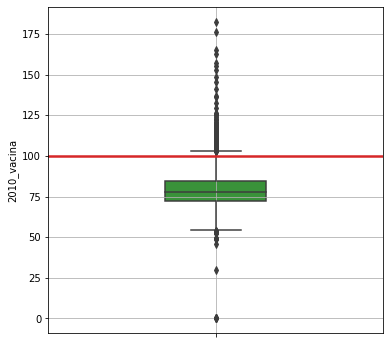

In [201]:
plt.figure(figsize = (6,6))
ax = sns.boxplot(data = dados_2010, y = '2010_vacina', width=0.3, color = 'tab:green')
ax.axhline(y = 100, color = "tab:red", linewidth = 2.5)
plt.grid()
plt.show()

Fiz o plot desse boxplot despretenciosamente só pra ver como os dados de vacinação se comportam, já havia visto que a média era alta e o desvio padrão relativamente baixo, mas não tinha percebido o que isso significava.

A fórmula de cálculo da cobertura é o número de doses aplicadas da dose indicada (1ª, 2ª, 3ª dose ou dose única, conforme a vacina) dividida pela população alvo, multiplicado por 100. Os dados acima de 100% se referem à aplicações de pessoas fora do público extra. Por isso temos vários municipios com % acima de 100. 

Não só por isso, mas também pelos dados em si, acredito que vá valer a pena tirar os outliers.

In [202]:
# Para retirar os outliers, o primeiro passo é achar o IQR, que são os 50% de valores centrais da Series
#Q1 é o marcador do 1º quartil, Q3 é justamente o marcador do 3º quartil, e pra calcular o IQR
#é só aplicar (IQR = Q3 - Q1)

Q1 = dados_2010["2010_vacina"].sort_values().quantile(0.25)
Q3 = dados_2010["2010_vacina"].sort_values().quantile(0.75)
IQR = Q3 - Q1
Q1,Q3, IQR

(72.31, 84.47, 12.159999999999997)

In [203]:
# Pra saber quais valores retirar agora é só fazer o (Q1 - 1.5*IQR) e o resultado é o valor minimo que não é outlier
#e (Q3 + 1.5*IQR) resulta no valor máximo não considerado outlier.

minimo = Q1 - 1.5*IQR
maximo = Q3 + 1.5*IQR
minimo, maximo

(54.07000000000001, 102.71)

In [204]:
# Só pra dizer que não criei essa função sozinho, foi com ajuda do Stack OverFlow
#e o importante é que funcionou, rsrs

# a função dela é dar à possibilidade de fazer uma query mesmo com as minhas colunas começando com valores numericos

def query_cols(self,expr):
    if 'self' in expr:
        return self[eval(expr)]
    else:
        return self.query(expr)

pd.DataFrame.query_cols = query_cols

In [205]:
dados_2010.query_cols("self[self.columns[3]] < maximo")


,codigo_ibge,cidade,2010_populacao,2010_vacina,2010_acs,2010_ubs,2010_posto_de_saude,2010_secretaria_de_saude,2010_unidade_vigilancia_saude,2010_medico_estratégia_saude_familia,2010_pediatra,2010_sanitarista,2010_assistente_social,2010_enfermeiro
0,110001,Alta Floresta D'Oeste,24422.000,83.800,3.030,0.164,0.082,0.041,0.041,0.082,nan,nan,0.041,0.450
1,110037,Alto Alegre dos Parecis,12826.000,79.130,2.963,0.078,0.234,nan,0.078,0.156,nan,nan,nan,0.390
2,110040,Alto Paraíso,17144.000,71.820,2.975,0.233,nan,nan,nan,nan,nan,nan,nan,0.350
3,110034,Alvorada D'Oeste,16864.000,91.740,3.499,0.119,0.119,nan,0.059,nan,nan,nan,0.059,0.474
4,110002,Ariquemes,90354.000,75.510,1.450,0.100,nan,0.022,0.055,0.089,0.066,nan,0.022,0.443
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5564,522190,Varjão,3661.000,84.990,2.458,0.273,nan,0.273,nan,nan,nan,nan,nan,0.273
5565,522200,Vianópolis,12549.000,74.200,2.709,0.478,nan,nan,nan,0.080,nan,nan,nan,0.398
5566,522205,Vicentinópolis,7371.000,74.010,2.171,0.271,nan,0.136,nan,nan,nan,nan,nan,0.271
5567,522220,Vila Boa,4742.000,86.830,2.320,nan,0.422,0.211,0.211,0.211,nan,nan,nan,0.633


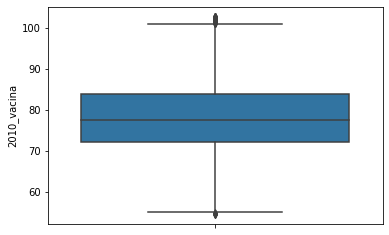

In [206]:
expressao1 = "self['2010_vacina'] > minimo"
expressao2 = "self['2010_vacina'] < maximo"
dados_temp = dados_2010.query_cols(expressao1)
dados_temp = dados_temp.query_cols(expressao2)
sns.boxplot(data = dados_temp, y = "2010_vacina")

# Deu certo a retirada dos outliers, mas preciso facilitar esse processo. Vou criar uma função para aplicar nos outros valores

In [207]:
def tirar_outliers(df : pd.DataFrame):
  coluna = df.columns[3]
  Q1 = df[coluna].sort_values().quantile(0.25)
  Q3 = df[coluna].sort_values().quantile(0.75)
  IQR = Q3 - Q1
  minimo = Q1 - 1.5 * IQR
  maximo = Q3 + 1.5 * IQR
  expressao1 = "self[self.columns[3]] > minimo"
  expressao2 = "self[self.columns[3]] < maximo"
  dados_sem_outliers = df.query_cols(expressao1)
  dados_sem_outliers = dados_sem_outliers.query_cols(expressao2)
  return dados_sem_outliers

In [208]:
#Atribui os dataframes à uma lista nova para depois unpack de volta em suas variaveis

novos_dfs = []

for dataframe in lista_de_dados:
  novodf = tirar_outliers(dataframe)
  novos_dfs.append(novodf)

In [209]:
# Desempacotamento da lista do dataframe de volta à nomeclatura que usei inicialemente

dados_2010, dados_2011, dados_2012, dados_2013, dados_2014, dados_2015, dados_2016, dados_2017, dados_2018, dados_2019 = novos_dfs

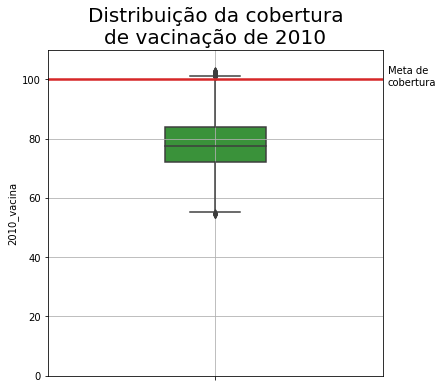

In [210]:
# Verificação se realmente sairam os outliers e sim, deu certo! 

plt.figure(figsize = (6,6))
ax = sns.boxplot(data = dados_2010, y = '2010_vacina', width=0.3, color = 'tab:green')
ax.axhline(y = 100, color = "tab:red", linewidth = 2.5)
ax.text(x = 0.515, y = 98, s = "Meta de\ncobertura")
plt.ylim(0,110)
plt.grid()
plt.title("Distribuição da cobertura\nde vacinação de 2010", fontsize = 20)
plt.show()


Pronto! Agora os dados estão prontos para serem analisados e estudados!

###Análise de Dados

####Plotando as distribuições de valores

In [211]:
labels = ["2010","2011","2012","2013","2014","2015","2016","2017","2018","2019"]
colors = ["tab:blue",'tab:red','wheat','tab:orange', 'tab:brown', 
          'tab:purple','tab:pink','tab:olive','tab:grey','tab:cyan']

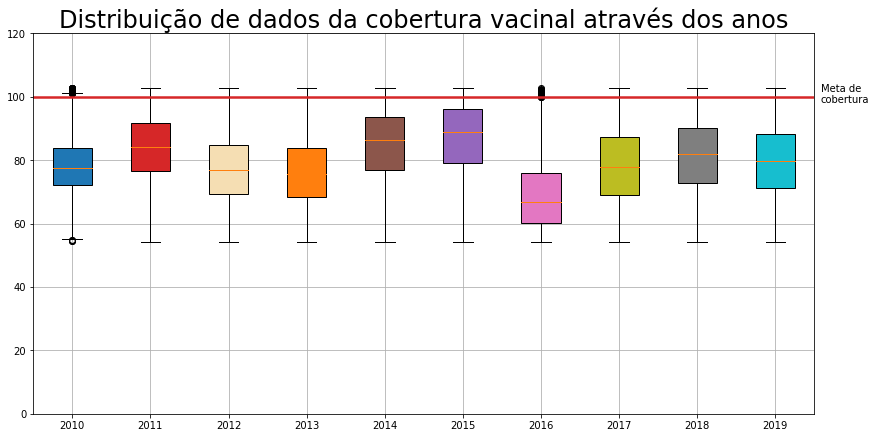

In [212]:
# Para realizar esse boxplot transformei cada serie que ia usar em uma lista de dados
#o matplot lib considera cada lista uma coluna diferente na hora de plotar
data = [list(dados_2010[dados_2010.columns[3]]), list(dados_2011[dados_2011.columns[3]]), list(dados_2012[dados_2012.columns[3]]),
        list(dados_2013[dados_2013.columns[3]]), list(dados_2014[dados_2014.columns[3]]), list(dados_2015[dados_2015.columns[3]]),
        list(dados_2016[dados_2016.columns[3]]), list(dados_2017[dados_2017.columns[3]]), list(dados_2018[dados_2018.columns[3]]),
        list(dados_2019[dados_2019.columns[3]])]

fig, ax = plt.subplots()
bplot1 = ax.boxplot(data, patch_artist= True, labels = labels,)
plt.grid()
ax.figure.set_size_inches(14,7)

plt.ylim(0,120)
plt.title("Distribuição de dados da cobertura vacinal através dos anos", fontsize = 24)
ax.axhline(y = 100, color = "tab:red", linewidth = 2.5)
ax.text(x = 10.58, y = 98, s = "Meta de\ncobertura")

# A documentação do matplot lib fala para usar essa forma para colorir as caixas
for patch, color in zip(bplot1['boxes'], colors):
  patch.set_facecolor(color)

plt.show()

Contando com apenas desde 2010, vemos um crescimento em 2011, queda em 2012 e 2013, porém um crescemento bem acentuado entre 2014 e 2015, mas em 2016 houve uma queda brusca, em que o Q1 de 2015 é maior que o Q3 de 2016. Entre 2017 e 2019 houve um crescimento em relação à 2016, mas o IQR dos três estão na mesma faixa de cobertura (entre 70 e 90%) 

Uma explicação bem provavel pela queda em 2016 é que nesse ano houve um desabastecimento de vacinas no país.


[Desabastecimento de vacinas](https://agenciabrasil.ebc.com.br/geral/noticia/2016-09/abastecimento-de-vacinas-se-normalizara-em-2017-diz-ministerio-da-saude)

Minha ideia é fazer o mesmo boxplot para as outras variaveis. Para verificar o crescimento ou redução como um todo das quantidades de recursos por municipio. 

Vale lembrar que os dados estão relativizados para serem contados à cada 1000 habitantes.

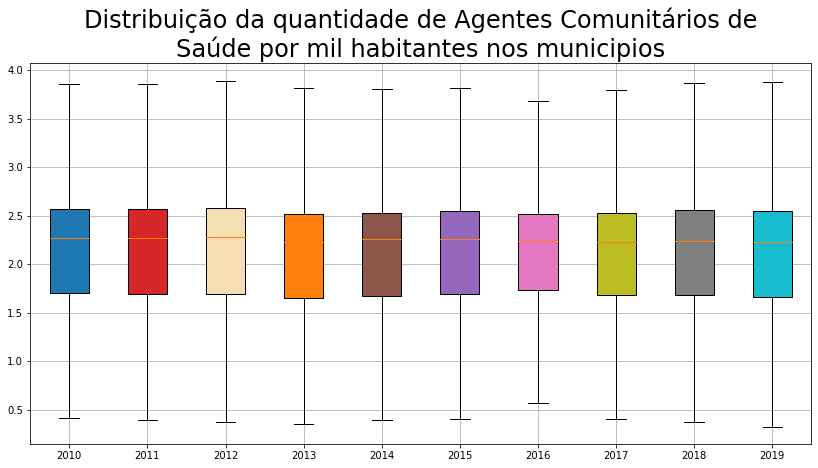

In [213]:
# Para realizar esse boxplot transformei cada serie que ia usar em uma lista de dados
#o matplot lib considera cada lista uma coluna diferente na hora de plotar
data = [list(dados_2010[dados_2010.columns[4]]), list(dados_2011[dados_2011.columns[4]]), list(dados_2012[dados_2012.columns[4]]),
        list(dados_2013[dados_2013.columns[4]]), list(dados_2014[dados_2014.columns[4]]), list(dados_2015[dados_2015.columns[4]]),
        list(dados_2016[dados_2016.columns[4]]), list(dados_2017[dados_2017.columns[4]]), list(dados_2018[dados_2018.columns[4]]),
        list(dados_2019[dados_2019.columns[4]])]

fig, ax = plt.subplots()
bplot1 = ax.boxplot(data, 0, '', patch_artist= True, labels = labels)
plt.grid()
ax.figure.set_size_inches(14,7)
plt.title("Distribuição da quantidade de Agentes Comunitários de\nSaúde por mil habitantes nos municipios", fontsize = 24)

# A documentação do matplot lib fala para usar essa forma para colorir as caixas
for patch, color in zip(bplot1['boxes'], colors):
  patch.set_facecolor(color)

plt.show()

Aqui é possivel ver que a diferença é minima nesses 10 anos de estudo. A variação é muito pequena de um ano para o outro.

In [214]:
# eu quero plotar a distribuição de todos os dados após os agentes comunitários em um matriz de 9x9

def boxplot_para_sub_plot(coluna:int, title:str):
  data1 = [list(dados_2010[dados_2010.columns[coluna]].dropna()), list(dados_2011[dados_2011.columns[coluna]].dropna()), 
          list(dados_2012[dados_2012.columns[coluna]].dropna()), list(dados_2013[dados_2013.columns[coluna]].dropna()), 
          list(dados_2014[dados_2014.columns[coluna]].dropna()), list(dados_2015[dados_2015.columns[coluna]].dropna()),
          list(dados_2016[dados_2016.columns[coluna]].dropna()), list(dados_2017[dados_2017.columns[coluna]].dropna()), 
          list(dados_2018[dados_2018.columns[coluna]].dropna()), list(dados_2019[dados_2019.columns[coluna]].dropna())]
  bplot1 = plt.boxplot(data1,0,'', patch_artist= True, labels = labels,showmeans=True)
  plt.grid()
  plt.title(title, fontsize = 14)
  for patch, color in zip(bplot1['boxes'], colors):
    patch.set_facecolor(color)
  return bplot1

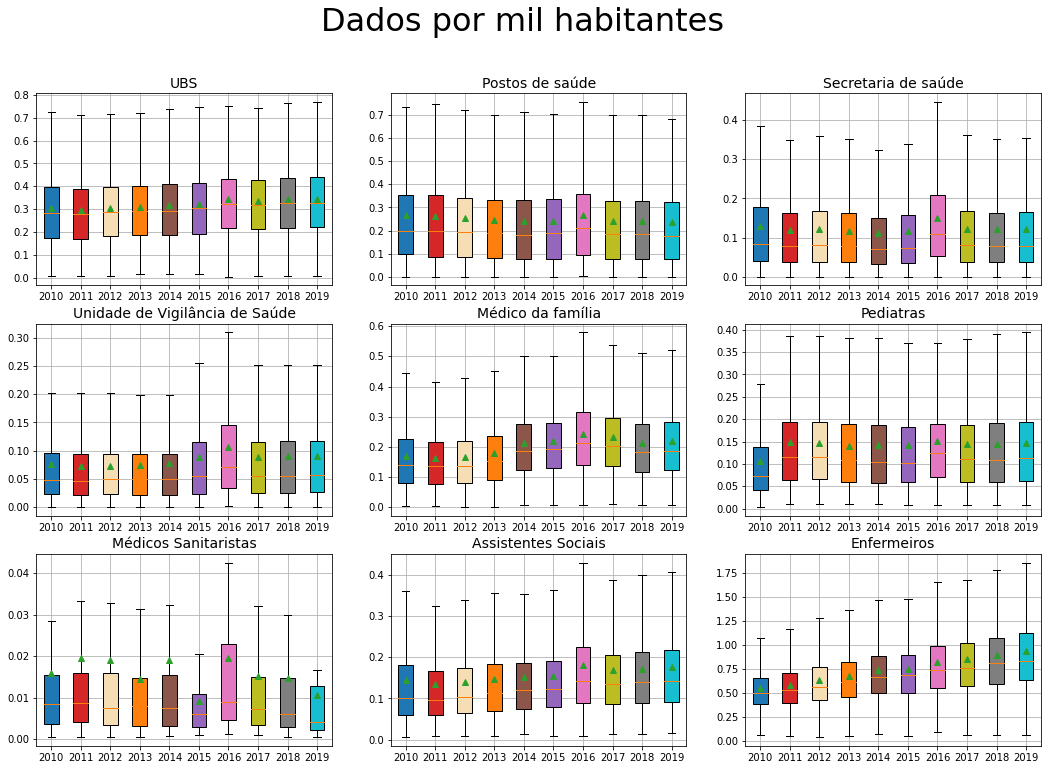

In [215]:
plt.figure(figsize=(18,12))
plt.suptitle("Dados por mil habitantes",fontsize = 32)

plt.subplot(3, 3, 1)
boxplot_para_sub_plot(5,"UBS")

plt.subplot(3, 3, 2)
boxplot_para_sub_plot(6,"Postos de saúde")

plt.subplot(3, 3, 3)
boxplot_para_sub_plot(7,"Secretaria de saúde")

plt.subplot(3, 3, 4)
boxplot_para_sub_plot(8, "Unidade de Vigilância de Saúde")

plt.subplot(3, 3, 5)
boxplot_para_sub_plot(9, "Médico da família")

plt.subplot(3, 3, 6)
boxplot_para_sub_plot(10, "Pediatras")

plt.subplot(3, 3, 7)
boxplot_para_sub_plot(11, "Médicos Sanitaristas")

plt.subplot(3, 3, 8)
boxplot_para_sub_plot(12,"Assistentes Sociais")

plt.subplot(3, 3, 9)
boxplot_para_sub_plot(13,"Enfermeiros")


plt.show()

Em todos os dados dos gráficos acima, temos curvas assimétricas à direita, ou positivas. Ou seja, a maior parte dos dados repetidos são menores, e a mediana é menor que a média, representada no gráfico pelo triangulo verde. Isso denota que temos uma quantidade grande de dados com valores menores em relação aos valores maiores, mostrando que temos mais cidades com valores menores.


Os boxplots mostram a distribuição dos dados sem os outliers e de acordo com a quantidade de moradores dos municipios. Alguns dos dados tem tendências parecidas, por exemplo, assistentes sociais, sanitaristas, medicos da familia, unidades de vigilancia de saude, secretarias de saude, postos de saude e ubs, que tiveram um leve crescimento em 2015 e um crescimento bem alto em 2016 e queda com queda em 2017.

Algumas possibilidades que explicam isso são:
- o ano de 2016 teve um crescimento nos casos de dengue, chikungunya e zika, foram 606% mais casos que em 2015 [(G1)]([artigo](https://correiopaulista.com/tag/obras-eleitoreiras/). Explicando um crescimento temporário dos dados, pois como foi uma emergência sanitária, ocorrem investimentos temporários para sanar o problema.

- 2016 também foi um ano de eleições municipais e uma prática muito comum nos municipios é fazer contratações e inaugurações de obras no ano da eleição para mostrar números maiores. É muito comum que esses estabelecimentos de saúde não estejam aptos a serem usados, ou por falta de equipamentos, ou por falta de pessoas ou pelo simples fato da obra não ter sido encerrada, assim explicando também a queda no ano seguinte. Esse [artigo](https://correiopaulista.com/tag/obras-eleitoreiras/) fala um pouco mais sobre, ao noticiar que o municipio de Osasco proibiu essa prática. Porém 2012 também foi um ano eleitoral municipal e apesar de alguns dados vermos crescimento, não é significativo como em 2016.


Antes de fazer estudos de todos os anos, minha ideia é usar o ano de 2019 que é o ano mais recente para explorar os dados e suas distribuições, relações e representações. Ao chegar à uma avaliação interessante, farei o mesmo com todos os outros anos.

####Evolução dos totais com o passar do tempo

In [216]:
# Para montar o dicionário, coloquei as nomeações das colunas

dados_2010.columns

Index(['codigo_ibge', 'cidade', '2010_populacao', '2010_vacina', '2010_acs',
       '2010_ubs', '2010_posto_de_saude', '2010_secretaria_de_saude',
       '2010_unidade_vigilancia_saude', '2010_medico_estratégia_saude_familia',
       '2010_pediatra', '2010_sanitarista', '2010_assistente_social',
       '2010_enfermeiro'],
      dtype='object')

Para tentar facilitar cada vez mais, montarei uma função para plotar os gráficos de totais ao passar dos anos.

In [217]:
nomes_colunas = {2:"População",3:"Cobertura Vacinal", 4:"Agentes Comunitários de Saúde", 5:"Unidades Básicas de Saúde",
                 6:"Postos de Saúde", 7:"Secretarias de Saúde", 8:"Unidade de Vigilância em Saúde",
                 9: "Médicos da estratégia de Saúde da Família", 10: "Pediatras", 11:"Médicos Sanitaristas",
                 12:"Assistentes Sociais", 13:"Enfermeiros"}

def plotar_total_dados_periodo(ordem_coluna:int):
  resultado = []
  for df in lista_dfs_copiados:
    soma = df[df.columns[ordem_coluna]].sum()
    resultado.append(soma)

  plt.figure(figsize= (14,5))  
  ax = sns.lineplot(y = resultado, x = labels, linewidth = 2.7, color = "tab:green")
  ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.0f}"))
  plt.grid()
  plt.ylim(0, pd.Series(resultado).max()*1.1)
  plt.title(nomes_colunas[ordem_coluna], fontsize = 22)


Quero plotar primeiro o gráfico da população total e dos agentes comunitários para verificar como eles se movimentam.

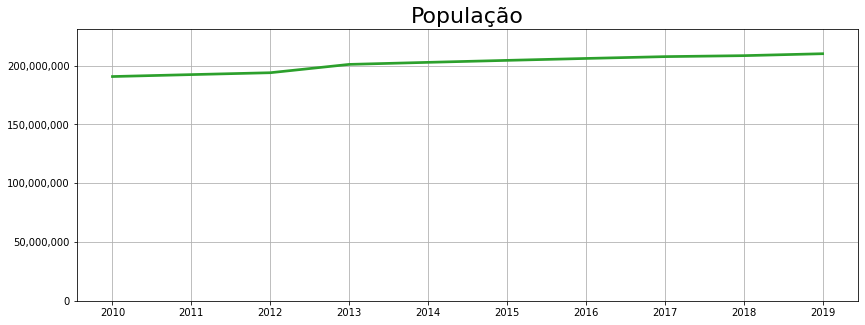

In [218]:
plotar_total_dados_periodo(2)

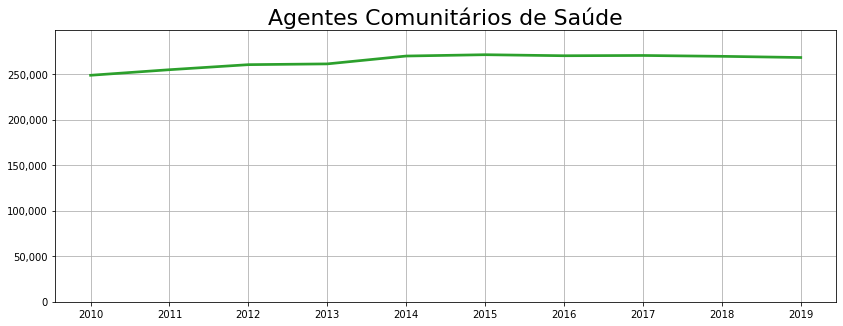

In [219]:
plotar_total_dados_periodo(4)

In [220]:
def plotar_total_dados_periodo(ordem_coluna:int):
  resultado = []
  for df in lista_dfs_copiados:
    soma = df[df.columns[ordem_coluna]].sum()
    resultado.append(soma)

    
  ax = sns.lineplot(y = resultado, x = labels, linewidth = 2.7, color = "tab:green")
  ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.0f}"))
  plt.grid()
  plt.ylim(0, pd.Series(resultado).max()*1.1)
  plt.title(nomes_colunas[ordem_coluna])

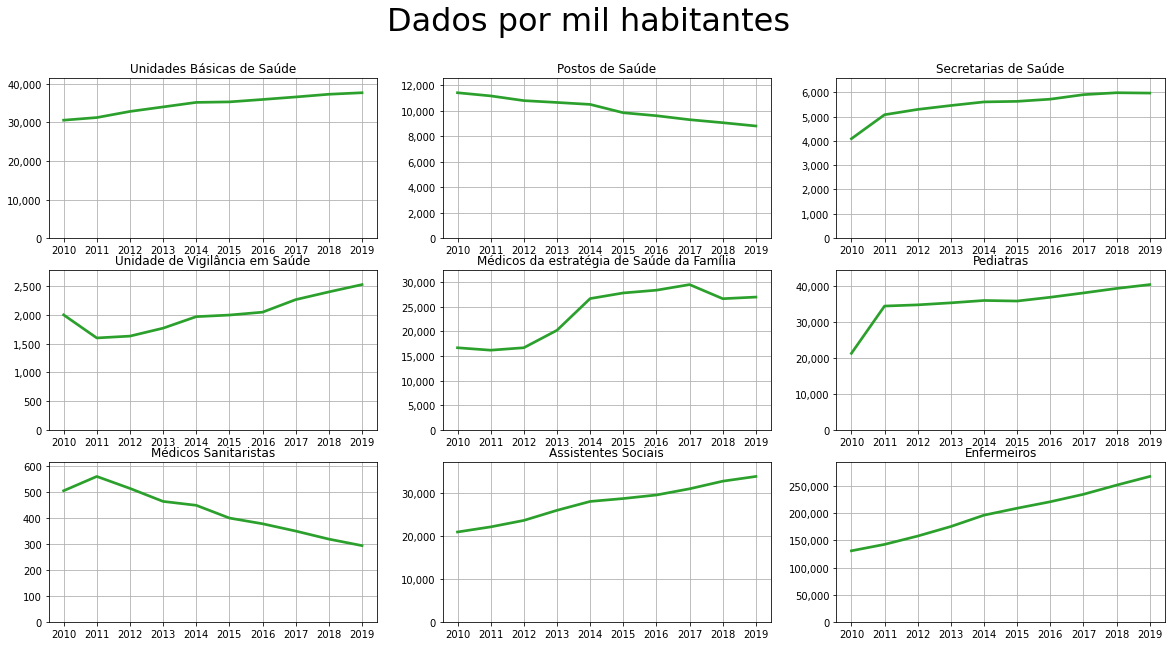

In [221]:
plt.figure(figsize=(20,10))
plt.suptitle("Dados por mil habitantes",fontsize = 32)

plt.subplot(3, 3, 1)
plotar_total_dados_periodo(5)

plt.subplot(3, 3, 2)
plotar_total_dados_periodo(6)

plt.subplot(3, 3, 3)
plotar_total_dados_periodo(7)

plt.subplot(3, 3, 4)
plotar_total_dados_periodo(8)

plt.subplot(3, 3, 5)
plotar_total_dados_periodo(9)

plt.subplot(3, 3, 6)
plotar_total_dados_periodo(10)

plt.subplot(3, 3, 7)
plotar_total_dados_periodo(11)

plt.subplot(3, 3, 8)
plotar_total_dados_periodo(12)

plt.subplot(3, 3, 9)
plotar_total_dados_periodo(13)

plt.show()

Idealmente todos essas variaveis deveriam seguir a mesma evolução que a população do país. Porém vemos outra coisa, temos somente o valor de unidades básicas de saúde e os pediatras com um crescimento parecido, pois todos os outros dados que tiveram crescimento foram crescimentos mais acentuados, como por exemplo a quantidade de enfermeiros que em 2010 eram menos de 150mil e em 2019 já eram mais de 250mil.

A quantidade de medicoos sanitaristas caiu bastante, assim como quantidade de postos de saúde.

####Municipios que cobriram a expectativa vacinal

In [222]:
# Agora quero ver como são as cidades de 2019 que atingiram a cobertura vacinal de 100% ou mais e ver os padrões dos dados à partir disso.

cidades_cobertas_2019 = dados_2019.query_cols("self[self.columns[3]] >= 100")

In [223]:
cidades_cobertas_2019.describe()

,2019_populacao,2019_vacina,2019_acs,2019_ubs,2019_posto_de_saude,2019_secretaria_de_saude,2019_unidade_vigilancia_saude,2019_medico_estratégia_saude_familia,2019_pediatra,2019_sanitarista,2019_assistente_social,2019_enfermeiro
count,149.000,149.000,149.000,145.000,65.000,148.000,37.000,112.000,57.000,1.000,103.000,149.000
mean,18228.805,101.205,2.138,0.361,0.291,0.167,0.195,0.239,0.173,0.007,0.202,0.979
std,46227.552,0.803,0.820,0.192,0.275,0.123,0.247,0.138,0.104,nan,0.124,0.465
min,1406.000,100.000,0.000,0.065,0.028,0.004,0.004,0.051,0.024,0.007,0.022,0.153
25%,4196.000,100.490,1.763,0.232,0.099,0.074,0.046,0.139,0.087,0.007,0.122,0.671
50%,7497.000,101.140,2.260,0.322,0.254,0.135,0.101,0.189,0.152,0.007,0.173,0.921
75%,13470.000,101.910,2.603,0.454,0.372,0.240,0.292,0.303,0.247,0.007,0.265,1.190
max,460671.000,102.690,4.689,1.116,1.743,0.711,1.422,0.711,0.507,0.007,0.651,2.737


Olhando separado sem comparar com os outros anos eu consigo tirar conclusões, porém não dá pra ter certeza do que elas significam sem o contexto dos outros anos, por isso vou fazer o mesmo com os outros dataframes.

In [224]:
def municipios_vacinados(df):
  df_novo = df.query_cols("self[self.columns[3]] >= 100")
  return df_novo

Agora farei com 2019 novamente para confirmar se está correto.

In [225]:
cidades_cobertas_2019 = municipios_vacinados(dados_2019)

In [226]:
cidades_cobertas_2019.describe()

,2019_populacao,2019_vacina,2019_acs,2019_ubs,2019_posto_de_saude,2019_secretaria_de_saude,2019_unidade_vigilancia_saude,2019_medico_estratégia_saude_familia,2019_pediatra,2019_sanitarista,2019_assistente_social,2019_enfermeiro
count,149.000,149.000,149.000,145.000,65.000,148.000,37.000,112.000,57.000,1.000,103.000,149.000
mean,18228.805,101.205,2.138,0.361,0.291,0.167,0.195,0.239,0.173,0.007,0.202,0.979
std,46227.552,0.803,0.820,0.192,0.275,0.123,0.247,0.138,0.104,nan,0.124,0.465
min,1406.000,100.000,0.000,0.065,0.028,0.004,0.004,0.051,0.024,0.007,0.022,0.153
25%,4196.000,100.490,1.763,0.232,0.099,0.074,0.046,0.139,0.087,0.007,0.122,0.671
50%,7497.000,101.140,2.260,0.322,0.254,0.135,0.101,0.189,0.152,0.007,0.173,0.921
75%,13470.000,101.910,2.603,0.454,0.372,0.240,0.292,0.303,0.247,0.007,0.265,1.190
max,460671.000,102.690,4.689,1.116,1.743,0.711,1.422,0.711,0.507,0.007,0.651,2.737


In [227]:
# Provavelmente eu poderia fazer algum for com as listas que já fiz lá em cima, porém acho que ia acabar usando mais tempo fazendo isso
#decidi por isso então ir para a medida mais prática que é copiar o código de cima, rsrs.

cidades_cobertas_2018 = municipios_vacinados(dados_2018)
cidades_cobertas_2017 = municipios_vacinados(dados_2017)
cidades_cobertas_2016 = municipios_vacinados(dados_2016)
cidades_cobertas_2015 = municipios_vacinados(dados_2015)
cidades_cobertas_2014 = municipios_vacinados(dados_2014)
cidades_cobertas_2013 = municipios_vacinados(dados_2013)
cidades_cobertas_2012 = municipios_vacinados(dados_2012)
cidades_cobertas_2011 = municipios_vacinados(dados_2011)
cidades_cobertas_2010 = municipios_vacinados(dados_2010)

In [228]:
cidades_cobertas_2010.describe()

,2010_populacao,2010_vacina,2010_acs,2010_ubs,2010_posto_de_saude,2010_secretaria_de_saude,2010_unidade_vigilancia_saude,2010_medico_estratégia_saude_familia,2010_pediatra,2010_sanitarista,2010_assistente_social,2010_enfermeiro
count,62.000,62.000,62.000,56.000,31.000,41.000,17.000,34.000,12.000,0.000,26.000,62.000
mean,13030.613,101.378,2.335,0.316,0.347,0.183,0.078,0.199,0.108,nan,0.180,0.593
std,18501.347,0.849,0.620,0.160,0.325,0.139,0.057,0.141,0.063,nan,0.168,0.268
min,2072.000,100.000,0.502,0.051,0.044,0.009,0.011,0.031,0.009,nan,0.019,0.153
25%,4302.000,100.585,1.987,0.178,0.147,0.079,0.042,0.090,0.072,nan,0.060,0.410
50%,6827.000,101.415,2.414,0.310,0.267,0.144,0.066,0.175,0.099,nan,0.137,0.553
75%,13973.000,102.127,2.630,0.427,0.437,0.232,0.079,0.286,0.167,nan,0.200,0.737
max,108251.000,102.700,3.825,0.873,1.681,0.483,0.204,0.672,0.189,nan,0.711,1.751


In [229]:
def boxplot_para_sub_plot(coluna:int):
  data1 = [list(cidades_cobertas_2010[cidades_cobertas_2010.columns[coluna]].dropna()), list(cidades_cobertas_2011[cidades_cobertas_2011.columns[coluna]].dropna()), 
          list(cidades_cobertas_2012[cidades_cobertas_2012.columns[coluna]].dropna()), list(cidades_cobertas_2013[cidades_cobertas_2013.columns[coluna]].dropna()), 
          list(cidades_cobertas_2014[cidades_cobertas_2014.columns[coluna]].dropna()), list(cidades_cobertas_2015[cidades_cobertas_2015.columns[coluna]].dropna()),
          list(cidades_cobertas_2016[cidades_cobertas_2016.columns[coluna]].dropna()), list(cidades_cobertas_2017[cidades_cobertas_2017.columns[coluna]].dropna()), 
          list(cidades_cobertas_2018[cidades_cobertas_2018.columns[coluna]].dropna()), list(cidades_cobertas_2019[cidades_cobertas_2019.columns[coluna]].dropna())]
  bplot1 = plt.boxplot(data1,0,"", patch_artist= True, labels = labels,showmeans=True)
  plt.grid()
  plt.title(nomes_colunas[coluna], fontsize = 14)
  for patch, color in zip(bplot1['boxes'], colors):
    patch.set_facecolor(color)
  return bplot1

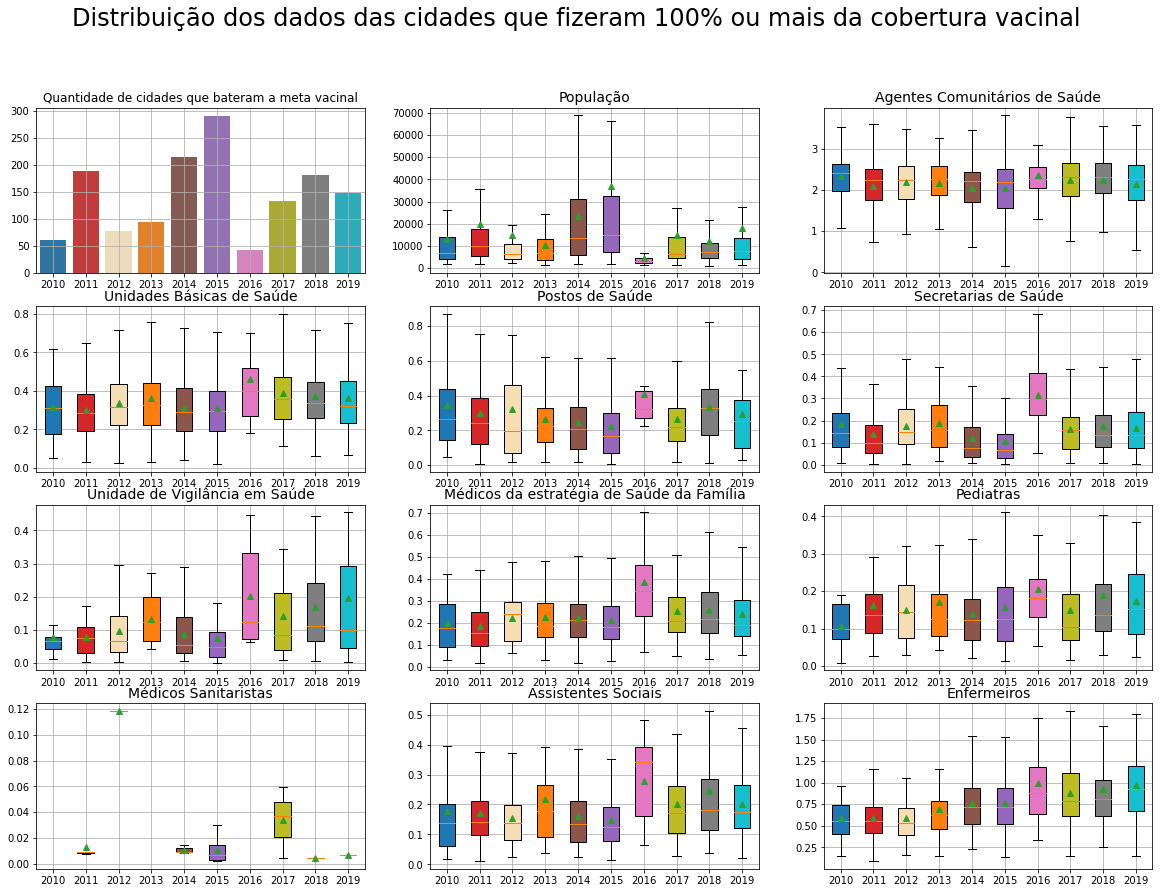

In [230]:
# Importante avisar que os dados estão plotados sem os outliers.

plt.figure(figsize = (20,14))
plt.suptitle("Distribuição dos dados das cidades que fizeram 100% ou mais da cobertura vacinal", fontsize = 24)

plt.subplot(4,3,1)
sns.barplot(y=[cidades_cobertas_2010.shape[0], cidades_cobertas_2011.shape[0], 
               cidades_cobertas_2012.shape[0], cidades_cobertas_2013.shape[0],
               cidades_cobertas_2014.shape[0], cidades_cobertas_2015.shape[0],
               cidades_cobertas_2016.shape[0], cidades_cobertas_2017.shape[0],
               cidades_cobertas_2018.shape[0], cidades_cobertas_2019.shape[0]],
            x = labels, palette = colors)
plt.title("Quantidade de cidades que bateram a meta vacinal")
plt.grid()

plt.subplot(4,3,2)
boxplot_para_sub_plot(2)

plt.subplot(4,3,3)
boxplot_para_sub_plot(4)

plt.subplot(4,3,4)
boxplot_para_sub_plot(5)

plt.subplot(4,3,5)
boxplot_para_sub_plot(6)

plt.subplot(4,3,6)
boxplot_para_sub_plot(7)

plt.subplot(4,3,7)
boxplot_para_sub_plot(8)

plt.subplot(4,3,8)
boxplot_para_sub_plot(9)

plt.subplot(4,3,9)
boxplot_para_sub_plot(10)

plt.subplot(4,3,10)
boxplot_para_sub_plot(11)

plt.subplot(4,3,11)
boxplot_para_sub_plot(12)

plt.subplot(4,3,12)
boxplot_para_sub_plot(13)


plt.show()

Apesar de essa não ser a melhor forma de visualizar os dados é uma forma de poder comparar todos os dados através dos anos desse grupo selecionado e tentar achar alguns padrões comuns.


- Nos dados de cidades que bateram a meta nesses 10 anos, vemos um padrão interessante: a quantidade de cidades que bate a meta vacinal tem crescimento em 3 ou 4 anos e na sequencia despenca, mas logo em seguida retoma o crescimento.


- Populacional: as cidades com "poucos" habitantes (até 30mil habitantes) tem uma tendência maior de bater essa meta. Em 2014 e 2015 vemos que muda um pouco, até por terem mais cidades que bateram a meta, provavelmente algumas dessas metas foram batidas por cidades com número bem alto de habitantes, assim elevando a média.


- Vemos a tendência valores maiores em 2016 em vários dos dados presentes aqui, em 2012 e 2013 os dados tem valores um pouco.


- Relacionando os dados com as cidades que batera a meta de vacinação, podemos levantar algumas hipóteses. Em 2016 que foi o ano, dentre os estudados, que menos cidades bateram a meta vacinal vemos que a estrutura dos recusos de saúde dessas cidades que bateram a meta eram maiores quando comparamos com os outros anos que mais cidades bateram a meta. Em 2012 e 2013 também vemos um crescimento e também são dois anos com poucas cidades batendo a meta vacinal. 
Poderiamos pensar que essas cidades bateram a meta por justamente terem recursos de saúde melhores.

- Quanto mais cidades batem os resultados ideais de cobertura vacinal vemos que a quantidade de recursos que o municipio tem para a vacinação é reduzida. Podendo talvez mostrar o quanto a vacinação não depende só da estrutura da cidade.



### Teste da hipótese

Relembrando a reflexão que deu origem ao trabalho: Existe um modelo apropriado de recursos humanos e estrutura para obter um resultado de excelência de cobertura vacinal? 

Minha ideia aqui agora para confirmar se realmente a correlação é tão baixa é separar os dados dos municipios que atingiram a meta vacinal daqueles que não atingiram e avaliar como as outras variáveis se comportam e se existe algum tipo de relação entre os valores de cobertura vacinal e as outras variáveis. Se ficar comprovada uma relação, a ideia é criar um modelo de Machine Learning para ser usada como uma proposta de melhoria aos municipios, para que se compreenda o que cada municipio necessitaria construir ou contratar para obter melhores coberturas vacinais.

In [231]:
#verificando como fica o dataframe em que a cobertura vacinal é menor que 100%

dados_2019.query_cols("self[self.columns[3]] < 100") 

,codigo_ibge,cidade,2019_populacao,2019_vacina,2019_acs,2019_ubs,2019_posto_de_saude,2019_secretaria_de_saude,2019_unidade_vigilancia_saude,2019_medico_estratégia_saude_familia,2019_pediatra,2019_sanitarista,2019_assistente_social,2019_enfermeiro
1,110037,Alto Alegre dos Parecis,13241.000,84.270,3.247,0.453,nan,0.076,0.076,0.302,nan,nan,0.076,0.906
2,110040,Alto Paraíso,21428.000,79.350,2.007,0.187,0.093,0.047,0.047,0.093,nan,nan,nan,0.513
3,110034,Alvorada D'Oeste,14411.000,95.100,3.261,0.416,nan,0.069,0.069,0.139,0.069,nan,0.139,0.694
4,110002,Ariquemes,107863.000,88.360,1.131,0.121,nan,0.019,0.037,0.083,0.093,nan,0.056,0.853
5,110045,Buritis,39654.000,87.670,1.362,0.126,nan,0.025,0.076,0.076,0.353,nan,0.050,0.706
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5565,522200,Vianópolis,13863.000,92.420,1.875,0.361,nan,0.072,nan,0.216,nan,nan,0.072,0.649
5566,522205,Vicentinópolis,8743.000,72.800,1.944,0.458,nan,0.114,nan,nan,nan,nan,nan,0.801
5567,522220,Vila Boa,6171.000,61.490,1.783,0.324,nan,0.162,nan,0.324,nan,nan,0.162,0.810
5568,522230,Vila Propício,5821.000,71.750,3.264,0.344,nan,0.172,nan,0.344,nan,nan,nan,0.687


In [232]:
# Definir função para poder pegar os dados em que a cobertura vacinal é menor que 100%

def municipios_nao_tao_vacinados(df):
  df_novo = df.query_cols("self[self.columns[3]] < 100")
  return df_novo

In [233]:
cidades_nao_cobertas_2010 = municipios_nao_tao_vacinados(dados_2010)
cidades_nao_cobertas_2011 = municipios_nao_tao_vacinados(dados_2011)
cidades_nao_cobertas_2012 = municipios_nao_tao_vacinados(dados_2012)
cidades_nao_cobertas_2013 = municipios_nao_tao_vacinados(dados_2013)
cidades_nao_cobertas_2014 = municipios_nao_tao_vacinados(dados_2014)
cidades_nao_cobertas_2015 = municipios_nao_tao_vacinados(dados_2015)
cidades_nao_cobertas_2016 = municipios_nao_tao_vacinados(dados_2016)
cidades_nao_cobertas_2017 = municipios_nao_tao_vacinados(dados_2017)
cidades_nao_cobertas_2018 = municipios_nao_tao_vacinados(dados_2018)
cidades_nao_cobertas_2019 = municipios_nao_tao_vacinados(dados_2019)

In [234]:
# Como falei, minha ideia aqui é fazer uma comparação dos dados por amostragem através dos anos

def comparacao_cobetura(df1, df2, coluna :int, ano):
  data = [list(df1[df1.columns[coluna]].dropna()), list(df2[df2.columns[coluna]].dropna())]
  plt.figure(figsize=(8,3.5))
  bpolt1 = plt.boxplot(data, 0,"", patch_artist=True,
                       labels = ["Cidades 100% cobertas","Cidades não cobertas totalmente"],
                       showmeans = True)
  plt.title("{} em {}".format(nomes_colunas[coluna],ano), fontsize = 20)
  plt.grid()
  return plt.show()

A tendência central da hipótese é se os recursos estruturais e de recursos humanos afetam a cobertura de vacinação das cidades no Brasil. Até agora esses valores não parecem estar relacionados. Abaixo farei a comparação da distribuição dos valores das variaveis quando os municipios batem a meta de cobertura vacinal e quando não batem.

Serão feitas comparações aleatórias e de forma amostral, pois são 10 anos e 12 variáveis passiveis de comparação.


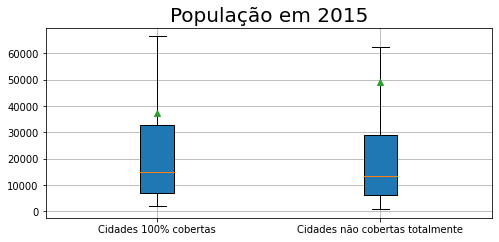

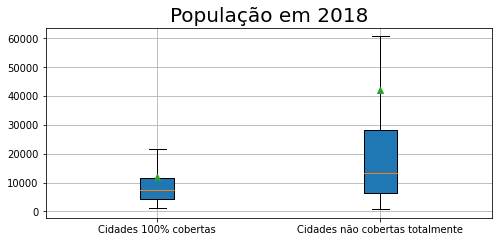

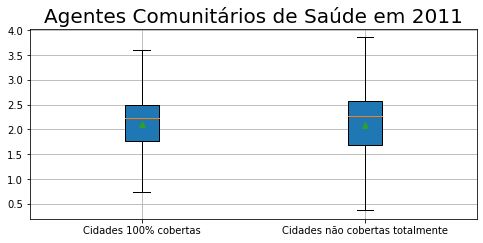

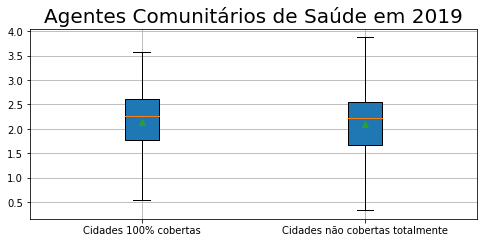

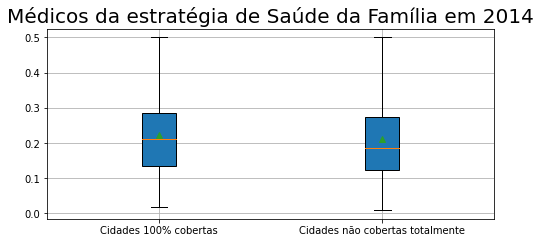

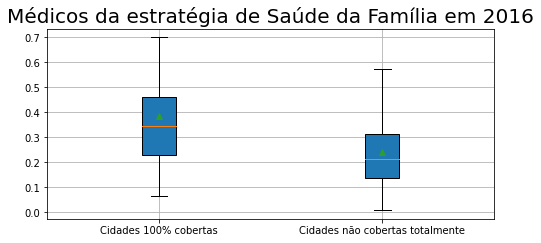

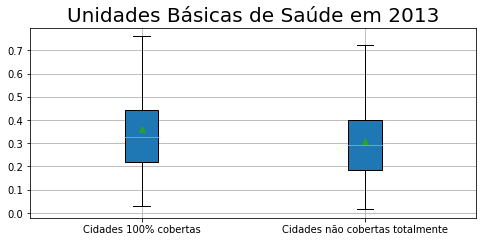

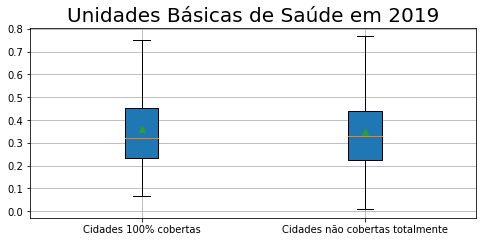

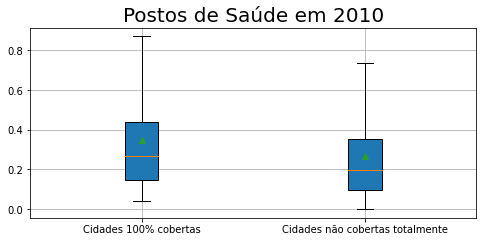

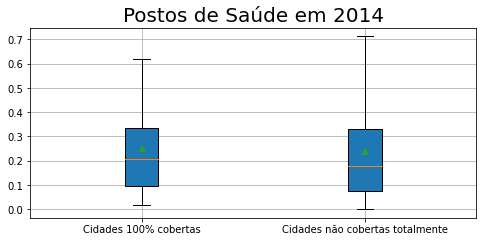

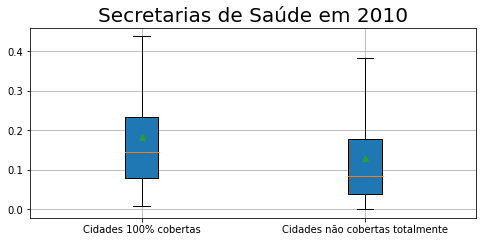

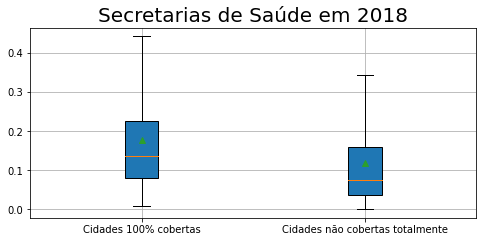

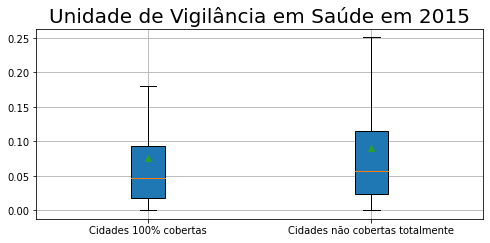

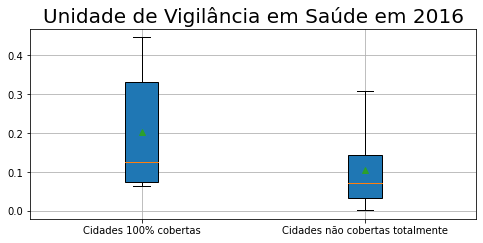

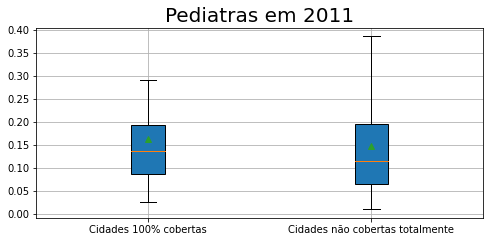

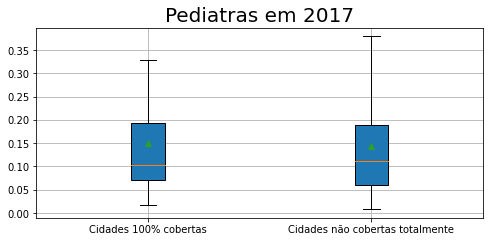

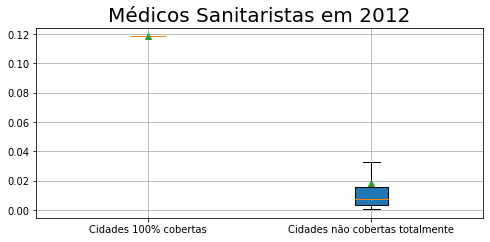

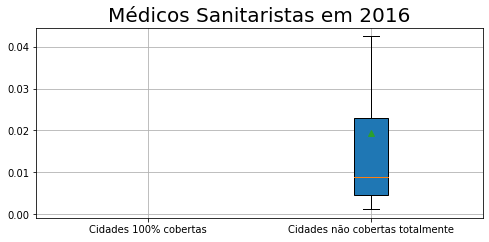

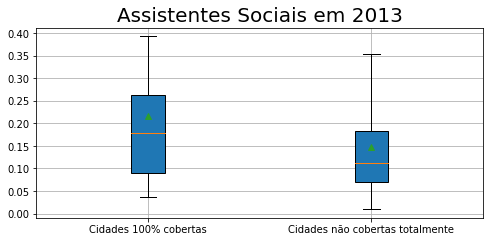

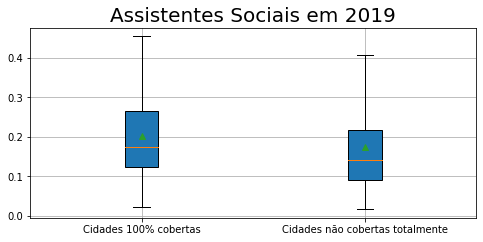

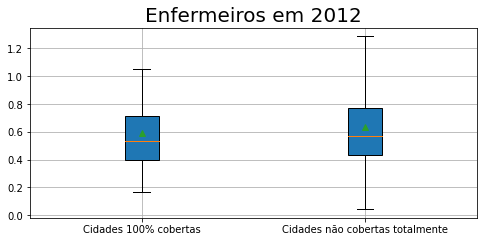

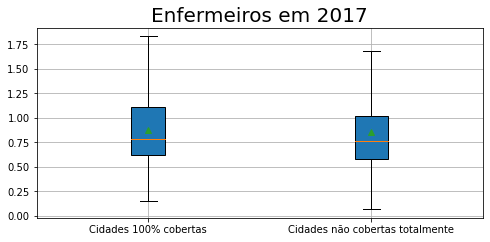

In [235]:
#Preferi Plotar tudo em uma mesma célula para que essa parte não "ocupe muito espaço"

comparacao_cobetura(cidades_cobertas_2015, cidades_nao_cobertas_2015,2,'2015')
comparacao_cobetura(cidades_cobertas_2018, cidades_nao_cobertas_2018,2,'2018')

comparacao_cobetura(cidades_cobertas_2011, cidades_nao_cobertas_2011,4,'2011')
comparacao_cobetura(cidades_cobertas_2019, cidades_nao_cobertas_2019,4,'2019')

comparacao_cobetura(cidades_cobertas_2014, cidades_nao_cobertas_2014,9,'2014')
comparacao_cobetura(cidades_cobertas_2016, cidades_nao_cobertas_2016,9,'2016')

comparacao_cobetura(cidades_cobertas_2013, cidades_nao_cobertas_2013,5,'2013')
comparacao_cobetura(cidades_cobertas_2019, cidades_nao_cobertas_2019,5,'2019')

comparacao_cobetura(cidades_cobertas_2010, cidades_nao_cobertas_2010,6,'2010')
comparacao_cobetura(cidades_cobertas_2014, cidades_nao_cobertas_2014,6,'2014')

comparacao_cobetura(cidades_cobertas_2010, cidades_nao_cobertas_2010,7,'2010')
comparacao_cobetura(cidades_cobertas_2018, cidades_nao_cobertas_2018,7,'2018')

comparacao_cobetura(cidades_cobertas_2015, cidades_nao_cobertas_2015,8,'2015')
comparacao_cobetura(cidades_cobertas_2016, cidades_nao_cobertas_2016,8,'2016')

comparacao_cobetura(cidades_cobertas_2011, cidades_nao_cobertas_2011,10,'2011')
comparacao_cobetura(cidades_cobertas_2017, cidades_nao_cobertas_2017,10,'2017')

comparacao_cobetura(cidades_cobertas_2012, cidades_nao_cobertas_2012,11,'2012')
comparacao_cobetura(cidades_cobertas_2016, cidades_nao_cobertas_2016,11,'2016')

comparacao_cobetura(cidades_cobertas_2013, cidades_nao_cobertas_2013,12,'2013')
comparacao_cobetura(cidades_cobertas_2019, cidades_nao_cobertas_2019,12,'2019')


comparacao_cobetura(cidades_cobertas_2012, cidades_nao_cobertas_2012,13,'2012')
comparacao_cobetura(cidades_cobertas_2017, cidades_nao_cobertas_2017,13,'2017')

Não parece ser regra nem necessariamente uma diferença muito grande, mas as cidades com a cobertura vacinal adequada tem uma tendência de ter quantidade de recursos por 1000 habitantes um pouco maior que as cidades que estão com a cobertura vacinal abaixo de 100%.

Para extrapolar e ver se há uma correlação dos dados, vou medir quantos municipios no ano estão acima de 100% e usar essa mesma quantidade de municipios só que para avaliar os que estão com a menor % de cobertura vacinal daquele ano, assim se houver uma correlação de fato, deve haver uma diferença maior na distribuição dos dados dessa comparação.

In [236]:
def menores_dados(df_sem_cobertura:pd.DataFrame,df_totalmente_coberto:pd.DataFrame):
  tamanho = df_totalmente_coberto.shape[0]
  novo_df = df_sem_cobertura.sort_values(df_sem_cobertura.columns[3]).head(tamanho)
  return novo_df

In [237]:
menores_dados(cidades_nao_cobertas_2010, cidades_cobertas_2010)

,codigo_ibge,cidade,2010_populacao,2010_vacina,2010_acs,2010_ubs,2010_posto_de_saude,2010_secretaria_de_saude,2010_unidade_vigilancia_saude,2010_medico_estratégia_saude_familia,2010_pediatra,2010_sanitarista,2010_assistente_social,2010_enfermeiro
4637,430165,Barão,5742.000,54.550,1.045,0.174,0.348,0.174,nan,nan,nan,nan,0.174,0.697
3215,330270,Maricá,127519.000,54.600,0.667,0.094,0.078,nan,0.008,0.078,0.141,nan,0.039,0.306
187,150250,Chaves,21138.000,54.720,1.325,nan,0.142,nan,nan,0.047,nan,nan,nan,0.095
4521,421410,Presidente Nereu,2284.000,54.810,2.627,0.438,nan,0.438,nan,nan,nan,nan,nan,0.876
1156,240750,Maxaranguape,10442.000,55.090,1.915,0.383,nan,0.096,nan,nan,nan,nan,nan,0.287
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5055,432147,Tiradentes do Sul,6461.000,59.970,2.786,0.310,nan,0.155,nan,0.155,nan,nan,0.155,0.464
5032,432035,Sentinela do Sul,5197.000,60.050,0.000,nan,0.192,nan,nan,nan,nan,nan,nan,0.385
1082,240080,Angicos,11553.000,60.110,2.424,0.519,nan,nan,0.087,0.173,nan,nan,0.173,0.779
1230,241105,Tibau,3687.000,60.170,2.712,0.542,0.542,nan,nan,nan,nan,nan,nan,0.814


In [238]:
cidades_cobertas_2010.shape[0] == cidades_cobertas_2010.shape[0]

True

Os outliers foram retirados da base, então valores muito discrepantes não entrarão na conta aqui. Farei a criação de novos dataframes para fazer as comparações.

In [239]:
menores_municipios_2010 = menores_dados(cidades_nao_cobertas_2010, cidades_cobertas_2010)
menores_municipios_2011 = menores_dados(cidades_nao_cobertas_2011, cidades_cobertas_2011)
menores_municipios_2012 = menores_dados(cidades_nao_cobertas_2012, cidades_cobertas_2012)
menores_municipios_2013 = menores_dados(cidades_nao_cobertas_2013, cidades_cobertas_2013)
menores_municipios_2014 = menores_dados(cidades_nao_cobertas_2014, cidades_cobertas_2014)
menores_municipios_2015 = menores_dados(cidades_nao_cobertas_2015, cidades_cobertas_2015)
menores_municipios_2016 = menores_dados(cidades_nao_cobertas_2016, cidades_cobertas_2016)
menores_municipios_2017 = menores_dados(cidades_nao_cobertas_2017, cidades_cobertas_2017)
menores_municipios_2018 = menores_dados(cidades_nao_cobertas_2018, cidades_cobertas_2018)
menores_municipios_2019 = menores_dados(cidades_nao_cobertas_2019, cidades_cobertas_2019)

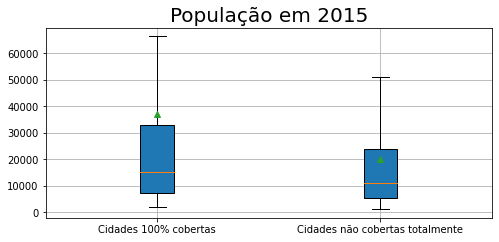

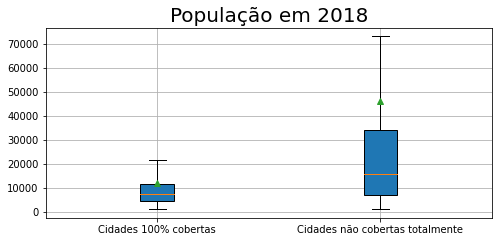

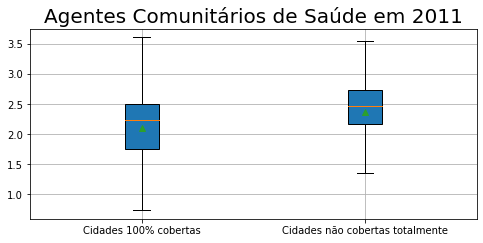

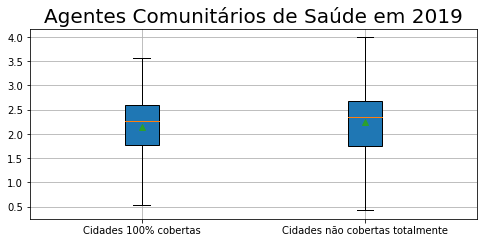

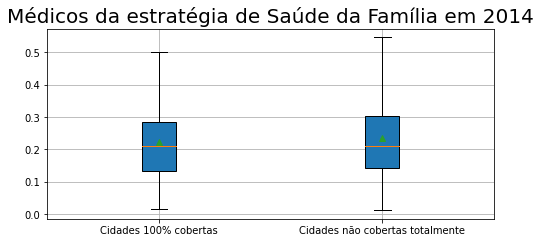

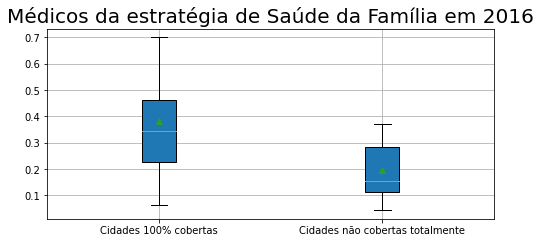

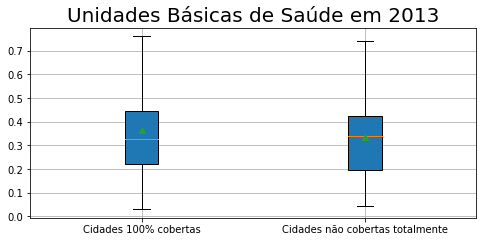

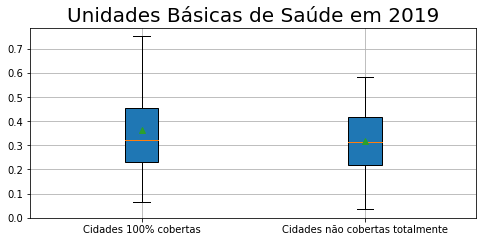

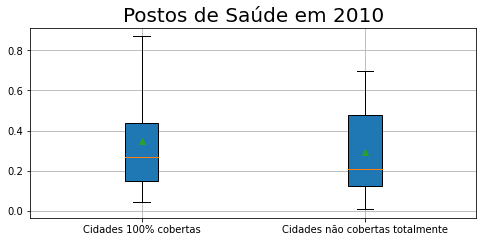

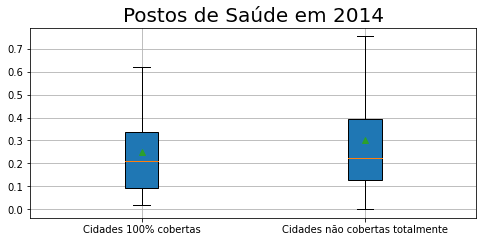

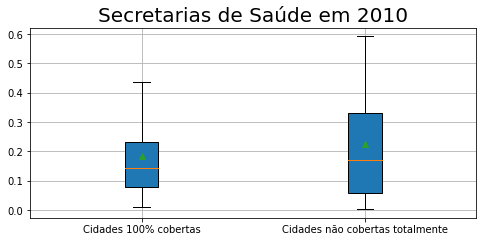

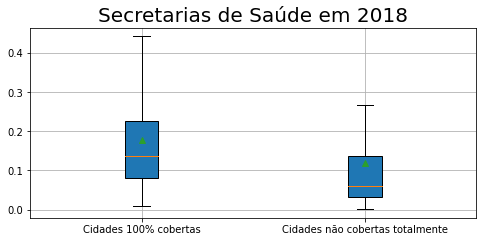

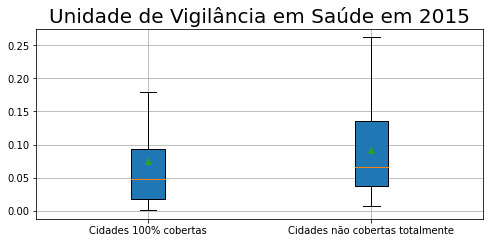

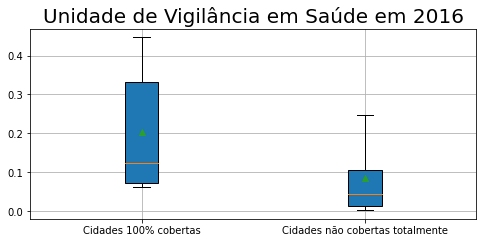

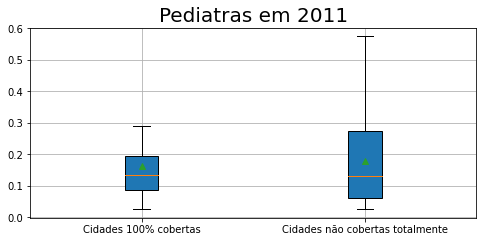

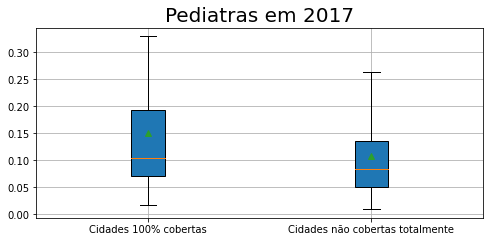

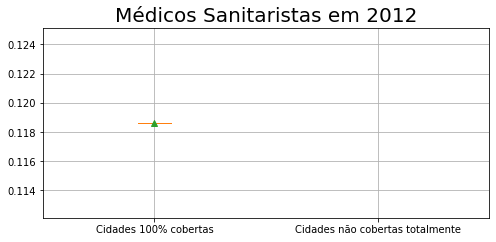

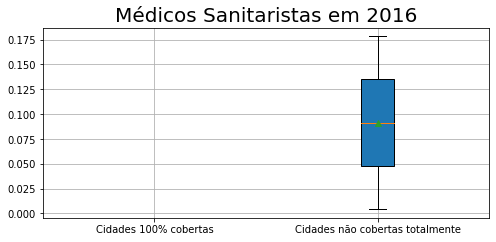

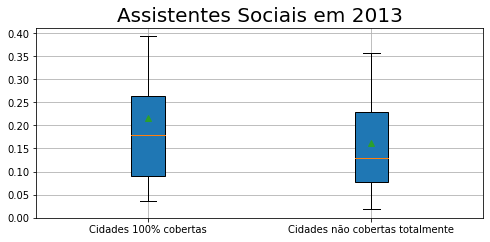

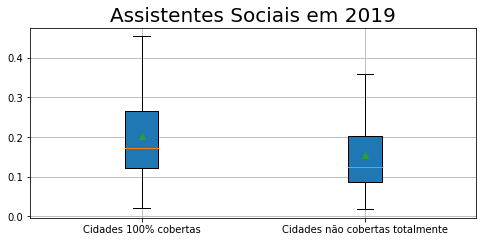

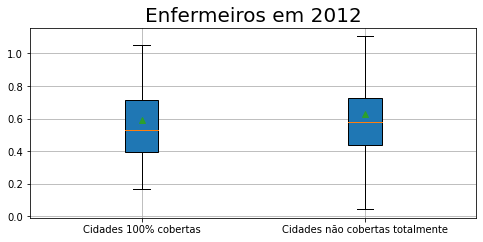

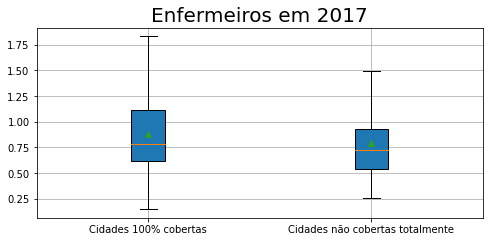

In [240]:
# Imagino que copiar código não seja o ideal, mas achei melhor fazer assim para facilitar o processo

comparacao_cobetura(cidades_cobertas_2015, menores_municipios_2015,2,'2015')
comparacao_cobetura(cidades_cobertas_2018, menores_municipios_2018,2,'2018')

comparacao_cobetura(cidades_cobertas_2011, menores_municipios_2011,4,'2011')
comparacao_cobetura(cidades_cobertas_2019, menores_municipios_2019,4,'2019')

comparacao_cobetura(cidades_cobertas_2014, menores_municipios_2014,9,'2014')
comparacao_cobetura(cidades_cobertas_2016, menores_municipios_2016,9,'2016')

comparacao_cobetura(cidades_cobertas_2013, menores_municipios_2013,5,'2013')
comparacao_cobetura(cidades_cobertas_2019, menores_municipios_2019,5,'2019')

comparacao_cobetura(cidades_cobertas_2010, menores_municipios_2010,6,'2010')
comparacao_cobetura(cidades_cobertas_2014, menores_municipios_2014,6,'2014')

comparacao_cobetura(cidades_cobertas_2010, menores_municipios_2010,7,'2010')
comparacao_cobetura(cidades_cobertas_2018, menores_municipios_2018,7,'2018')

comparacao_cobetura(cidades_cobertas_2015, menores_municipios_2015,8,'2015')
comparacao_cobetura(cidades_cobertas_2016, menores_municipios_2016,8,'2016')

comparacao_cobetura(cidades_cobertas_2011, menores_municipios_2011,10,'2011')
comparacao_cobetura(cidades_cobertas_2017, menores_municipios_2017,10,'2017')

comparacao_cobetura(cidades_cobertas_2012, menores_municipios_2012,11,'2012')
comparacao_cobetura(cidades_cobertas_2016, menores_municipios_2016,11,'2016')

comparacao_cobetura(cidades_cobertas_2013, menores_municipios_2013,12,'2013')
comparacao_cobetura(cidades_cobertas_2019, menores_municipios_2019,12,'2019')

comparacao_cobetura(cidades_cobertas_2012, menores_municipios_2012,13,'2012')
comparacao_cobetura(cidades_cobertas_2017, menores_municipios_2017,13,'2017')


Se houvesse uma relação de causalidade entre os recursos humanos e os estabelecimentos com a cobertura vacinal, aqui veriamos uma acentuação da diferença dos boxplots em comparação, porém não foi o que ocorreu. Na verdade alguns casos até mudaram e as cidades com menores coberturas vacinais tiveram melhores valores em algumas variaveis.

É bem improvável que exista uma correlação entre os dados, mas para confirmar farei a plotagens de alguns outros dados para confirmar.

In [241]:
def comparacao_scatter(df_cobertura : pd.DataFrame, df2_sem_cobertura: pd.DataFrame, coluna:int):
  plt.figure(figsize=(7.5,7.5))

  sns.scatterplot(y = df_cobertura[df_cobertura.columns[3]],
                  x = df_cobertura[df_cobertura.columns[coluna]])

  sns.scatterplot(y = df2_sem_cobertura[df2_sem_cobertura.columns[3]],
                  x = df2_sem_cobertura[df2_sem_cobertura.columns[coluna]])
  plt.grid()
  plt.title("Comparação da cobertura Vacinal com\n a quantidade de {}".format(nomes_colunas[coluna]), fontsize = 15.5)
  plt.ylim(0,pd.Series(df_cobertura[df_cobertura.columns[3]]).max() *1.03)
  return plt.show()

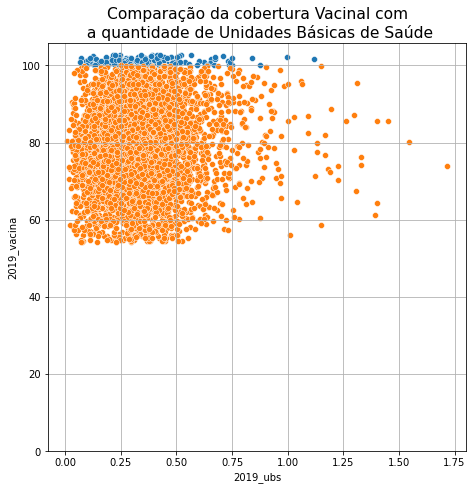

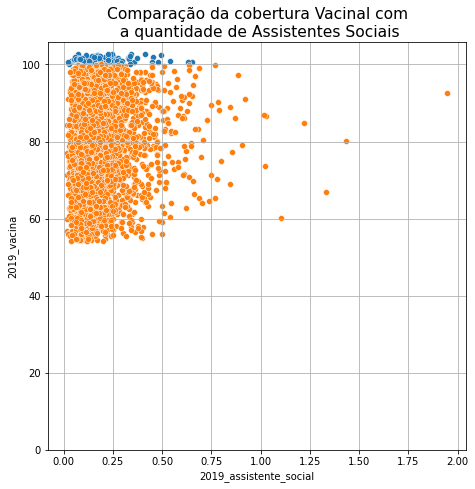

In [242]:
# As unidades básicas de saúde e assistentes sociais são os valores que na ultima comparação demonstraram serem 
#maiores quando tratamos da comparação entre os dados que atingiram a meta e quando não atingiram

comparacao_scatter(cidades_cobertas_2019, cidades_nao_cobertas_2019, 5)

comparacao_scatter(cidades_cobertas_2019, cidades_nao_cobertas_2019, 12)

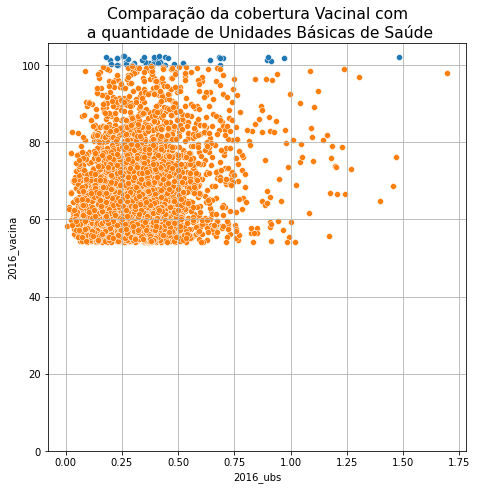

In [243]:
comparacao_scatter(cidades_cobertas_2016, cidades_nao_cobertas_2016, 5)

Aqui no estudo das unidades básicas de saúde desse ano vemos os pontos com uma leve diagonal, porém, não é possivel dizer que há de fato uma correlação significativa. Porém se o gráfico for comparado com de 2019, vemos que não há essa leve diagonal presente aqui.

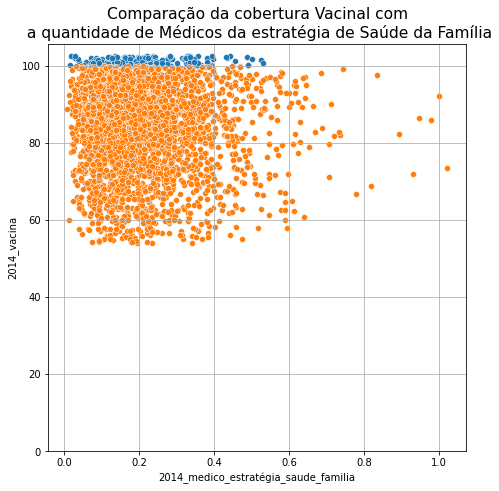

In [244]:
comparacao_scatter(cidades_cobertas_2014, cidades_nao_cobertas_2014, 9)



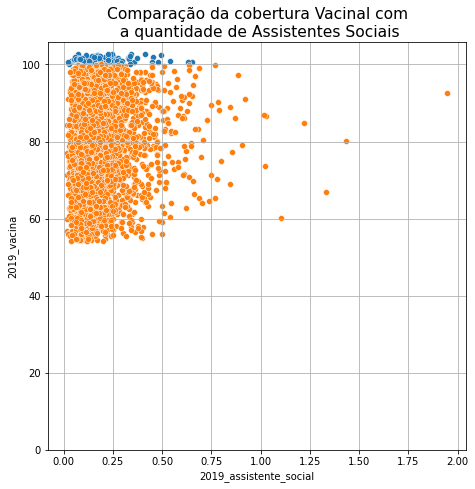

In [245]:
comparacao_scatter(cidades_cobertas_2019, cidades_nao_cobertas_2019, 12)

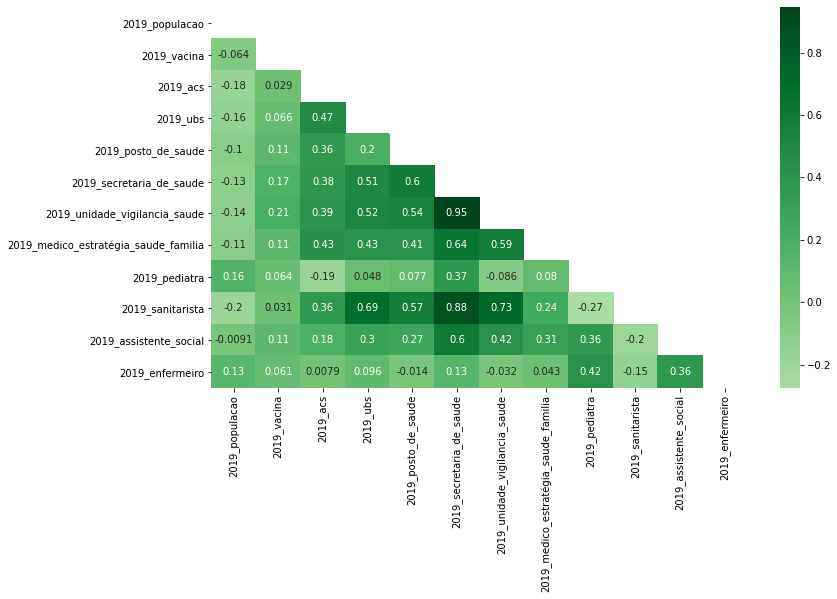

In [246]:
# Como um teste derradeiro, criei esse heatmap para avaliar as correlações dos dados.

plt.figure(figsize = (12,7))
mask = np.triu(np.ones_like(dados_2019.corr(), dtype=bool))
sns.heatmap(dados_2019.corr(), mask = mask , cmap = "Greens", center = 0, annot=True)
plt.show()

##Conclusão

O teste da hipótese comprova que a correlação é muito baixa ou quase inexistente entre os dados de vacinação e as variaveis estruturais e de recursos humanos. 

A cobertura vacinal que é tão importante para a saúde da população não é um resultado direto dos recursos que aquele municipio têm. Podemos dizer é claro que para realizar a imunização da população é necessário termos UBS, Agentes comunitários da Saúde e afins, mas não é possível dizer que melhores recursos na cidade representam melhores resultados vacinais. O minimo existênte desses recursos são o suficiente para a realização da imunização da população.

A não comprovação da hipótese não torna menos valioso o trabalho, com ele foi possível verificar que o aparelhamento do SUS da forma que está não tem correlação com a cobertura vacinal dos municipios. Porém não retira o fato de que hoje não influência, justamente porque o Sistema Único de Saúde possibilita o acesso à todos. Em um outro contexto, talvez o resultado não fosse o mesmo.

Cabe à estudos futuros, ou continuações desse daqui analisar outros pontos que podem completar o que foi realizado neste.